In [35]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os

import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization, Bidirectional, LSTM
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K
from tensorflow import keras

In [36]:
# clean_data_folder = "../pdiot-practical/pdiot-data/2021"
# len(os.listdir(clean_data_folder))

In [37]:
base_df = pd.DataFrame()

clean_data_file = "../pdiot-practical/pdiot-data/2021/Respeck_recordings_clean.csv"
base_df = pd.read_csv(clean_data_file)

# clean_data_folder = "../pdiot-practical/pdiot-data/2021"

# for subdir in os.listdir(clean_data_folder)[24:]:
#     if subdir[0] != 's': continue
#     for filename in os.listdir(f"{clean_data_folder}/{subdir}"):
#         full_path = f"{clean_data_folder}/{subdir}/{filename}"
#         print(full_path)

#         # load data into a DataFrame
#         new_df = pd.read_csv(full_path)

#         # merge into the base DataFrame
#         base_df = pd.concat([base_df, new_df])

/home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:

base_df.reset_index(drop=True, inplace=True)
base_df

timestamp   accel_x   accel_y   accel_z   gyro_x   gyro_y  \
0       1632912509851  0.020508  0.293945 -0.967773 -0.21875  0.21875   
1       1632912509886  0.027344  0.287109 -0.971680 -0.21875  0.15625   
2       1632912509910  0.023438  0.295898 -0.980469 -0.21875  0.15625   
3       1632912509972  0.011719  0.287109 -0.981445 -0.03125  0.09375   
4       1632912510002  0.020508  0.295898 -0.976562  0.15625  0.03125   
...               ...       ...       ...       ...      ...      ...   
488470  1633561049240 -0.121094 -0.396484 -0.922852 -0.12500  0.00000   
488471  1633561049285 -0.126953 -0.395508 -0.931641 -0.06250  0.00000   
488472  1633561049329 -0.112305 -0.399414 -0.924805  0.25000  0.12500   
488473  1633561049351 -0.124023 -0.399414 -0.924805  0.12500  0.25000   
488474  1633561049396 -0.125977 -0.403320 -0.919922 -0.12500 -0.06250   

         gyro_z  mag_x  mag_y  mag_z sensor_type          activity_type  \
0       0.09375    0.0    0.0    0.0      Thingy  Lying down on stomach   
1      -0.03125    0.0    0.0    0.0      Thingy  Lying down on stomach   
2       0.03125    0.0    0.0    0.0      Thingy  Lying down on stomach   
3       0.09375    0.0    0.0    0.0      Thingy  Lying down on stomach   
4       0.09375    0.0    0.0    0.0      Thingy  Lying down on stomach   
...         ...    ...    ...    ...         ...                    ...   
488470  0.12500    0.0    0.0    0.0      Thingy       Lying down right   
488471 -0.12500    0.0    0.0    0.0      Thingy       Lying down right   
488472 -0.12500    0.0    0.0    0.0      Thingy       Lying down right   
488473  0.00000    0.0    0.0    0.0      Thingy       Lying down right   
488474 -0.06250    0.0    0.0    0.0      Thingy       Lying down right   

        activity_code subject_id notes  \
0                   8   s1870467   Rob   
1                   8   s1870467   Rob   
2                   8   s1870467   Rob   
3                   8   s1870467   Rob   
4                   8   s1870467   Rob   
...               ...        ...   ...   
488470              6   s2211228   NaN   
488471              6   s2211228   NaN   
488472              6   s2211228   NaN   
488473              6   s2211228   NaN   
488474              6   s2211228   NaN   

                                             recording_id  
0       Thingy_s1870467_Lying down on stomach_29-09-20...  
1       Thingy_s1870467_Lying down on stomach_29-09-20...  
2       Thingy_s1870467_Lying down on stomach_29-09-20...  
3       Thingy_s1870467_Lying down on stomach_29-09-20...  
4       Thingy_s1870467_Lying down on stomach_29-09-20...  
...                                                   ...  
488470  Thingy_s2211228_Lying down right_06-10-2021_23...  
488471  Thingy_s2211228_Lying down right_06-10-2021_23...  
488472  Thingy_s2211228_Lying down right_06-10-2021_23...  
488473  Thingy_s2211228_Lying down right_06-10-2021_23...  
488474  Thingy_s2211228_Lying down right_06-10-2021_23...  

[488475 rows x 16 columns]

In [39]:
# # not NaN
# base_df = base_df[base_df['accel_x'].notna()]
# base_df = base_df[base_df['accel_y'].notna()]
# base_df = base_df[base_df['accel_z'].notna()]
# base_df = base_df[base_df['gyro_x'].notna()]
# base_df = base_df[base_df['gyro_y'].notna()]
# base_df = base_df[base_df['gyro_z'].notna()]

In [40]:
# print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
# print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
# print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
# print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Thingy']
The data was collected for the activities: ['Lying down on stomach' 'Descending stairs' 'Desk work'
 'Sitting bent forward' 'Sitting' 'Lying down on back' 'Lying down right'
 'Running' 'Lying down left' 'Movement' 'Sitting bent backward'
 'Climbing stairs' 'Standing' 'Walking at normal speed' 'Falling on knees'
 'Falling on the left' 'Falling on the back' 'Falling on the right']
The number of unique recordings is: 886
The subject IDs in the recordings are: 46


In [41]:
example_recording = base_df[base_df.activity_code == 1]

# confim we only have one recording here
len(example_recording.recording_id.unique())

44

In [42]:
window_size = 40 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 20 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

large_enough_windows = [window for window in example_recording.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

In [43]:
# we then get the windows with the required overlap

overlapping_windows = large_enough_windows[::step_size]

In [44]:
# then we will append a window ID to each window
for window in overlapping_windows:
    window.loc[:, 'window_id'] = window_number
    window_number += 1

In [45]:
# now we concatenate all the resulting windows
final_sliding_windows = pd.concat(overlapping_windows).reset_index(drop=True)

In [46]:
final_sliding_windows

timestamp   accel_x   accel_y   accel_z     gyro_x     gyro_y  \
0      1633278928657 -1.139648  0.577148  0.353516  -78.81250  -75.15625   
1      1633278928687 -1.761719 -0.384766 -0.773438  -69.21875 -210.34375   
2      1633278928746 -1.553711  1.134766  0.336914    8.53125 -181.78125   
3      1633278928777 -1.629883  0.914062  0.061523 -276.87500 -169.37500   
4      1633278928807 -0.871094  0.452148 -0.518555  -65.50000 -174.09375   
...              ...       ...       ...       ...        ...        ...   
66555  1633546083227 -1.230469 -0.083984  0.229492  -14.87500   -8.50000   
66556  1633546083274 -1.330078 -0.007812  0.182617   28.81250  -34.62500   
66557  1633546083318 -0.965820  0.148438  0.130859   31.34375  -67.65625   
66558  1633546083365 -0.830078  0.434570  0.100586   18.62500  -75.03125   
66559  1633546083431 -1.230469  0.239258  0.191406  -77.37500  -41.87500   

         gyro_z  mag_x  mag_y  mag_z sensor_type            activity_type  \
0     -11.96875    0.0    0.0    0.0      Thingy  Walking at normal speed   
1     -18.56250    0.0    0.0    0.0      Thingy  Walking at normal speed   
2     -39.37500    0.0    0.0    0.0      Thingy  Walking at normal speed   
3     -35.34375    0.0    0.0    0.0      Thingy  Walking at normal speed   
4     -36.46875    0.0    0.0    0.0      Thingy  Walking at normal speed   
...         ...    ...    ...    ...         ...                      ...   
66555   2.09375    0.0    0.0    0.0      Thingy  Walking at normal speed   
66556 -12.43750    0.0    0.0    0.0      Thingy  Walking at normal speed   
66557 -31.71875    0.0    0.0    0.0      Thingy  Walking at normal speed   
66558 -22.75000    0.0    0.0    0.0      Thingy  Walking at normal speed   
66559 -14.25000    0.0    0.0    0.0      Thingy  Walking at normal speed   

       activity_code subject_id notes  \
0                  1   s1870697   NaN   
1                  1   s1870697   NaN   
2                  1   s1870697   NaN   
3                  1   s1870697   NaN   
4                  1   s1870697   NaN   
...              ...        ...   ...   
66555              1   s2211228   NaN   
66556              1   s2211228   NaN   
66557              1   s2211228   NaN   
66558              1   s2211228   NaN   
66559              1   s2211228   NaN   

                                            recording_id  window_id  
0      Thingy_s1870697_Walking at normal speed_03-10-...          0  
1      Thingy_s1870697_Walking at normal speed_03-10-...          0  
2      Thingy_s1870697_Walking at normal speed_03-10-...          0  
3      Thingy_s1870697_Walking at normal speed_03-10-...          0  
4      Thingy_s1870697_Walking at normal speed_03-10-...          0  
...                                                  ...        ...  
66555  Thingy_s2211228_Walking at normal speed_06-10-...       1663  
66556  Thingy_s2211228_Walking at normal speed_06-10-...       1663  
66557  Thingy_s2211228_Walking at normal speed_06-10-...       1663  
66558  Thingy_s2211228_Walking at normal speed_06-10-...       1663  
66559  Thingy_s2211228_Walking at normal speed_06-10-...       1663  

[66560 rows x 17 columns]

In [47]:
first_four_windows = [group for _, group in final_sliding_windows[final_sliding_windows.window_id < 4].groupby("window_id")]

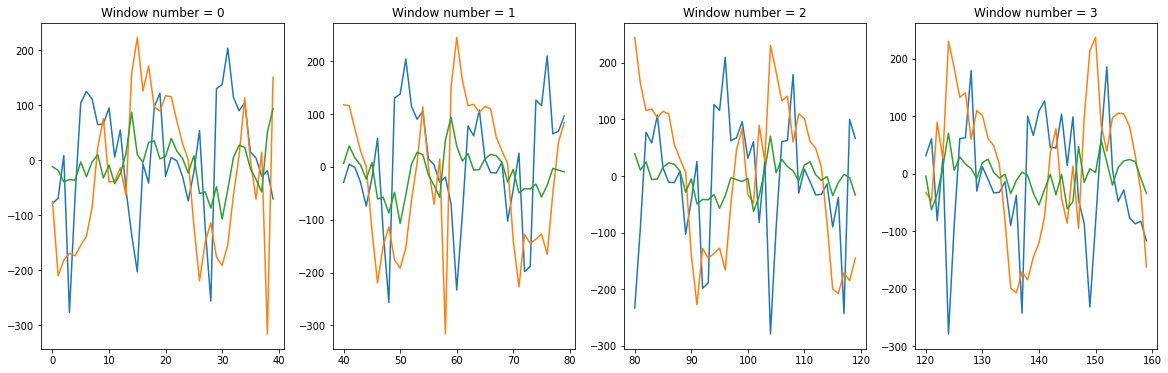

In [48]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")

In [49]:
columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [50]:
np.array(first_four_windows[0][columns_of_interest]).shape

(40, 6)

In [51]:
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 67.61it/s]


accel_x__sum_values  accel_x__median  accel_x__mean  accel_x__length  \
0              -37.640625        -0.911133      -0.941016             40.0   
1              -38.092774        -0.917480      -0.952319             40.0   
2              -41.230469        -0.944824      -1.030762             40.0   
3              -39.435547        -1.038574      -0.985889             40.0   
4              -35.538086        -0.879395      -0.888452             40.0   
...                   ...              ...            ...              ...   
1659           -39.583008        -0.963867      -0.989575             40.0   
1660           -40.027344        -0.961914      -1.000684             40.0   
1661           -40.560547        -0.981445      -1.014014             40.0   
1662           -39.493164        -0.972656      -0.987329             40.0   
1663           -39.616211        -0.958984      -0.990405             40.0   

      accel_x__standard_deviation  accel_x__variance  \
0                        0.609227           0.371157   
1                        0.579812           0.336182   
2                        0.567354           0.321891   
3                        0.672776           0.452628   
4                        0.682706           0.466087   
...                           ...                ...   
1659                     0.163476           0.026724   
1660                     0.173115           0.029969   
1661                     0.161803           0.026180   
1662                     0.173340           0.030047   
1663                     0.176147           0.031028   

      accel_x__root_mean_square  accel_x__maximum  accel_x__minimum  \
0                      1.121012          0.835938         -2.000000   
1                      1.114941          0.835938         -2.000000   
2                      1.176589          0.893555         -2.000000   
3                      1.193568          1.035156         -2.000000   
4                      1.120462          1.035156         -2.000000   
...                         ...               ...               ...   
1659                   1.002987         -0.520508         -1.333008   
1660                   1.015547         -0.520508         -1.367188   
1661                   1.026842         -0.665039         -1.367188   
1662                   1.002430         -0.574219         -1.474609   
1663                   1.005948         -0.574219         -1.474609   

      accel_y__sum_values  ...  gyro_y__minimum  gyro_z__sum_values  \
0               12.602539  ...       -316.31250          -373.68750   
1                9.983398  ...       -316.31250          -449.21875   
2                8.563477  ...       -227.25000          -186.21875   
3                9.448242  ...       -207.65625           -98.59375   
4               11.185547  ...       -225.28125          -398.03125   
...                   ...  ...              ...                 ...   
1659             1.442383  ...        -78.62500            68.50000   
1660             1.314453  ...        -81.62500           -73.34375   
1661             1.130859  ...        -81.62500             2.06250   
1662             2.475586  ...        -78.25000           -20.56250   
1663             2.749023  ...        -78.25000          -101.46875   

      gyro_z__median  gyro_z__mean  gyro_z__length  \
0          -6.484375     -9.342187            40.0   
1          -5.750000    -11.230469            40.0   
2          -3.484375     -4.655469            40.0   
3          -0.937500     -2.464844            40.0   
4         -14.140625     -9.950781            40.0   
...              ...           ...             ...   
1659       11.515625      1.712500            40.0   
1660       -1.062500     -1.833594            40.0   
1661        8.656250      0.051562            40.0   
1662        8.015625     -0.514062            40.0   
1663        0.500000     -2.536719            40.0   

      gyro_z__standard_deviation  gyro_z_

In [52]:
window_size = 40 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 20 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

all_overlapping_windows = []

for rid, group in base_df.groupby("recording_id"):
    print(f"Processing rid = {rid}", end=' ')
    
    large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
    
    overlapping_windows = large_enough_windows[::step_size] 
    
    # then we will append a window ID to each window
    for window in overlapping_windows:
        window.loc[:, 'window_id'] = window_number
        window_number += 1
    
    # ??? some sind void?
    if len(overlapping_windows) == 0:
        continue
    
    all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))

Processing rid = Thingy_s1541031_Climbing stairs_06-10-2021_11-27-07 Processing rid = Thingy_s1541031_Descending stairs_06-10-2021_11-26-27 Processing rid = Thingy_s1541031_Desk work_06-10-2021_11-09-15 Processing rid = Thingy_s1541031_Lying down left_06-10-2021_14-29-26 Processing rid = Thingy_s1541031_Lying down on back_06-10-2021_11-14-33 Processing rid = Thingy_s1541031_Lying down on stomach_06-10-2021_14-31-40 Processing rid = Thingy_s1541031_Lying down right_06-10-2021_14-28-20 Processing rid = Thingy_s1541031_Movement_06-10-2021_11-13-14 Processing rid = Thingy_s1541031_Running_08-10-2021_12-12-01 Processing rid = Thingy_s1541031_Sitting bent backward_06-10-2021_10-16-04 Processing rid = Thingy_s1541031_Sitting bent forward_06-10-2021_10-15-10 Processing rid = Thingy_s1541031_Sitting_06-10-2021_10-13-34 Processing rid = Thingy_s1541031_Standing_06-10-2021_10-16-45 Processing rid = Thingy_s1541031_Walking at normal speed_06-10-2021_18-31-07 Processing rid = Thingy_s1704145_Climbi

Processing rid = Thingy_s1727780_Desk work_29-09-2021_21-46-54 Processing rid = Thingy_s1727780_Lying down left_29-09-2021_21-43-16 Processing rid = Thingy_s1727780_Lying down on back_29-09-2021_21-42-20 Processing rid = Thingy_s1727780_Lying down on stomach_29-09-2021_21-44-58 Processing rid = Thingy_s1727780_Lying down right_29-09-2021_21-44-06 Processing rid = Thingy_s1727780_Movement_29-09-2021_21-48-01 Processing rid = Thingy_s1727780_Running_29-09-2021_21-27-31 Processing rid = Thingy_s1727780_Sitting bent backward_29-09-2021_21-40-10 Processing rid = Thingy_s1727780_Sitting bent forward_29-09-2021_21-39-26 Processing rid = Thingy_s1727780_Sitting_29-09-2021_21-38-46 Processing rid = Thingy_s1727780_Standing_29-09-2021_21-40-59 Processing rid = Thingy_s1727780_Walking at normal speed_29-09-2021_21-28-39 Processing rid = Thingy_s1732873_Climbing stairs_04-10-2021_16-00-57 Processing rid = Thingy_s1732873_Descending stairs_04-10-2021_16-01-37 Processing rid = Thingy_s1732873_Desk w

Processing rid = Thingy_s1822958_Lying down on stomach_29-09-2021_16-29-21 Processing rid = Thingy_s1822958_Lying down right_29-09-2021_16-27-16 Processing rid = Thingy_s1822958_Movement_29-09-2021_17-02-00 Processing rid = Thingy_s1822958_Running_29-09-2021_16-58-13 Processing rid = Thingy_s1822958_Sitting bent backward_29-09-2021_17-09-17 Processing rid = Thingy_s1822958_Sitting bent forward_30-09-2021_17-28-05 Processing rid = Thingy_s1822958_Sitting_29-09-2021_17-05-36 Processing rid = Thingy_s1822958_Standing_29-09-2021_17-10-47 Processing rid = Thingy_s1822958_Walking at normal speed_29-09-2021_16-57-12 Processing rid = Thingy_s1823274_Climbing stairs_04-10-2021_14-17-46 Processing rid = Thingy_s1823274_Descending stairs_04-10-2021_14-12-54 Processing rid = Thingy_s1823274_Desk work_04-10-2021_13-42-57 Processing rid = Thingy_s1823274_Lying down left_04-10-2021_13-45-54 Processing rid = Thingy_s1823274_Lying down on back_04-10-2021_13-45-13 Processing rid = Thingy_s1823274_Lying 

Processing rid = Thingy_s1864705_Descending stairs_06-10-2021_22-57-34 Processing rid = Thingy_s1864705_Desk work_06-10-2021_23-02-52 Processing rid = Thingy_s1864705_Lying down left_06-10-2021_23-00-13 Processing rid = Thingy_s1864705_Lying down on back_29-09-2021_20-51-39 Processing rid = Thingy_s1864705_Lying down on stomach_29-09-2021_20-55-43 Processing rid = Thingy_s1864705_Lying down right_06-10-2021_23-01-00 Processing rid = Thingy_s1864705_Movement_29-09-2021_21-48-56 Processing rid = Thingy_s1864705_Running_29-09-2021_21-46-57 Processing rid = Thingy_s1864705_Sitting bent backward_29-09-2021_20-47-33 Processing rid = Thingy_s1864705_Sitting bent forward_06-10-2021_23-02-02 Processing rid = Thingy_s1864705_Sitting_29-09-2021_20-44-50 Processing rid = Thingy_s1864705_Standing_29-09-2021_20-48-48 Processing rid = Thingy_s1864705_Walking at normal speed_29-09-2021_21-46-16 Processing rid = Thingy_s1865890_Climbing stairs_07-10-2021_09-23-23 Processing rid = Thingy_s1865890_Descen

Processing rid = Thingy_s1970333_Lying down on back_13-10-2021_21-36-19 Processing rid = Thingy_s1970333_Lying down on stomach_13-10-2021_21-40-53 Processing rid = Thingy_s1970333_Lying down right_13-10-2021_21-37-27 Processing rid = Thingy_s1970333_Movement_13-10-2021_21-55-05 Processing rid = Thingy_s1970333_Running_13-10-2021_22-15-18 Processing rid = Thingy_s1970333_Sitting bent backward_13-10-2021_21-26-48 Processing rid = Thingy_s1970333_Sitting bent forward_13-10-2021_21-28-19 Processing rid = Thingy_s1970333_Sitting_13-10-2021_21-20-58 Processing rid = Thingy_s1970333_Standing_13-10-2021_21-29-53 Processing rid = Thingy_s1970333_Walking at normal speed_13-10-2021_22-03-21 Processing rid = Thingy_s2119637_Climbing stairs_03-10-2021_23-40-48 Processing rid = Thingy_s2119637_Descending stairs_03-10-2021_23-37-19 Processing rid = Thingy_s2119637_Desk work_03-10-2021_23-22-43 Processing rid = Thingy_s2119637_Falling on knees_03-10-2021_23-26-05 Processing rid = Thingy_s2119637_Falli

Processing rid = Thingy_s2125423_Walking at normal speed_03-10-2021_17-34-37 Processing rid = Thingy_s2171825_Climbing stairs_03-10-2021_22-07-33 Processing rid = Thingy_s2171825_Descending stairs_03-10-2021_22-04-20 Processing rid = Thingy_s2171825_Desk work_03-10-2021_21-35-04 Processing rid = Thingy_s2171825_Falling on knees_06-10-2021_15-26-15 Processing rid = Thingy_s2171825_Falling on knees_06-10-2021_15-26-23 Processing rid = Thingy_s2171825_Falling on knees_06-10-2021_15-26-30 Processing rid = Thingy_s2171825_Falling on knees_06-10-2021_15-26-38 Processing rid = Thingy_s2171825_Falling on knees_06-10-2021_15-26-45 Processing rid = Thingy_s2171825_Falling on knees_06-10-2021_15-26-52 Processing rid = Thingy_s2171825_Falling on knees_06-10-2021_15-26-59 Processing rid = Thingy_s2171825_Falling on knees_06-10-2021_15-27-05 Processing rid = Thingy_s2171825_Falling on knees_06-10-2021_15-27-12 Processing rid = Thingy_s2171825_Falling on knees_06-10-2021_15-27-18 Processing rid = Thi

Processing rid = Thingy_s2173036_Falling on the right_06-10-2021_14-10-46 Processing rid = Thingy_s2173036_Falling on the right_06-10-2021_14-10-47 Processing rid = Thingy_s2173036_Falling on the right_06-10-2021_14-10-48 Processing rid = Thingy_s2173036_Falling on the right_06-10-2021_14-10-49 Processing rid = Thingy_s2173036_Falling on the right_06-10-2021_14-10-50 Processing rid = Thingy_s2173036_Falling on the right_06-10-2021_14-10-51 Processing rid = Thingy_s2173036_Falling on the right_06-10-2021_14-10-52 Processing rid = Thingy_s2173036_Falling on the right_06-10-2021_14-10-53 Processing rid = Thingy_s2173036_Falling on the right_06-10-2021_14-10-54 Processing rid = Thingy_s2173036_Falling on the right_06-10-2021_14-10-55 Processing rid = Thingy_s2173036_Lying down left_03-10-2021_22-42-14 Processing rid = Thingy_s2173036_Lying down on back_03-10-2021_22-45-16 Processing rid = Thingy_s2173036_Lying down on stomach_03-10-2021_22-44-23 Processing rid = Thingy_s2173036_Lying down 

In [53]:
final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)

In [54]:
# now extract all features
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|███████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.35it/s]


accel_x__sum_values  accel_x__median  accel_x__mean  accel_x__length  \
0               -39.808594        -0.964355      -0.995215             40.0   
1               -37.554687        -0.875977      -0.938867             40.0   
2               -37.645508        -0.916504      -0.941138             40.0   
3               -40.916016        -0.957031      -1.022900             40.0   
4               -39.768555        -0.953613      -0.994214             40.0   
...                    ...              ...            ...              ...   
23104           -39.371094        -0.936523      -0.984277             40.0   
23105           -38.350586        -0.908203      -0.958765             40.0   
23106           -42.164062        -1.073242      -1.054102             40.0   
23107           -39.772461        -0.975586      -0.994312             40.0   
23108           -39.480469        -0.963867      -0.987012             40.0   

       accel_x__standard_deviation  accel_x__variance  \
0                         0.260130           0.067668   
1                         0.248513           0.061759   
2                         0.196322           0.038542   
3                         0.207788           0.043176   
4                         0.271312           0.073610   
...                            ...                ...   
23104                     0.412778           0.170386   
23105                     0.515940           0.266194   
23106                     0.446532           0.199391   
23107                     0.367266           0.134884   
23108                     0.412325           0.170012   

       accel_x__root_mean_square  accel_x__maximum  accel_x__minimum  \
0                       1.028650         -0.530273         -1.582031   
1                       0.971201         -0.588867         -1.582031   
2                       0.961396         -0.588867         -1.553711   
3                       1.043792         -0.711914         -1.500000   
4                       1.030568         -0.506836         -1.694336   
...                          ...               ...               ...   
23104                   1.067327         -0.252930         -2.000000   
23105                   1.088771         -0.133789         -2.000000   
23106                   1.144780         -0.133789         -1.973633   
23107                   1.059972         -0.303711         -1.813477   
23108                   1.069675         -0.323242         -2.000000   

       accel_y__sum_values  ...  gyro_y__minimum  gyro_z__sum_values  \
0                 9.119141  ...       -167.43750           -25.90625   
1                 9.070313  ...        -93.03125          -175.93750   
2                 8.344727  ...        -92.78125           -64.84375   
3                 8.135742  ...       -129.15625          -234.34375   
4                 9.579102  ...       -129.15625          -588.84375   
...                    ...  ...              ...                 ...   
23104             7.051758  ...       -246.00000           -98.53125   
23105             7.122070  ...       -236.46875          -375.31250   
23106             6.726563  ...       -236.46875          -165.87500   
23107             6.340820  ...       -189.90625          -158.06250   
23108             7.213867  ...       -211.62500          -234.81250   

       gyro_z__median  gyro_z__mean  gyro_z__length  \
0            2.187500     -0.647656            40.0   
1           -3.875000     -4.398438            40.0   
2           -6.765625     -1.621094            40.0   
3           -6.218750     -5.858594            40.0   
4          -12.359375    -14.721094            40.0   
...               ...           ...             ...   
23104       -2.937500     -2.463281            40.0   
23105      -10.390625     -9.382812            40.0   
23106      -10.390625     -4.146875            40.0   
23107      -17.500000     -3.951563            40.0   
23108      -13.640625     -5.870312   

In [55]:
final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min)

activity_type
window_id                         
0                  Climbing stairs
1                  Climbing stairs
2                  Climbing stairs
3                  Climbing stairs
4                  Climbing stairs
...                            ...
23104      Walking at normal speed
23105      Walking at normal speed
23106      Walking at normal speed
23107      Walking at normal speed
23108      Walking at normal speed

[23109 rows x 1 columns]

In [56]:
set(base_df['activity_type'])

{'Climbing stairs',
 'Descending stairs',
 'Desk work',
 'Falling on knees',
 'Falling on the back',
 'Falling on the left',
 'Falling on the right',
 'Lying down left',
 'Lying down on back',
 'Lying down on stomach',
 'Lying down right',
 'Movement',
 'Running',
 'Sitting',
 'Sitting bent backward',
 'Sitting bent forward',
 'Standing',
 'Walking at normal speed'}

In [57]:
class_labels = {
    'Climbing stairs': 0,
 'Descending stairs': 1,
 'Desk work': 2,
 'Falling on knees': 3,
 'Falling on the back': 4,
 'Falling on the left': 5,
 'Falling on the right': 6,
 'Lying down left': 7,
 'Lying down on back': 8,
 'Lying down on stomach': 9,
 'Lying down right': 10,
 'Movement': 11,
 'Running': 12,
 'Sitting': 13,
 'Sitting bent backward': 14,
 'Sitting bent forward': 15,
 'Standing': 16,
 'Walking at normal speed': 17
}

In [58]:
# window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_type']].agg(np.min).replace(class_labels)
# window_id_class_labels

In [59]:
# X_train, X_test, y_train, y_test = train_test_split(feature_list, window_id_class_labels,
#                                                     test_size=0.2, train_size=0.8)

In [60]:
# print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
# print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

In [61]:
# rfc = RandomForestClassifier(n_estimators=10)

# rfc.fit(X_train, y_train)

# y_pred = rfc.predict(X_test)

In [62]:
# print(classification_report(y_pred=y_pred, y_true=y_test))

In [63]:
# # Convert the model.
# converter = tf.lite.TFLiteConverter.from_keras_model(rfc)
# tflite_model = converter.convert()

# # Save the model.
# with open('model.tflite', 'wb') as f:
#     f.write(tflite_model)

# dunno what happened to RanForeClsfer, so try CNN

In [64]:
columns_of_interest

['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [65]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):
    print(f"window_id = {window_id}", end = ' ')
    
    shape = group[columns_of_interest].values.shape
    print(f"shape = {shape}", end = ' ')
    
    X.append(group[columns_of_interest].values)
    y.append(class_labels[group["activity_type"].values[0]])

window_id = 0 shape = (40, 6) window_id = 1 shape = (40, 6) window_id = 2 shape = (40, 6) window_id = 3 shape = (40, 6) window_id = 4 shape = (40, 6) window_id = 5 shape = (40, 6) window_id = 6 shape = (40, 6) window_id = 7 shape = (40, 6) window_id = 8 shape = (40, 6) window_id = 9 shape = (40, 6) window_id = 10 shape = (40, 6) window_id = 11 shape = (40, 6) window_id = 12 shape = (40, 6) window_id = 13 shape = (40, 6) window_id = 14 shape = (40, 6) window_id = 15 shape = (40, 6) window_id = 16 shape = (40, 6) window_id = 17 shape = (40, 6) window_id = 18 shape = (40, 6) window_id = 19 shape = (40, 6) window_id = 20 shape = (40, 6) window_id = 21 shape = (40, 6) window_id = 22 shape = (40, 6) window_id = 23 shape = (40, 6) window_id = 24 shape = (40, 6) window_id = 25 shape = (40, 6) window_id = 26 shape = (40, 6) window_id = 27 shape = (40, 6) window_id = 28 shape = (40, 6) window_id = 29 shape = (40, 6) window_id = 30 shape = (40, 6) window_id = 31 shape = (40, 6) window_id = 32 sha

shape = (40, 6) window_id = 268 shape = (40, 6) window_id = 269 shape = (40, 6) window_id = 270 shape = (40, 6) window_id = 271 shape = (40, 6) window_id = 272 shape = (40, 6) window_id = 273 shape = (40, 6) window_id = 274 shape = (40, 6) window_id = 275 shape = (40, 6) window_id = 276 shape = (40, 6) window_id = 277 shape = (40, 6) window_id = 278 shape = (40, 6) window_id = 279 shape = (40, 6) window_id = 280 shape = (40, 6) window_id = 281 shape = (40, 6) window_id = 282 shape = (40, 6) window_id = 283 shape = (40, 6) window_id = 284 shape = (40, 6) window_id = 285 shape = (40, 6) window_id = 286 shape = (40, 6) window_id = 287 shape = (40, 6) window_id = 288 shape = (40, 6) window_id = 289 shape = (40, 6) window_id = 290 shape = (40, 6) window_id = 291 shape = (40, 6) window_id = 292 shape = (40, 6) window_id = 293 shape = (40, 6) window_id = 294 shape = (40, 6) window_id = 295 shape = (40, 6) window_id = 296 shape = (40, 6) window_id = 297 shape = (40, 6) window_id = 298 shape = 

shape = (40, 6) window_id = 591 shape = (40, 6) window_id = 592 shape = (40, 6) window_id = 593 shape = (40, 6) window_id = 594 shape = (40, 6) window_id = 595 shape = (40, 6) window_id = 596 shape = (40, 6) window_id = 597 shape = (40, 6) window_id = 598 shape = (40, 6) window_id = 599 shape = (40, 6) window_id = 600 shape = (40, 6) window_id = 601 shape = (40, 6) window_id = 602 shape = (40, 6) window_id = 603 shape = (40, 6) window_id = 604 shape = (40, 6) window_id = 605 shape = (40, 6) window_id = 606 shape = (40, 6) window_id = 607 shape = (40, 6) window_id = 608 shape = (40, 6) window_id = 609 shape = (40, 6) window_id = 610 shape = (40, 6) window_id = 611 shape = (40, 6) window_id = 612 shape = (40, 6) window_id = 613 shape = (40, 6) window_id = 614 shape = (40, 6) window_id = 615 shape = (40, 6) window_id = 616 shape = (40, 6) window_id = 617 shape = (40, 6) window_id = 618 shape = (40, 6) window_id = 619 shape = (40, 6) window_id = 620 shape = (40, 6) window_id = 621 shape = 

 shape = (40, 6) window_id = 920 shape = (40, 6) window_id = 921 shape = (40, 6) window_id = 922 shape = (40, 6) window_id = 923 shape = (40, 6) window_id = 924 shape = (40, 6) window_id = 925 shape = (40, 6) window_id = 926 shape = (40, 6) window_id = 927 shape = (40, 6) window_id = 928 shape = (40, 6) window_id = 929 shape = (40, 6) window_id = 930 shape = (40, 6) window_id = 931 shape = (40, 6) window_id = 932 shape = (40, 6) window_id = 933 shape = (40, 6) window_id = 934 shape = (40, 6) window_id = 935 shape = (40, 6) window_id = 936 shape = (40, 6) window_id = 937 shape = (40, 6) window_id = 938 shape = (40, 6) window_id = 939 shape = (40, 6) window_id = 940 shape = (40, 6) window_id = 941 shape = (40, 6) window_id = 942 shape = (40, 6) window_id = 943 shape = (40, 6) window_id = 944 shape = (40, 6) window_id = 945 shape = (40, 6) window_id = 946 shape = (40, 6) window_id = 947 shape = (40, 6) window_id = 948 shape = (40, 6) window_id = 949 shape = (40, 6) window_id = 950 shape =

 shape = (40, 6) window_id = 1273 shape = (40, 6) window_id = 1274 shape = (40, 6) window_id = 1275 shape = (40, 6) window_id = 1276 shape = (40, 6) window_id = 1277 shape = (40, 6) window_id = 1278 shape = (40, 6) window_id = 1279 shape = (40, 6) window_id = 1280 shape = (40, 6) window_id = 1281 shape = (40, 6) window_id = 1282 shape = (40, 6) window_id = 1283 shape = (40, 6) window_id = 1284 shape = (40, 6) window_id = 1285 shape = (40, 6) window_id = 1286 shape = (40, 6) window_id = 1287 shape = (40, 6) window_id = 1288 shape = (40, 6) window_id = 1289 shape = (40, 6) window_id = 1290 shape = (40, 6) window_id = 1291 shape = (40, 6) window_id = 1292 shape = (40, 6) window_id = 1293 shape = (40, 6) window_id = 1294 shape = (40, 6) window_id = 1295 shape = (40, 6) window_id = 1296 shape = (40, 6) window_id = 1297 shape = (40, 6) window_id = 1298 shape = (40, 6) window_id = 1299 shape = (40, 6) window_id = 1300 shape = (40, 6) window_id = 1301 shape = (40, 6) window_id = 1302 shape = (

 shape = (40, 6) window_id = 1658 shape = (40, 6) window_id = 1659 shape = (40, 6) window_id = 1660 shape = (40, 6) window_id = 1661 shape = (40, 6) window_id = 1662 shape = (40, 6) window_id = 1663 shape = (40, 6) window_id = 1664 shape = (40, 6) window_id = 1665 shape = (40, 6) window_id = 1666 shape = (40, 6) window_id = 1667 shape = (40, 6) window_id = 1668 shape = (40, 6) window_id = 1669 shape = (40, 6) window_id = 1670 shape = (40, 6) window_id = 1671 shape = (40, 6) window_id = 1672 shape = (40, 6) window_id = 1673 shape = (40, 6) window_id = 1674 shape = (40, 6) window_id = 1675 shape = (40, 6) window_id = 1676 shape = (40, 6) window_id = 1677 shape = (40, 6) window_id = 1678 shape = (40, 6) window_id = 1679 shape = (40, 6) window_id = 1680 shape = (40, 6) window_id = 1681 shape = (40, 6) window_id = 1682 shape = (40, 6) window_id = 1683 shape = (40, 6) window_id = 1684 shape = (40, 6) window_id = 1685 shape = (40, 6) window_id = 1686 shape = (40, 6) window_id = 1687 shape = (

shape = (40, 6) window_id = 1954 shape = (40, 6) window_id = 1955 shape = (40, 6) window_id = 1956 shape = (40, 6) window_id = 1957 shape = (40, 6) window_id = 1958 shape = (40, 6) window_id = 1959 shape = (40, 6) window_id = 1960 shape = (40, 6) window_id = 1961 shape = (40, 6) window_id = 1962 shape = (40, 6) window_id = 1963 shape = (40, 6) window_id = 1964 shape = (40, 6) window_id = 1965 shape = (40, 6) window_id = 1966 shape = (40, 6) window_id = 1967 shape = (40, 6) window_id = 1968 shape = (40, 6) window_id = 1969 shape = (40, 6) window_id = 1970 shape = (40, 6) window_id = 1971 shape = (40, 6) window_id = 1972 shape = (40, 6) window_id = 1973 shape = (40, 6) window_id = 1974 shape = (40, 6) window_id = 1975 shape = (40, 6) window_id = 1976 shape = (40, 6) window_id = 1977 shape = (40, 6) window_id = 1978 shape = (40, 6) window_id = 1979 shape = (40, 6) window_id = 1980 shape = (40, 6) window_id = 1981 shape = (40, 6) window_id = 1982 shape = (40, 6) window_id = 1983 shape = (4

shape = (40, 6) window_id = 2305 shape = (40, 6) window_id = 2306 shape = (40, 6) window_id = 2307 shape = (40, 6) window_id = 2308 shape = (40, 6) window_id = 2309 shape = (40, 6) window_id = 2310 shape = (40, 6) window_id = 2311 shape = (40, 6) window_id = 2312 shape = (40, 6) window_id = 2313 shape = (40, 6) window_id = 2314 shape = (40, 6) window_id = 2315 shape = (40, 6) window_id = 2316 shape = (40, 6) window_id = 2317 shape = (40, 6) window_id = 2318 shape = (40, 6) window_id = 2319 shape = (40, 6) window_id = 2320 shape = (40, 6) window_id = 2321 shape = (40, 6) window_id = 2322 shape = (40, 6) window_id = 2323 shape = (40, 6) window_id = 2324 shape = (40, 6) window_id = 2325 shape = (40, 6) window_id = 2326 shape = (40, 6) window_id = 2327 shape = (40, 6) window_id = 2328 shape = (40, 6) window_id = 2329 shape = (40, 6) window_id = 2330 shape = (40, 6) window_id = 2331 shape = (40, 6) window_id = 2332 shape = (40, 6) window_id = 2333 shape = (40, 6) window_id = 2334 shape = (4

shape = (40, 6) window_id = 2652 shape = (40, 6) window_id = 2653 shape = (40, 6) window_id = 2654 shape = (40, 6) window_id = 2655 shape = (40, 6) window_id = 2656 shape = (40, 6) window_id = 2657 shape = (40, 6) window_id = 2658 shape = (40, 6) window_id = 2659 shape = (40, 6) window_id = 2660 shape = (40, 6) window_id = 2661 shape = (40, 6) window_id = 2662 shape = (40, 6) window_id = 2663 shape = (40, 6) window_id = 2664 shape = (40, 6) window_id = 2665 shape = (40, 6) window_id = 2666 shape = (40, 6) window_id = 2667 shape = (40, 6) window_id = 2668 shape = (40, 6) window_id = 2669 shape = (40, 6) window_id = 2670 shape = (40, 6) window_id = 2671 shape = (40, 6) window_id = 2672 shape = (40, 6) window_id = 2673 shape = (40, 6) window_id = 2674 shape = (40, 6) window_id = 2675 shape = (40, 6) window_id = 2676 shape = (40, 6) window_id = 2677 shape = (40, 6) window_id = 2678 shape = (40, 6) window_id = 2679 shape = (40, 6) window_id = 2680 shape = (40, 6) window_id = 2681 shape = (4

shape = (40, 6) window_id = 3000 shape = (40, 6) window_id = 3001 shape = (40, 6) window_id = 3002 shape = (40, 6) window_id = 3003 shape = (40, 6) window_id = 3004 shape = (40, 6) window_id = 3005 shape = (40, 6) window_id = 3006 shape = (40, 6) window_id = 3007 shape = (40, 6) window_id = 3008 shape = (40, 6) window_id = 3009 shape = (40, 6) window_id = 3010 shape = (40, 6) window_id = 3011 shape = (40, 6) window_id = 3012 shape = (40, 6) window_id = 3013 shape = (40, 6) window_id = 3014 shape = (40, 6) window_id = 3015 shape = (40, 6) window_id = 3016 shape = (40, 6) window_id = 3017 shape = (40, 6) window_id = 3018 shape = (40, 6) window_id = 3019 shape = (40, 6) window_id = 3020 shape = (40, 6) window_id = 3021 shape = (40, 6) window_id = 3022 shape = (40, 6) window_id = 3023 shape = (40, 6) window_id = 3024 shape = (40, 6) window_id = 3025 shape = (40, 6) window_id = 3026 shape = (40, 6) window_id = 3027 shape = (40, 6) window_id = 3028 shape = (40, 6) window_id = 3029 shape = (4

 window_id = 3322 shape = (40, 6) window_id = 3323 shape = (40, 6) window_id = 3324 shape = (40, 6) window_id = 3325 shape = (40, 6) window_id = 3326 shape = (40, 6) window_id = 3327 shape = (40, 6) window_id = 3328 shape = (40, 6) window_id = 3329 shape = (40, 6) window_id = 3330 shape = (40, 6) window_id = 3331 shape = (40, 6) window_id = 3332 shape = (40, 6) window_id = 3333 shape = (40, 6) window_id = 3334 shape = (40, 6) window_id = 3335 shape = (40, 6) window_id = 3336 shape = (40, 6) window_id = 3337 shape = (40, 6) window_id = 3338 shape = (40, 6) window_id = 3339 shape = (40, 6) window_id = 3340 shape = (40, 6) window_id = 3341 shape = (40, 6) window_id = 3342 shape = (40, 6) window_id = 3343 shape = (40, 6) window_id = 3344 shape = (40, 6) window_id = 3345 shape = (40, 6) window_id = 3346 shape = (40, 6) window_id = 3347 shape = (40, 6) window_id = 3348 shape = (40, 6) window_id = 3349 shape = (40, 6) window_id = 3350 shape = (40, 6) window_id = 3351 shape = (40, 6) window_id

 window_id = 3655 shape = (40, 6) window_id = 3656 shape = (40, 6) window_id = 3657 shape = (40, 6) window_id = 3658 shape = (40, 6) window_id = 3659 shape = (40, 6) window_id = 3660 shape = (40, 6) window_id = 3661 shape = (40, 6) window_id = 3662 shape = (40, 6) window_id = 3663 shape = (40, 6) window_id = 3664 shape = (40, 6) window_id = 3665 shape = (40, 6) window_id = 3666 shape = (40, 6) window_id = 3667 shape = (40, 6) window_id = 3668 shape = (40, 6) window_id = 3669 shape = (40, 6) window_id = 3670 shape = (40, 6) window_id = 3671 shape = (40, 6) window_id = 3672 shape = (40, 6) window_id = 3673 shape = (40, 6) window_id = 3674 shape = (40, 6) window_id = 3675 shape = (40, 6) window_id = 3676 shape = (40, 6) window_id = 3677 shape = (40, 6) window_id = 3678 shape = (40, 6) window_id = 3679 shape = (40, 6) window_id = 3680 shape = (40, 6) window_id = 3681 shape = (40, 6) window_id = 3682 shape = (40, 6) window_id = 3683 shape = (40, 6) window_id = 3684 shape = (40, 6) window_id

 window_id = 3971 shape = (40, 6) window_id = 3972 shape = (40, 6) window_id = 3973 shape = (40, 6) window_id = 3974 shape = (40, 6) window_id = 3975 shape = (40, 6) window_id = 3976 shape = (40, 6) window_id = 3977 shape = (40, 6) window_id = 3978 shape = (40, 6) window_id = 3979 shape = (40, 6) window_id = 3980 shape = (40, 6) window_id = 3981 shape = (40, 6) window_id = 3982 shape = (40, 6) window_id = 3983 shape = (40, 6) window_id = 3984 shape = (40, 6) window_id = 3985 shape = (40, 6) window_id = 3986 shape = (40, 6) window_id = 3987 shape = (40, 6) window_id = 3988 shape = (40, 6) window_id = 3989 shape = (40, 6) window_id = 3990 shape = (40, 6) window_id = 3991 shape = (40, 6) window_id = 3992 shape = (40, 6) window_id = 3993 shape = (40, 6) window_id = 3994 shape = (40, 6) window_id = 3995 shape = (40, 6) window_id = 3996 shape = (40, 6) window_id = 3997 shape = (40, 6) window_id = 3998 shape = (40, 6) window_id = 3999 shape = (40, 6) window_id = 4000 shape = (40, 6) window_id

shape = (40, 6) window_id = 4326 shape = (40, 6) window_id = 4327 shape = (40, 6) window_id = 4328 shape = (40, 6) window_id = 4329 shape = (40, 6) window_id = 4330 shape = (40, 6) window_id = 4331 shape = (40, 6) window_id = 4332 shape = (40, 6) window_id = 4333 shape = (40, 6) window_id = 4334 shape = (40, 6) window_id = 4335 shape = (40, 6) window_id = 4336 shape = (40, 6) window_id = 4337 shape = (40, 6) window_id = 4338 shape = (40, 6) window_id = 4339 shape = (40, 6) window_id = 4340 shape = (40, 6) window_id = 4341 shape = (40, 6) window_id = 4342 shape = (40, 6) window_id = 4343 shape = (40, 6) window_id = 4344 shape = (40, 6) window_id = 4345 shape = (40, 6) window_id = 4346 shape = (40, 6) window_id = 4347 shape = (40, 6) window_id = 4348 shape = (40, 6) window_id = 4349 shape = (40, 6) window_id = 4350 shape = (40, 6) window_id = 4351 shape = (40, 6) window_id = 4352 shape = (40, 6) window_id = 4353 shape = (40, 6) window_id = 4354 shape = (40, 6) window_id = 4355 shape = (4

shape = (40, 6) window_id = 4710 shape = (40, 6) window_id = 4711 shape = (40, 6) window_id = 4712 shape = (40, 6) window_id = 4713 shape = (40, 6) window_id = 4714 shape = (40, 6) window_id = 4715 shape = (40, 6) window_id = 4716 shape = (40, 6) window_id = 4717 shape = (40, 6) window_id = 4718 shape = (40, 6) window_id = 4719 shape = (40, 6) window_id = 4720 shape = (40, 6) window_id = 4721 shape = (40, 6) window_id = 4722 shape = (40, 6) window_id = 4723 shape = (40, 6) window_id = 4724 shape = (40, 6) window_id = 4725 shape = (40, 6) window_id = 4726 shape = (40, 6) window_id = 4727 shape = (40, 6) window_id = 4728 shape = (40, 6) window_id = 4729 shape = (40, 6) window_id = 4730 shape = (40, 6) window_id = 4731 shape = (40, 6) window_id = 4732 shape = (40, 6) window_id = 4733 shape = (40, 6) window_id = 4734 shape = (40, 6) window_id = 4735 shape = (40, 6) window_id = 4736 shape = (40, 6) window_id = 4737 shape = (40, 6) window_id = 4738 shape = (40, 6) window_id = 4739 shape = (4

shape = (40, 6) window_id = 4985 shape = (40, 6) window_id = 4986 shape = (40, 6) window_id = 4987 shape = (40, 6) window_id = 4988 shape = (40, 6) window_id = 4989 shape = (40, 6) window_id = 4990 shape = (40, 6) window_id = 4991 shape = (40, 6) window_id = 4992 shape = (40, 6) window_id = 4993 shape = (40, 6) window_id = 4994 shape = (40, 6) window_id = 4995 shape = (40, 6) window_id = 4996 shape = (40, 6) window_id = 4997 shape = (40, 6) window_id = 4998 shape = (40, 6) window_id = 4999 shape = (40, 6) window_id = 5000 shape = (40, 6) window_id = 5001 shape = (40, 6) window_id = 5002 shape = (40, 6) window_id = 5003 shape = (40, 6) window_id = 5004 shape = (40, 6) window_id = 5005 shape = (40, 6) window_id = 5006 shape = (40, 6) window_id = 5007 shape = (40, 6) window_id = 5008 shape = (40, 6) window_id = 5009 shape = (40, 6) window_id = 5010 shape = (40, 6) window_id = 5011 shape = (40, 6) window_id = 5012 shape = (40, 6) window_id = 5013 shape = (40, 6) window_id = 5014 shape = (4

 shape = (40, 6) window_id = 5327 shape = (40, 6) window_id = 5328 shape = (40, 6) window_id = 5329 shape = (40, 6) window_id = 5330 shape = (40, 6) window_id = 5331 shape = (40, 6) window_id = 5332 shape = (40, 6) window_id = 5333 shape = (40, 6) window_id = 5334 shape = (40, 6) window_id = 5335 shape = (40, 6) window_id = 5336 shape = (40, 6) window_id = 5337 shape = (40, 6) window_id = 5338 shape = (40, 6) window_id = 5339 shape = (40, 6) window_id = 5340 shape = (40, 6) window_id = 5341 shape = (40, 6) window_id = 5342 shape = (40, 6) window_id = 5343 shape = (40, 6) window_id = 5344 shape = (40, 6) window_id = 5345 shape = (40, 6) window_id = 5346 shape = (40, 6) window_id = 5347 shape = (40, 6) window_id = 5348 shape = (40, 6) window_id = 5349 shape = (40, 6) window_id = 5350 shape = (40, 6) window_id = 5351 shape = (40, 6) window_id = 5352 shape = (40, 6) window_id = 5353 shape = (40, 6) window_id = 5354 shape = (40, 6) window_id = 5355 shape = (40, 6) window_id = 5356 shape = (

shape = (40, 6) window_id = 5717 shape = (40, 6) window_id = 5718 shape = (40, 6) window_id = 5719 shape = (40, 6) window_id = 5720 shape = (40, 6) window_id = 5721 shape = (40, 6) window_id = 5722 shape = (40, 6) window_id = 5723 shape = (40, 6) window_id = 5724 shape = (40, 6) window_id = 5725 shape = (40, 6) window_id = 5726 shape = (40, 6) window_id = 5727 shape = (40, 6) window_id = 5728 shape = (40, 6) window_id = 5729 shape = (40, 6) window_id = 5730 shape = (40, 6) window_id = 5731 shape = (40, 6) window_id = 5732 shape = (40, 6) window_id = 5733 shape = (40, 6) window_id = 5734 shape = (40, 6) window_id = 5735 shape = (40, 6) window_id = 5736 shape = (40, 6) window_id = 5737 shape = (40, 6) window_id = 5738 shape = (40, 6) window_id = 5739 shape = (40, 6) window_id = 5740 shape = (40, 6) window_id = 5741 shape = (40, 6) window_id = 5742 shape = (40, 6) window_id = 5743 shape = (40, 6) window_id = 5744 shape = (40, 6) window_id = 5745 shape = (40, 6) window_id = 5746 shape = (4

shape = (40, 6) window_id = 6074 shape = (40, 6) window_id = 6075 shape = (40, 6) window_id = 6076 shape = (40, 6) window_id = 6077 shape = (40, 6) window_id = 6078 shape = (40, 6) window_id = 6079 shape = (40, 6) window_id = 6080 shape = (40, 6) window_id = 6081 shape = (40, 6) window_id = 6082 shape = (40, 6) window_id = 6083 shape = (40, 6) window_id = 6084 shape = (40, 6) window_id = 6085 shape = (40, 6) window_id = 6086 shape = (40, 6) window_id = 6087 shape = (40, 6) window_id = 6088 shape = (40, 6) window_id = 6089 shape = (40, 6) window_id = 6090 shape = (40, 6) window_id = 6091 shape = (40, 6) window_id = 6092 shape = (40, 6) window_id = 6093 shape = (40, 6) window_id = 6094 shape = (40, 6) window_id = 6095 shape = (40, 6) window_id = 6096 shape = (40, 6) window_id = 6097 shape = (40, 6) window_id = 6098 shape = (40, 6) window_id = 6099 shape = (40, 6) window_id = 6100 shape = (40, 6) window_id = 6101 shape = (40, 6) window_id = 6102 shape = (40, 6) window_id = 6103 shape = (4

shape = (40, 6) window_id = 6372 shape = (40, 6) window_id = 6373 shape = (40, 6) window_id = 6374 shape = (40, 6) window_id = 6375 shape = (40, 6) window_id = 6376 shape = (40, 6) window_id = 6377 shape = (40, 6) window_id = 6378 shape = (40, 6) window_id = 6379 shape = (40, 6) window_id = 6380 shape = (40, 6) window_id = 6381 shape = (40, 6) window_id = 6382 shape = (40, 6) window_id = 6383 shape = (40, 6) window_id = 6384 shape = (40, 6) window_id = 6385 shape = (40, 6) window_id = 6386 shape = (40, 6) window_id = 6387 shape = (40, 6) window_id = 6388 shape = (40, 6) window_id = 6389 shape = (40, 6) window_id = 6390 shape = (40, 6) window_id = 6391 shape = (40, 6) window_id = 6392 shape = (40, 6) window_id = 6393 shape = (40, 6) window_id = 6394 shape = (40, 6) window_id = 6395 shape = (40, 6) window_id = 6396 shape = (40, 6) window_id = 6397 shape = (40, 6) window_id = 6398 shape = (40, 6) window_id = 6399 shape = (40, 6) window_id = 6400 shape = (40, 6) window_id = 6401 shape = (4

 shape = (40, 6) window_id = 6694 shape = (40, 6) window_id = 6695 shape = (40, 6) window_id = 6696 shape = (40, 6) window_id = 6697 shape = (40, 6) window_id = 6698 shape = (40, 6) window_id = 6699 shape = (40, 6) window_id = 6700 shape = (40, 6) window_id = 6701 shape = (40, 6) window_id = 6702 shape = (40, 6) window_id = 6703 shape = (40, 6) window_id = 6704 shape = (40, 6) window_id = 6705 shape = (40, 6) window_id = 6706 shape = (40, 6) window_id = 6707 shape = (40, 6) window_id = 6708 shape = (40, 6) window_id = 6709 shape = (40, 6) window_id = 6710 shape = (40, 6) window_id = 6711 shape = (40, 6) window_id = 6712 shape = (40, 6) window_id = 6713 shape = (40, 6) window_id = 6714 shape = (40, 6) window_id = 6715 shape = (40, 6) window_id = 6716 shape = (40, 6) window_id = 6717 shape = (40, 6) window_id = 6718 shape = (40, 6) window_id = 6719 shape = (40, 6) window_id = 6720 shape = (40, 6) window_id = 6721 shape = (40, 6) window_id = 6722 shape = (40, 6) window_id = 6723 shape = (

shape = (40, 6) window_id = 7002 shape = (40, 6) window_id = 7003 shape = (40, 6) window_id = 7004 shape = (40, 6) window_id = 7005 shape = (40, 6) window_id = 7006 shape = (40, 6) window_id = 7007 shape = (40, 6) window_id = 7008 shape = (40, 6) window_id = 7009 shape = (40, 6) window_id = 7010 shape = (40, 6) window_id = 7011 shape = (40, 6) window_id = 7012 shape = (40, 6) window_id = 7013 shape = (40, 6) window_id = 7014 shape = (40, 6) window_id = 7015 shape = (40, 6) window_id = 7016 shape = (40, 6) window_id = 7017 shape = (40, 6) window_id = 7018 shape = (40, 6) window_id = 7019 shape = (40, 6) window_id = 7020 shape = (40, 6) window_id = 7021 shape = (40, 6) window_id = 7022 shape = (40, 6) window_id = 7023 shape = (40, 6) window_id = 7024 shape = (40, 6) window_id = 7025 shape = (40, 6) window_id = 7026 shape = (40, 6) window_id = 7027 shape = (40, 6) window_id = 7028 shape = (40, 6) window_id = 7029 shape = (40, 6) window_id = 7030 shape = (40, 6) window_id = 7031 shape = (4

 shape = (40, 6) window_id = 7333 shape = (40, 6) window_id = 7334 shape = (40, 6) window_id = 7335 shape = (40, 6) window_id = 7336 shape = (40, 6) window_id = 7337 shape = (40, 6) window_id = 7338 shape = (40, 6) window_id = 7339 shape = (40, 6) window_id = 7340 shape = (40, 6) window_id = 7341 shape = (40, 6) window_id = 7342 shape = (40, 6) window_id = 7343 shape = (40, 6) window_id = 7344 shape = (40, 6) window_id = 7345 shape = (40, 6) window_id = 7346 shape = (40, 6) window_id = 7347 shape = (40, 6) window_id = 7348 shape = (40, 6) window_id = 7349 shape = (40, 6) window_id = 7350 shape = (40, 6) window_id = 7351 shape = (40, 6) window_id = 7352 shape = (40, 6) window_id = 7353 shape = (40, 6) window_id = 7354 shape = (40, 6) window_id = 7355 shape = (40, 6) window_id = 7356 shape = (40, 6) window_id = 7357 shape = (40, 6) window_id = 7358 shape = (40, 6) window_id = 7359 shape = (40, 6) window_id = 7360 shape = (40, 6) window_id = 7361 shape = (40, 6) window_id = 7362 shape = (

shape = (40, 6) window_id = 7696 shape = (40, 6) window_id = 7697 shape = (40, 6) window_id = 7698 shape = (40, 6) window_id = 7699 shape = (40, 6) window_id = 7700 shape = (40, 6) window_id = 7701 shape = (40, 6) window_id = 7702 shape = (40, 6) window_id = 7703 shape = (40, 6) window_id = 7704 shape = (40, 6) window_id = 7705 shape = (40, 6) window_id = 7706 shape = (40, 6) window_id = 7707 shape = (40, 6) window_id = 7708 shape = (40, 6) window_id = 7709 shape = (40, 6) window_id = 7710 shape = (40, 6) window_id = 7711 shape = (40, 6) window_id = 7712 shape = (40, 6) window_id = 7713 shape = (40, 6) window_id = 7714 shape = (40, 6) window_id = 7715 shape = (40, 6) window_id = 7716 shape = (40, 6) window_id = 7717 shape = (40, 6) window_id = 7718 shape = (40, 6) window_id = 7719 shape = (40, 6) window_id = 7720 shape = (40, 6) window_id = 7721 shape = (40, 6) window_id = 7722 shape = (40, 6) window_id = 7723 shape = (40, 6) window_id = 7724 shape = (40, 6) window_id = 7725 shape = (4

shape = (40, 6) window_id = 8088 shape = (40, 6) window_id = 8089 shape = (40, 6) window_id = 8090 shape = (40, 6) window_id = 8091 shape = (40, 6) window_id = 8092 shape = (40, 6) window_id = 8093 shape = (40, 6) window_id = 8094 shape = (40, 6) window_id = 8095 shape = (40, 6) window_id = 8096 shape = (40, 6) window_id = 8097 shape = (40, 6) window_id = 8098 shape = (40, 6) window_id = 8099 shape = (40, 6) window_id = 8100 shape = (40, 6) window_id = 8101 shape = (40, 6) window_id = 8102 shape = (40, 6) window_id = 8103 shape = (40, 6) window_id = 8104 shape = (40, 6) window_id = 8105 shape = (40, 6) window_id = 8106 shape = (40, 6) window_id = 8107 shape = (40, 6) window_id = 8108 shape = (40, 6) window_id = 8109 shape = (40, 6) window_id = 8110 shape = (40, 6) window_id = 8111 shape = (40, 6) window_id = 8112 shape = (40, 6) window_id = 8113 shape = (40, 6) window_id = 8114 shape = (40, 6) window_id = 8115 shape = (40, 6) window_id = 8116 shape = (40, 6) window_id = 8117 shape = (4

 shape = (40, 6) window_id = 8480 shape = (40, 6) window_id = 8481 shape = (40, 6) window_id = 8482 shape = (40, 6) window_id = 8483 shape = (40, 6) window_id = 8484 shape = (40, 6) window_id = 8485 shape = (40, 6) window_id = 8486 shape = (40, 6) window_id = 8487 shape = (40, 6) window_id = 8488 shape = (40, 6) window_id = 8489 shape = (40, 6) window_id = 8490 shape = (40, 6) window_id = 8491 shape = (40, 6) window_id = 8492 shape = (40, 6) window_id = 8493 shape = (40, 6) window_id = 8494 shape = (40, 6) window_id = 8495 shape = (40, 6) window_id = 8496 shape = (40, 6) window_id = 8497 shape = (40, 6) window_id = 8498 shape = (40, 6) window_id = 8499 shape = (40, 6) window_id = 8500 shape = (40, 6) window_id = 8501 shape = (40, 6) window_id = 8502 shape = (40, 6) window_id = 8503 shape = (40, 6) window_id = 8504 shape = (40, 6) window_id = 8505 shape = (40, 6) window_id = 8506 shape = (40, 6) window_id = 8507 shape = (40, 6) window_id = 8508 shape = (40, 6) window_id = 8509 shape = (

shape = (40, 6) window_id = 8845 shape = (40, 6) window_id = 8846 shape = (40, 6) window_id = 8847 shape = (40, 6) window_id = 8848 shape = (40, 6) window_id = 8849 shape = (40, 6) window_id = 8850 shape = (40, 6) window_id = 8851 shape = (40, 6) window_id = 8852 shape = (40, 6) window_id = 8853 shape = (40, 6) window_id = 8854 shape = (40, 6) window_id = 8855 shape = (40, 6) window_id = 8856 shape = (40, 6) window_id = 8857 shape = (40, 6) window_id = 8858 shape = (40, 6) window_id = 8859 shape = (40, 6) window_id = 8860 shape = (40, 6) window_id = 8861 shape = (40, 6) window_id = 8862 shape = (40, 6) window_id = 8863 shape = (40, 6) window_id = 8864 shape = (40, 6) window_id = 8865 shape = (40, 6) window_id = 8866 shape = (40, 6) window_id = 8867 shape = (40, 6) window_id = 8868 shape = (40, 6) window_id = 8869 shape = (40, 6) window_id = 8870 shape = (40, 6) window_id = 8871 shape = (40, 6) window_id = 8872 shape = (40, 6) window_id = 8873 shape = (40, 6) window_id = 8874 shape = (4

window_id = 9171 shape = (40, 6) window_id = 9172 shape = (40, 6) window_id = 9173 shape = (40, 6) window_id = 9174 shape = (40, 6) window_id = 9175 shape = (40, 6) window_id = 9176 shape = (40, 6) window_id = 9177 shape = (40, 6) window_id = 9178 shape = (40, 6) window_id = 9179 shape = (40, 6) window_id = 9180 shape = (40, 6) window_id = 9181 shape = (40, 6) window_id = 9182 shape = (40, 6) window_id = 9183 shape = (40, 6) window_id = 9184 shape = (40, 6) window_id = 9185 shape = (40, 6) window_id = 9186 shape = (40, 6) window_id = 9187 shape = (40, 6) window_id = 9188 shape = (40, 6) window_id = 9189 shape = (40, 6) window_id = 9190 shape = (40, 6) window_id = 9191 shape = (40, 6) window_id = 9192 shape = (40, 6) window_id = 9193 shape = (40, 6) window_id = 9194 shape = (40, 6) window_id = 9195 shape = (40, 6) window_id = 9196 shape = (40, 6) window_id = 9197 shape = (40, 6) window_id = 9198 shape = (40, 6) window_id = 9199 shape = (40, 6) window_id = 9200 shape = (40, 6) window_id 

 window_id = 9505 shape = (40, 6) window_id = 9506 shape = (40, 6) window_id = 9507 shape = (40, 6) window_id = 9508 shape = (40, 6) window_id = 9509 shape = (40, 6) window_id = 9510 shape = (40, 6) window_id = 9511 shape = (40, 6) window_id = 9512 shape = (40, 6) window_id = 9513 shape = (40, 6) window_id = 9514 shape = (40, 6) window_id = 9515 shape = (40, 6) window_id = 9516 shape = (40, 6) window_id = 9517 shape = (40, 6) window_id = 9518 shape = (40, 6) window_id = 9519 shape = (40, 6) window_id = 9520 shape = (40, 6) window_id = 9521 shape = (40, 6) window_id = 9522 shape = (40, 6) window_id = 9523 shape = (40, 6) window_id = 9524 shape = (40, 6) window_id = 9525 shape = (40, 6) window_id = 9526 shape = (40, 6) window_id = 9527 shape = (40, 6) window_id = 9528 shape = (40, 6) window_id = 9529 shape = (40, 6) window_id = 9530 shape = (40, 6) window_id = 9531 shape = (40, 6) window_id = 9532 shape = (40, 6) window_id = 9533 shape = (40, 6) window_id = 9534 shape = (40, 6) window_id

 window_id = 9843 shape = (40, 6) window_id = 9844 shape = (40, 6) window_id = 9845 shape = (40, 6) window_id = 9846 shape = (40, 6) window_id = 9847 shape = (40, 6) window_id = 9848 shape = (40, 6) window_id = 9849 shape = (40, 6) window_id = 9850 shape = (40, 6) window_id = 9851 shape = (40, 6) window_id = 9852 shape = (40, 6) window_id = 9853 shape = (40, 6) window_id = 9854 shape = (40, 6) window_id = 9855 shape = (40, 6) window_id = 9856 shape = (40, 6) window_id = 9857 shape = (40, 6) window_id = 9858 shape = (40, 6) window_id = 9859 shape = (40, 6) window_id = 9860 shape = (40, 6) window_id = 9861 shape = (40, 6) window_id = 9862 shape = (40, 6) window_id = 9863 shape = (40, 6) window_id = 9864 shape = (40, 6) window_id = 9865 shape = (40, 6) window_id = 9866 shape = (40, 6) window_id = 9867 shape = (40, 6) window_id = 9868 shape = (40, 6) window_id = 9869 shape = (40, 6) window_id = 9870 shape = (40, 6) window_id = 9871 shape = (40, 6) window_id = 9872 shape = (40, 6) window_id

shape = (40, 6) window_id = 10189 shape = (40, 6) window_id = 10190 shape = (40, 6) window_id = 10191 shape = (40, 6) window_id = 10192 shape = (40, 6) window_id = 10193 shape = (40, 6) window_id = 10194 shape = (40, 6) window_id = 10195 shape = (40, 6) window_id = 10196 shape = (40, 6) window_id = 10197 shape = (40, 6) window_id = 10198 shape = (40, 6) window_id = 10199 shape = (40, 6) window_id = 10200 shape = (40, 6) window_id = 10201 shape = (40, 6) window_id = 10202 shape = (40, 6) window_id = 10203 shape = (40, 6) window_id = 10204 shape = (40, 6) window_id = 10205 shape = (40, 6) window_id = 10206 shape = (40, 6) window_id = 10207 shape = (40, 6) window_id = 10208 shape = (40, 6) window_id = 10209 shape = (40, 6) window_id = 10210 shape = (40, 6) window_id = 10211 shape = (40, 6) window_id = 10212 shape = (40, 6) window_id = 10213 shape = (40, 6) window_id = 10214 shape = (40, 6) window_id = 10215 shape = (40, 6) window_id = 10216 shape = (40, 6) window_id = 10217 shape = (40, 6

shape = (40, 6) window_id = 10503 shape = (40, 6) window_id = 10504 shape = (40, 6) window_id = 10505 shape = (40, 6) window_id = 10506 shape = (40, 6) window_id = 10507 shape = (40, 6) window_id = 10508 shape = (40, 6) window_id = 10509 shape = (40, 6) window_id = 10510 shape = (40, 6) window_id = 10511 shape = (40, 6) window_id = 10512 shape = (40, 6) window_id = 10513 shape = (40, 6) window_id = 10514 shape = (40, 6) window_id = 10515 shape = (40, 6) window_id = 10516 shape = (40, 6) window_id = 10517 shape = (40, 6) window_id = 10518 shape = (40, 6) window_id = 10519 shape = (40, 6) window_id = 10520 shape = (40, 6) window_id = 10521 shape = (40, 6) window_id = 10522 shape = (40, 6) window_id = 10523 shape = (40, 6) window_id = 10524 shape = (40, 6) window_id = 10525 shape = (40, 6) window_id = 10526 shape = (40, 6) window_id = 10527 shape = (40, 6) window_id = 10528 shape = (40, 6) window_id = 10529 shape = (40, 6) window_id = 10530 shape = (40, 6) window_id = 10531 shape = (40, 6

shape = (40, 6) window_id = 10814 shape = (40, 6) window_id = 10815 shape = (40, 6) window_id = 10816 shape = (40, 6) window_id = 10817 shape = (40, 6) window_id = 10818 shape = (40, 6) window_id = 10819 shape = (40, 6) window_id = 10820 shape = (40, 6) window_id = 10821 shape = (40, 6) window_id = 10822 shape = (40, 6) window_id = 10823 shape = (40, 6) window_id = 10824 shape = (40, 6) window_id = 10825 shape = (40, 6) window_id = 10826 shape = (40, 6) window_id = 10827 shape = (40, 6) window_id = 10828 shape = (40, 6) window_id = 10829 shape = (40, 6) window_id = 10830 shape = (40, 6) window_id = 10831 shape = (40, 6) window_id = 10832 shape = (40, 6) window_id = 10833 shape = (40, 6) window_id = 10834 shape = (40, 6) window_id = 10835 shape = (40, 6) window_id = 10836 shape = (40, 6) window_id = 10837 shape = (40, 6) window_id = 10838 shape = (40, 6) window_id = 10839 shape = (40, 6) window_id = 10840 shape = (40, 6) window_id = 10841 shape = (40, 6) window_id = 10842 shape = (40, 6

 shape = (40, 6) window_id = 11173 shape = (40, 6) window_id = 11174 shape = (40, 6) window_id = 11175 shape = (40, 6) window_id = 11176 shape = (40, 6) window_id = 11177 shape = (40, 6) window_id = 11178 shape = (40, 6) window_id = 11179 shape = (40, 6) window_id = 11180 shape = (40, 6) window_id = 11181 shape = (40, 6) window_id = 11182 shape = (40, 6) window_id = 11183 shape = (40, 6) window_id = 11184 shape = (40, 6) window_id = 11185 shape = (40, 6) window_id = 11186 shape = (40, 6) window_id = 11187 shape = (40, 6) window_id = 11188 shape = (40, 6) window_id = 11189 shape = (40, 6) window_id = 11190 shape = (40, 6) window_id = 11191 shape = (40, 6) window_id = 11192 shape = (40, 6) window_id = 11193 shape = (40, 6) window_id = 11194 shape = (40, 6) window_id = 11195 shape = (40, 6) window_id = 11196 shape = (40, 6) window_id = 11197 shape = (40, 6) window_id = 11198 shape = (40, 6) window_id = 11199 shape = (40, 6) window_id = 11200 shape = (40, 6) window_id = 11201 shape = (40, 

 shape = (40, 6) window_id = 11483 shape = (40, 6) window_id = 11484 shape = (40, 6) window_id = 11485 shape = (40, 6) window_id = 11486 shape = (40, 6) window_id = 11487 shape = (40, 6) window_id = 11488 shape = (40, 6) window_id = 11489 shape = (40, 6) window_id = 11490 shape = (40, 6) window_id = 11491 shape = (40, 6) window_id = 11492 shape = (40, 6) window_id = 11493 shape = (40, 6) window_id = 11494 shape = (40, 6) window_id = 11495 shape = (40, 6) window_id = 11496 shape = (40, 6) window_id = 11497 shape = (40, 6) window_id = 11498 shape = (40, 6) window_id = 11499 shape = (40, 6) window_id = 11500 shape = (40, 6) window_id = 11501 shape = (40, 6) window_id = 11502 shape = (40, 6) window_id = 11503 shape = (40, 6) window_id = 11504 shape = (40, 6) window_id = 11505 shape = (40, 6) window_id = 11506 shape = (40, 6) window_id = 11507 shape = (40, 6) window_id = 11508 shape = (40, 6) window_id = 11509 shape = (40, 6) window_id = 11510 shape = (40, 6) window_id = 11511 shape = (40, 

shape = (40, 6) window_id = 11857 shape = (40, 6) window_id = 11858 shape = (40, 6) window_id = 11859 shape = (40, 6) window_id = 11860 shape = (40, 6) window_id = 11861 shape = (40, 6) window_id = 11862 shape = (40, 6) window_id = 11863 shape = (40, 6) window_id = 11864 shape = (40, 6) window_id = 11865 shape = (40, 6) window_id = 11866 shape = (40, 6) window_id = 11867 shape = (40, 6) window_id = 11868 shape = (40, 6) window_id = 11869 shape = (40, 6) window_id = 11870 shape = (40, 6) window_id = 11871 shape = (40, 6) window_id = 11872 shape = (40, 6) window_id = 11873 shape = (40, 6) window_id = 11874 shape = (40, 6) window_id = 11875 shape = (40, 6) window_id = 11876 shape = (40, 6) window_id = 11877 shape = (40, 6) window_id = 11878 shape = (40, 6) window_id = 11879 shape = (40, 6) window_id = 11880 shape = (40, 6) window_id = 11881 shape = (40, 6) window_id = 11882 shape = (40, 6) window_id = 11883 shape = (40, 6) window_id = 11884 shape = (40, 6) window_id = 11885 shape = (40, 6

shape = (40, 6) window_id = 12205 shape = (40, 6) window_id = 12206 shape = (40, 6) window_id = 12207 shape = (40, 6) window_id = 12208 shape = (40, 6) window_id = 12209 shape = (40, 6) window_id = 12210 shape = (40, 6) window_id = 12211 shape = (40, 6) window_id = 12212 shape = (40, 6) window_id = 12213 shape = (40, 6) window_id = 12214 shape = (40, 6) window_id = 12215 shape = (40, 6) window_id = 12216 shape = (40, 6) window_id = 12217 shape = (40, 6) window_id = 12218 shape = (40, 6) window_id = 12219 shape = (40, 6) window_id = 12220 shape = (40, 6) window_id = 12221 shape = (40, 6) window_id = 12222 shape = (40, 6) window_id = 12223 shape = (40, 6) window_id = 12224 shape = (40, 6) window_id = 12225 shape = (40, 6) window_id = 12226 shape = (40, 6) window_id = 12227 shape = (40, 6) window_id = 12228 shape = (40, 6) window_id = 12229 shape = (40, 6) window_id = 12230 shape = (40, 6) window_id = 12231 shape = (40, 6) window_id = 12232 shape = (40, 6) window_id = 12233 shape = (40, 6

shape = (40, 6) window_id = 12516 shape = (40, 6) window_id = 12517 shape = (40, 6) window_id = 12518 shape = (40, 6) window_id = 12519 shape = (40, 6) window_id = 12520 shape = (40, 6) window_id = 12521 shape = (40, 6) window_id = 12522 shape = (40, 6) window_id = 12523 shape = (40, 6) window_id = 12524 shape = (40, 6) window_id = 12525 shape = (40, 6) window_id = 12526 shape = (40, 6) window_id = 12527 shape = (40, 6) window_id = 12528 shape = (40, 6) window_id = 12529 shape = (40, 6) window_id = 12530 shape = (40, 6) window_id = 12531 shape = (40, 6) window_id = 12532 shape = (40, 6) window_id = 12533 shape = (40, 6) window_id = 12534 shape = (40, 6) window_id = 12535 shape = (40, 6) window_id = 12536 shape = (40, 6) window_id = 12537 shape = (40, 6) window_id = 12538 shape = (40, 6) window_id = 12539 shape = (40, 6) window_id = 12540 shape = (40, 6) window_id = 12541 shape = (40, 6) window_id = 12542 shape = (40, 6) window_id = 12543 shape = (40, 6) window_id = 12544 shape = (40, 6

shape = (40, 6) window_id = 12854 shape = (40, 6) window_id = 12855 shape = (40, 6) window_id = 12856 shape = (40, 6) window_id = 12857 shape = (40, 6) window_id = 12858 shape = (40, 6) window_id = 12859 shape = (40, 6) window_id = 12860 shape = (40, 6) window_id = 12861 shape = (40, 6) window_id = 12862 shape = (40, 6) window_id = 12863 shape = (40, 6) window_id = 12864 shape = (40, 6) window_id = 12865 shape = (40, 6) window_id = 12866 shape = (40, 6) window_id = 12867 shape = (40, 6) window_id = 12868 shape = (40, 6) window_id = 12869 shape = (40, 6) window_id = 12870 shape = (40, 6) window_id = 12871 shape = (40, 6) window_id = 12872 shape = (40, 6) window_id = 12873 shape = (40, 6) window_id = 12874 shape = (40, 6) window_id = 12875 shape = (40, 6) window_id = 12876 shape = (40, 6) window_id = 12877 shape = (40, 6) window_id = 12878 shape = (40, 6) window_id = 12879 shape = (40, 6) window_id = 12880 shape = (40, 6) window_id = 12881 shape = (40, 6) window_id = 12882 shape = (40, 6

shape = (40, 6) window_id = 13217 shape = (40, 6) window_id = 13218 shape = (40, 6) window_id = 13219 shape = (40, 6) window_id = 13220 shape = (40, 6) window_id = 13221 shape = (40, 6) window_id = 13222 shape = (40, 6) window_id = 13223 shape = (40, 6) window_id = 13224 shape = (40, 6) window_id = 13225 shape = (40, 6) window_id = 13226 shape = (40, 6) window_id = 13227 shape = (40, 6) window_id = 13228 shape = (40, 6) window_id = 13229 shape = (40, 6) window_id = 13230 shape = (40, 6) window_id = 13231 shape = (40, 6) window_id = 13232 shape = (40, 6) window_id = 13233 shape = (40, 6) window_id = 13234 shape = (40, 6) window_id = 13235 shape = (40, 6) window_id = 13236 shape = (40, 6) window_id = 13237 shape = (40, 6) window_id = 13238 shape = (40, 6) window_id = 13239 shape = (40, 6) window_id = 13240 shape = (40, 6) window_id = 13241 shape = (40, 6) window_id = 13242 shape = (40, 6) window_id = 13243 shape = (40, 6) window_id = 13244 shape = (40, 6) window_id = 13245 shape = (40, 6

shape = (40, 6) window_id = 13564 shape = (40, 6) window_id = 13565 shape = (40, 6) window_id = 13566 shape = (40, 6) window_id = 13567 shape = (40, 6) window_id = 13568 shape = (40, 6) window_id = 13569 shape = (40, 6) window_id = 13570 shape = (40, 6) window_id = 13571 shape = (40, 6) window_id = 13572 shape = (40, 6) window_id = 13573 shape = (40, 6) window_id = 13574 shape = (40, 6) window_id = 13575 shape = (40, 6) window_id = 13576 shape = (40, 6) window_id = 13577 shape = (40, 6) window_id = 13578 shape = (40, 6) window_id = 13579 shape = (40, 6) window_id = 13580 shape = (40, 6) window_id = 13581 shape = (40, 6) window_id = 13582 shape = (40, 6) window_id = 13583 shape = (40, 6) window_id = 13584 shape = (40, 6) window_id = 13585 shape = (40, 6) window_id = 13586 shape = (40, 6) window_id = 13587 shape = (40, 6) window_id = 13588 shape = (40, 6) window_id = 13589 shape = (40, 6) window_id = 13590 shape = (40, 6) window_id = 13591 shape = (40, 6) window_id = 13592 shape = (40, 6

shape = (40, 6) window_id = 13942 shape = (40, 6) window_id = 13943 shape = (40, 6) window_id = 13944 shape = (40, 6) window_id = 13945 shape = (40, 6) window_id = 13946 shape = (40, 6) window_id = 13947 shape = (40, 6) window_id = 13948 shape = (40, 6) window_id = 13949 shape = (40, 6) window_id = 13950 shape = (40, 6) window_id = 13951 shape = (40, 6) window_id = 13952 shape = (40, 6) window_id = 13953 shape = (40, 6) window_id = 13954 shape = (40, 6) window_id = 13955 shape = (40, 6) window_id = 13956 shape = (40, 6) window_id = 13957 shape = (40, 6) window_id = 13958 shape = (40, 6) window_id = 13959 shape = (40, 6) window_id = 13960 shape = (40, 6) window_id = 13961 shape = (40, 6) window_id = 13962 shape = (40, 6) window_id = 13963 shape = (40, 6) window_id = 13964 shape = (40, 6) window_id = 13965 shape = (40, 6) window_id = 13966 shape = (40, 6) window_id = 13967 shape = (40, 6) window_id = 13968 shape = (40, 6) window_id = 13969 shape = (40, 6) window_id = 13970 shape = (40, 6

 window_id = 14279 shape = (40, 6) window_id = 14280 shape = (40, 6) window_id = 14281 shape = (40, 6) window_id = 14282 shape = (40, 6) window_id = 14283 shape = (40, 6) window_id = 14284 shape = (40, 6) window_id = 14285 shape = (40, 6) window_id = 14286 shape = (40, 6) window_id = 14287 shape = (40, 6) window_id = 14288 shape = (40, 6) window_id = 14289 shape = (40, 6) window_id = 14290 shape = (40, 6) window_id = 14291 shape = (40, 6) window_id = 14292 shape = (40, 6) window_id = 14293 shape = (40, 6) window_id = 14294 shape = (40, 6) window_id = 14295 shape = (40, 6) window_id = 14296 shape = (40, 6) window_id = 14297 shape = (40, 6) window_id = 14298 shape = (40, 6) window_id = 14299 shape = (40, 6) window_id = 14300 shape = (40, 6) window_id = 14301 shape = (40, 6) window_id = 14302 shape = (40, 6) window_id = 14303 shape = (40, 6) window_id = 14304 shape = (40, 6) window_id = 14305 shape = (40, 6) window_id = 14306 shape = (40, 6) window_id = 14307 shape = (40, 6) window_id = 1

 window_id = 14641 shape = (40, 6) window_id = 14642 shape = (40, 6) window_id = 14643 shape = (40, 6) window_id = 14644 shape = (40, 6) window_id = 14645 shape = (40, 6) window_id = 14646 shape = (40, 6) window_id = 14647 shape = (40, 6) window_id = 14648 shape = (40, 6) window_id = 14649 shape = (40, 6) window_id = 14650 shape = (40, 6) window_id = 14651 shape = (40, 6) window_id = 14652 shape = (40, 6) window_id = 14653 shape = (40, 6) window_id = 14654 shape = (40, 6) window_id = 14655 shape = (40, 6) window_id = 14656 shape = (40, 6) window_id = 14657 shape = (40, 6) window_id = 14658 shape = (40, 6) window_id = 14659 shape = (40, 6) window_id = 14660 shape = (40, 6) window_id = 14661 shape = (40, 6) window_id = 14662 shape = (40, 6) window_id = 14663 shape = (40, 6) window_id = 14664 shape = (40, 6) window_id = 14665 shape = (40, 6) window_id = 14666 shape = (40, 6) window_id = 14667 shape = (40, 6) window_id = 14668 shape = (40, 6) window_id = 14669 shape = (40, 6) window_id = 1

shape = (40, 6) window_id = 14970 shape = (40, 6) window_id = 14971 shape = (40, 6) window_id = 14972 shape = (40, 6) window_id = 14973 shape = (40, 6) window_id = 14974 shape = (40, 6) window_id = 14975 shape = (40, 6) window_id = 14976 shape = (40, 6) window_id = 14977 shape = (40, 6) window_id = 14978 shape = (40, 6) window_id = 14979 shape = (40, 6) window_id = 14980 shape = (40, 6) window_id = 14981 shape = (40, 6) window_id = 14982 shape = (40, 6) window_id = 14983 shape = (40, 6) window_id = 14984 shape = (40, 6) window_id = 14985 shape = (40, 6) window_id = 14986 shape = (40, 6) window_id = 14987 shape = (40, 6) window_id = 14988 shape = (40, 6) window_id = 14989 shape = (40, 6) window_id = 14990 shape = (40, 6) window_id = 14991 shape = (40, 6) window_id = 14992 shape = (40, 6) window_id = 14993 shape = (40, 6) window_id = 14994 shape = (40, 6) window_id = 14995 shape = (40, 6) window_id = 14996 shape = (40, 6) window_id = 14997 shape = (40, 6) window_id = 14998 shape = (40, 6

shape = (40, 6) window_id = 15293 shape = (40, 6) window_id = 15294 shape = (40, 6) window_id = 15295 shape = (40, 6) window_id = 15296 shape = (40, 6) window_id = 15297 shape = (40, 6) window_id = 15298 shape = (40, 6) window_id = 15299 shape = (40, 6) window_id = 15300 shape = (40, 6) window_id = 15301 shape = (40, 6) window_id = 15302 shape = (40, 6) window_id = 15303 shape = (40, 6) window_id = 15304 shape = (40, 6) window_id = 15305 shape = (40, 6) window_id = 15306 shape = (40, 6) window_id = 15307 shape = (40, 6) window_id = 15308 shape = (40, 6) window_id = 15309 shape = (40, 6) window_id = 15310 shape = (40, 6) window_id = 15311 shape = (40, 6) window_id = 15312 shape = (40, 6) window_id = 15313 shape = (40, 6) window_id = 15314 shape = (40, 6) window_id = 15315 shape = (40, 6) window_id = 15316 shape = (40, 6) window_id = 15317 shape = (40, 6) window_id = 15318 shape = (40, 6) window_id = 15319 shape = (40, 6) window_id = 15320 shape = (40, 6) window_id = 15321 shape = (40, 6

shape = (40, 6) window_id = 15645 shape = (40, 6) window_id = 15646 shape = (40, 6) window_id = 15647 shape = (40, 6) window_id = 15648 shape = (40, 6) window_id = 15649 shape = (40, 6) window_id = 15650 shape = (40, 6) window_id = 15651 shape = (40, 6) window_id = 15652 shape = (40, 6) window_id = 15653 shape = (40, 6) window_id = 15654 shape = (40, 6) window_id = 15655 shape = (40, 6) window_id = 15656 shape = (40, 6) window_id = 15657 shape = (40, 6) window_id = 15658 shape = (40, 6) window_id = 15659 shape = (40, 6) window_id = 15660 shape = (40, 6) window_id = 15661 shape = (40, 6) window_id = 15662 shape = (40, 6) window_id = 15663 shape = (40, 6) window_id = 15664 shape = (40, 6) window_id = 15665 shape = (40, 6) window_id = 15666 shape = (40, 6) window_id = 15667 shape = (40, 6) window_id = 15668 shape = (40, 6) window_id = 15669 shape = (40, 6) window_id = 15670 shape = (40, 6) window_id = 15671 shape = (40, 6) window_id = 15672 shape = (40, 6) window_id = 15673 shape = (40, 6

 shape = (40, 6) window_id = 16003 shape = (40, 6) window_id = 16004 shape = (40, 6) window_id = 16005 shape = (40, 6) window_id = 16006 shape = (40, 6) window_id = 16007 shape = (40, 6) window_id = 16008 shape = (40, 6) window_id = 16009 shape = (40, 6) window_id = 16010 shape = (40, 6) window_id = 16011 shape = (40, 6) window_id = 16012 shape = (40, 6) window_id = 16013 shape = (40, 6) window_id = 16014 shape = (40, 6) window_id = 16015 shape = (40, 6) window_id = 16016 shape = (40, 6) window_id = 16017 shape = (40, 6) window_id = 16018 shape = (40, 6) window_id = 16019 shape = (40, 6) window_id = 16020 shape = (40, 6) window_id = 16021 shape = (40, 6) window_id = 16022 shape = (40, 6) window_id = 16023 shape = (40, 6) window_id = 16024 shape = (40, 6) window_id = 16025 shape = (40, 6) window_id = 16026 shape = (40, 6) window_id = 16027 shape = (40, 6) window_id = 16028 shape = (40, 6) window_id = 16029 shape = (40, 6) window_id = 16030 shape = (40, 6) window_id = 16031 shape = (40, 

 shape = (40, 6) window_id = 16375 shape = (40, 6) window_id = 16376 shape = (40, 6) window_id = 16377 shape = (40, 6) window_id = 16378 shape = (40, 6) window_id = 16379 shape = (40, 6) window_id = 16380 shape = (40, 6) window_id = 16381 shape = (40, 6) window_id = 16382 shape = (40, 6) window_id = 16383 shape = (40, 6) window_id = 16384 shape = (40, 6) window_id = 16385 shape = (40, 6) window_id = 16386 shape = (40, 6) window_id = 16387 shape = (40, 6) window_id = 16388 shape = (40, 6) window_id = 16389 shape = (40, 6) window_id = 16390 shape = (40, 6) window_id = 16391 shape = (40, 6) window_id = 16392 shape = (40, 6) window_id = 16393 shape = (40, 6) window_id = 16394 shape = (40, 6) window_id = 16395 shape = (40, 6) window_id = 16396 shape = (40, 6) window_id = 16397 shape = (40, 6) window_id = 16398 shape = (40, 6) window_id = 16399 shape = (40, 6) window_id = 16400 shape = (40, 6) window_id = 16401 shape = (40, 6) window_id = 16402 shape = (40, 6) window_id = 16403 shape = (40, 

 shape = (40, 6) window_id = 16696 shape = (40, 6) window_id = 16697 shape = (40, 6) window_id = 16698 shape = (40, 6) window_id = 16699 shape = (40, 6) window_id = 16700 shape = (40, 6) window_id = 16701 shape = (40, 6) window_id = 16702 shape = (40, 6) window_id = 16703 shape = (40, 6) window_id = 16704 shape = (40, 6) window_id = 16705 shape = (40, 6) window_id = 16706 shape = (40, 6) window_id = 16707 shape = (40, 6) window_id = 16708 shape = (40, 6) window_id = 16709 shape = (40, 6) window_id = 16710 shape = (40, 6) window_id = 16711 shape = (40, 6) window_id = 16712 shape = (40, 6) window_id = 16713 shape = (40, 6) window_id = 16714 shape = (40, 6) window_id = 16715 shape = (40, 6) window_id = 16716 shape = (40, 6) window_id = 16717 shape = (40, 6) window_id = 16718 shape = (40, 6) window_id = 16719 shape = (40, 6) window_id = 16720 shape = (40, 6) window_id = 16721 shape = (40, 6) window_id = 16722 shape = (40, 6) window_id = 16723 shape = (40, 6) window_id = 16724 shape = (40, 

 shape = (40, 6) window_id = 17027 shape = (40, 6) window_id = 17028 shape = (40, 6) window_id = 17029 shape = (40, 6) window_id = 17030 shape = (40, 6) window_id = 17031 shape = (40, 6) window_id = 17032 shape = (40, 6) window_id = 17033 shape = (40, 6) window_id = 17034 shape = (40, 6) window_id = 17035 shape = (40, 6) window_id = 17036 shape = (40, 6) window_id = 17037 shape = (40, 6) window_id = 17038 shape = (40, 6) window_id = 17039 shape = (40, 6) window_id = 17040 shape = (40, 6) window_id = 17041 shape = (40, 6) window_id = 17042 shape = (40, 6) window_id = 17043 shape = (40, 6) window_id = 17044 shape = (40, 6) window_id = 17045 shape = (40, 6) window_id = 17046 shape = (40, 6) window_id = 17047 shape = (40, 6) window_id = 17048 shape = (40, 6) window_id = 17049 shape = (40, 6) window_id = 17050 shape = (40, 6) window_id = 17051 shape = (40, 6) window_id = 17052 shape = (40, 6) window_id = 17053 shape = (40, 6) window_id = 17054 shape = (40, 6) window_id = 17055 shape = (40, 

 shape = (40, 6) window_id = 17385 shape = (40, 6) window_id = 17386 shape = (40, 6) window_id = 17387 shape = (40, 6) window_id = 17388 shape = (40, 6) window_id = 17389 shape = (40, 6) window_id = 17390 shape = (40, 6) window_id = 17391 shape = (40, 6) window_id = 17392 shape = (40, 6) window_id = 17393 shape = (40, 6) window_id = 17394 shape = (40, 6) window_id = 17395 shape = (40, 6) window_id = 17396 shape = (40, 6) window_id = 17397 shape = (40, 6) window_id = 17398 shape = (40, 6) window_id = 17399 shape = (40, 6) window_id = 17400 shape = (40, 6) window_id = 17401 shape = (40, 6) window_id = 17402 shape = (40, 6) window_id = 17403 shape = (40, 6) window_id = 17404 shape = (40, 6) window_id = 17405 shape = (40, 6) window_id = 17406 shape = (40, 6) window_id = 17407 shape = (40, 6) window_id = 17408 shape = (40, 6) window_id = 17409 shape = (40, 6) window_id = 17410 shape = (40, 6) window_id = 17411 shape = (40, 6) window_id = 17412 shape = (40, 6) window_id = 17413 shape = (40, 

shape = (40, 6) window_id = 17742 shape = (40, 6) window_id = 17743 shape = (40, 6) window_id = 17744 shape = (40, 6) window_id = 17745 shape = (40, 6) window_id = 17746 shape = (40, 6) window_id = 17747 shape = (40, 6) window_id = 17748 shape = (40, 6) window_id = 17749 shape = (40, 6) window_id = 17750 shape = (40, 6) window_id = 17751 shape = (40, 6) window_id = 17752 shape = (40, 6) window_id = 17753 shape = (40, 6) window_id = 17754 shape = (40, 6) window_id = 17755 shape = (40, 6) window_id = 17756 shape = (40, 6) window_id = 17757 shape = (40, 6) window_id = 17758 shape = (40, 6) window_id = 17759 shape = (40, 6) window_id = 17760 shape = (40, 6) window_id = 17761 shape = (40, 6) window_id = 17762 shape = (40, 6) window_id = 17763 shape = (40, 6) window_id = 17764 shape = (40, 6) window_id = 17765 shape = (40, 6) window_id = 17766 shape = (40, 6) window_id = 17767 shape = (40, 6) window_id = 17768 shape = (40, 6) window_id = 17769 shape = (40, 6) window_id = 17770 shape = (40, 6

shape = (40, 6) window_id = 18095 shape = (40, 6) window_id = 18096 shape = (40, 6) window_id = 18097 shape = (40, 6) window_id = 18098 shape = (40, 6) window_id = 18099 shape = (40, 6) window_id = 18100 shape = (40, 6) window_id = 18101 shape = (40, 6) window_id = 18102 shape = (40, 6) window_id = 18103 shape = (40, 6) window_id = 18104 shape = (40, 6) window_id = 18105 shape = (40, 6) window_id = 18106 shape = (40, 6) window_id = 18107 shape = (40, 6) window_id = 18108 shape = (40, 6) window_id = 18109 shape = (40, 6) window_id = 18110 shape = (40, 6) window_id = 18111 shape = (40, 6) window_id = 18112 shape = (40, 6) window_id = 18113 shape = (40, 6) window_id = 18114 shape = (40, 6) window_id = 18115 shape = (40, 6) window_id = 18116 shape = (40, 6) window_id = 18117 shape = (40, 6) window_id = 18118 shape = (40, 6) window_id = 18119 shape = (40, 6) window_id = 18120 shape = (40, 6) window_id = 18121 shape = (40, 6) window_id = 18122 shape = (40, 6) window_id = 18123 shape = (40, 6

shape = (40, 6) window_id = 18423 shape = (40, 6) window_id = 18424 shape = (40, 6) window_id = 18425 shape = (40, 6) window_id = 18426 shape = (40, 6) window_id = 18427 shape = (40, 6) window_id = 18428 shape = (40, 6) window_id = 18429 shape = (40, 6) window_id = 18430 shape = (40, 6) window_id = 18431 shape = (40, 6) window_id = 18432 shape = (40, 6) window_id = 18433 shape = (40, 6) window_id = 18434 shape = (40, 6) window_id = 18435 shape = (40, 6) window_id = 18436 shape = (40, 6) window_id = 18437 shape = (40, 6) window_id = 18438 shape = (40, 6) window_id = 18439 shape = (40, 6) window_id = 18440 shape = (40, 6) window_id = 18441 shape = (40, 6) window_id = 18442 shape = (40, 6) window_id = 18443 shape = (40, 6) window_id = 18444 shape = (40, 6) window_id = 18445 shape = (40, 6) window_id = 18446 shape = (40, 6) window_id = 18447 shape = (40, 6) window_id = 18448 shape = (40, 6) window_id = 18449 shape = (40, 6) window_id = 18450 shape = (40, 6) window_id = 18451 shape = (40, 6

shape = (40, 6) window_id = 18730 shape = (40, 6) window_id = 18731 shape = (40, 6) window_id = 18732 shape = (40, 6) window_id = 18733 shape = (40, 6) window_id = 18734 shape = (40, 6) window_id = 18735 shape = (40, 6) window_id = 18736 shape = (40, 6) window_id = 18737 shape = (40, 6) window_id = 18738 shape = (40, 6) window_id = 18739 shape = (40, 6) window_id = 18740 shape = (40, 6) window_id = 18741 shape = (40, 6) window_id = 18742 shape = (40, 6) window_id = 18743 shape = (40, 6) window_id = 18744 shape = (40, 6) window_id = 18745 shape = (40, 6) window_id = 18746 shape = (40, 6) window_id = 18747 shape = (40, 6) window_id = 18748 shape = (40, 6) window_id = 18749 shape = (40, 6) window_id = 18750 shape = (40, 6) window_id = 18751 shape = (40, 6) window_id = 18752 shape = (40, 6) window_id = 18753 shape = (40, 6) window_id = 18754 shape = (40, 6) window_id = 18755 shape = (40, 6) window_id = 18756 shape = (40, 6) window_id = 18757 shape = (40, 6) window_id = 18758 shape = (40, 6

 shape = (40, 6) window_id = 19077 shape = (40, 6) window_id = 19078 shape = (40, 6) window_id = 19079 shape = (40, 6) window_id = 19080 shape = (40, 6) window_id = 19081 shape = (40, 6) window_id = 19082 shape = (40, 6) window_id = 19083 shape = (40, 6) window_id = 19084 shape = (40, 6) window_id = 19085 shape = (40, 6) window_id = 19086 shape = (40, 6) window_id = 19087 shape = (40, 6) window_id = 19088 shape = (40, 6) window_id = 19089 shape = (40, 6) window_id = 19090 shape = (40, 6) window_id = 19091 shape = (40, 6) window_id = 19092 shape = (40, 6) window_id = 19093 shape = (40, 6) window_id = 19094 shape = (40, 6) window_id = 19095 shape = (40, 6) window_id = 19096 shape = (40, 6) window_id = 19097 shape = (40, 6) window_id = 19098 shape = (40, 6) window_id = 19099 shape = (40, 6) window_id = 19100 shape = (40, 6) window_id = 19101 shape = (40, 6) window_id = 19102 shape = (40, 6) window_id = 19103 shape = (40, 6) window_id = 19104 shape = (40, 6) window_id = 19105 shape = (40, 

 shape = (40, 6) window_id = 19376 shape = (40, 6) window_id = 19377 shape = (40, 6) window_id = 19378 shape = (40, 6) window_id = 19379 shape = (40, 6) window_id = 19380 shape = (40, 6) window_id = 19381 shape = (40, 6) window_id = 19382 shape = (40, 6) window_id = 19383 shape = (40, 6) window_id = 19384 shape = (40, 6) window_id = 19385 shape = (40, 6) window_id = 19386 shape = (40, 6) window_id = 19387 shape = (40, 6) window_id = 19388 shape = (40, 6) window_id = 19389 shape = (40, 6) window_id = 19390 shape = (40, 6) window_id = 19391 shape = (40, 6) window_id = 19392 shape = (40, 6) window_id = 19393 shape = (40, 6) window_id = 19394 shape = (40, 6) window_id = 19395 shape = (40, 6) window_id = 19396 shape = (40, 6) window_id = 19397 shape = (40, 6) window_id = 19398 shape = (40, 6) window_id = 19399 shape = (40, 6) window_id = 19400 shape = (40, 6) window_id = 19401 shape = (40, 6) window_id = 19402 shape = (40, 6) window_id = 19403 shape = (40, 6) window_id = 19404 shape = (40, 

shape = (40, 6) window_id = 19688 shape = (40, 6) window_id = 19689 shape = (40, 6) window_id = 19690 shape = (40, 6) window_id = 19691 shape = (40, 6) window_id = 19692 shape = (40, 6) window_id = 19693 shape = (40, 6) window_id = 19694 shape = (40, 6) window_id = 19695 shape = (40, 6) window_id = 19696 shape = (40, 6) window_id = 19697 shape = (40, 6) window_id = 19698 shape = (40, 6) window_id = 19699 shape = (40, 6) window_id = 19700 shape = (40, 6) window_id = 19701 shape = (40, 6) window_id = 19702 shape = (40, 6) window_id = 19703 shape = (40, 6) window_id = 19704 shape = (40, 6) window_id = 19705 shape = (40, 6) window_id = 19706 shape = (40, 6) window_id = 19707 shape = (40, 6) window_id = 19708 shape = (40, 6) window_id = 19709 shape = (40, 6) window_id = 19710 shape = (40, 6) window_id = 19711 shape = (40, 6) window_id = 19712 shape = (40, 6) window_id = 19713 shape = (40, 6) window_id = 19714 shape = (40, 6) window_id = 19715 shape = (40, 6) window_id = 19716 shape = (40, 6

 window_id = 20029 shape = (40, 6) window_id = 20030 shape = (40, 6) window_id = 20031 shape = (40, 6) window_id = 20032 shape = (40, 6) window_id = 20033 shape = (40, 6) window_id = 20034 shape = (40, 6) window_id = 20035 shape = (40, 6) window_id = 20036 shape = (40, 6) window_id = 20037 shape = (40, 6) window_id = 20038 shape = (40, 6) window_id = 20039 shape = (40, 6) window_id = 20040 shape = (40, 6) window_id = 20041 shape = (40, 6) window_id = 20042 shape = (40, 6) window_id = 20043 shape = (40, 6) window_id = 20044 shape = (40, 6) window_id = 20045 shape = (40, 6) window_id = 20046 shape = (40, 6) window_id = 20047 shape = (40, 6) window_id = 20048 shape = (40, 6) window_id = 20049 shape = (40, 6) window_id = 20050 shape = (40, 6) window_id = 20051 shape = (40, 6) window_id = 20052 shape = (40, 6) window_id = 20053 shape = (40, 6) window_id = 20054 shape = (40, 6) window_id = 20055 shape = (40, 6) window_id = 20056 shape = (40, 6) window_id = 20057 shape = (40, 6) window_id = 2

shape = (40, 6) window_id = 20343 shape = (40, 6) window_id = 20344 shape = (40, 6) window_id = 20345 shape = (40, 6) window_id = 20346 shape = (40, 6) window_id = 20347 shape = (40, 6) window_id = 20348 shape = (40, 6) window_id = 20349 shape = (40, 6) window_id = 20350 shape = (40, 6) window_id = 20351 shape = (40, 6) window_id = 20352 shape = (40, 6) window_id = 20353 shape = (40, 6) window_id = 20354 shape = (40, 6) window_id = 20355 shape = (40, 6) window_id = 20356 shape = (40, 6) window_id = 20357 shape = (40, 6) window_id = 20358 shape = (40, 6) window_id = 20359 shape = (40, 6) window_id = 20360 shape = (40, 6) window_id = 20361 shape = (40, 6) window_id = 20362 shape = (40, 6) window_id = 20363 shape = (40, 6) window_id = 20364 shape = (40, 6) window_id = 20365 shape = (40, 6) window_id = 20366 shape = (40, 6) window_id = 20367 shape = (40, 6) window_id = 20368 shape = (40, 6) window_id = 20369 shape = (40, 6) window_id = 20370 shape = (40, 6) window_id = 20371 shape = (40, 6

shape = (40, 6) window_id = 20677 shape = (40, 6) window_id = 20678 shape = (40, 6) window_id = 20679 shape = (40, 6) window_id = 20680 shape = (40, 6) window_id = 20681 shape = (40, 6) window_id = 20682 shape = (40, 6) window_id = 20683 shape = (40, 6) window_id = 20684 shape = (40, 6) window_id = 20685 shape = (40, 6) window_id = 20686 shape = (40, 6) window_id = 20687 shape = (40, 6) window_id = 20688 shape = (40, 6) window_id = 20689 shape = (40, 6) window_id = 20690 shape = (40, 6) window_id = 20691 shape = (40, 6) window_id = 20692 shape = (40, 6) window_id = 20693 shape = (40, 6) window_id = 20694 shape = (40, 6) window_id = 20695 shape = (40, 6) window_id = 20696 shape = (40, 6) window_id = 20697 shape = (40, 6) window_id = 20698 shape = (40, 6) window_id = 20699 shape = (40, 6) window_id = 20700 shape = (40, 6) window_id = 20701 shape = (40, 6) window_id = 20702 shape = (40, 6) window_id = 20703 shape = (40, 6) window_id = 20704 shape = (40, 6) window_id = 20705 shape = (40, 6

 shape = (40, 6) window_id = 21098 shape = (40, 6) window_id = 21099 shape = (40, 6) window_id = 21100 shape = (40, 6) window_id = 21101 shape = (40, 6) window_id = 21102 shape = (40, 6) window_id = 21103 shape = (40, 6) window_id = 21104 shape = (40, 6) window_id = 21105 shape = (40, 6) window_id = 21106 shape = (40, 6) window_id = 21107 shape = (40, 6) window_id = 21108 shape = (40, 6) window_id = 21109 shape = (40, 6) window_id = 21110 shape = (40, 6) window_id = 21111 shape = (40, 6) window_id = 21112 shape = (40, 6) window_id = 21113 shape = (40, 6) window_id = 21114 shape = (40, 6) window_id = 21115 shape = (40, 6) window_id = 21116 shape = (40, 6) window_id = 21117 shape = (40, 6) window_id = 21118 shape = (40, 6) window_id = 21119 shape = (40, 6) window_id = 21120 shape = (40, 6) window_id = 21121 shape = (40, 6) window_id = 21122 shape = (40, 6) window_id = 21123 shape = (40, 6) window_id = 21124 shape = (40, 6) window_id = 21125 shape = (40, 6) window_id = 21126 shape = (40, 

shape = (40, 6) window_id = 21432 shape = (40, 6) window_id = 21433 shape = (40, 6) window_id = 21434 shape = (40, 6) window_id = 21435 shape = (40, 6) window_id = 21436 shape = (40, 6) window_id = 21437 shape = (40, 6) window_id = 21438 shape = (40, 6) window_id = 21439 shape = (40, 6) window_id = 21440 shape = (40, 6) window_id = 21441 shape = (40, 6) window_id = 21442 shape = (40, 6) window_id = 21443 shape = (40, 6) window_id = 21444 shape = (40, 6) window_id = 21445 shape = (40, 6) window_id = 21446 shape = (40, 6) window_id = 21447 shape = (40, 6) window_id = 21448 shape = (40, 6) window_id = 21449 shape = (40, 6) window_id = 21450 shape = (40, 6) window_id = 21451 shape = (40, 6) window_id = 21452 shape = (40, 6) window_id = 21453 shape = (40, 6) window_id = 21454 shape = (40, 6) window_id = 21455 shape = (40, 6) window_id = 21456 shape = (40, 6) window_id = 21457 shape = (40, 6) window_id = 21458 shape = (40, 6) window_id = 21459 shape = (40, 6) window_id = 21460 shape = (40, 6

window_id = 21755 shape = (40, 6) window_id = 21756 shape = (40, 6) window_id = 21757 shape = (40, 6) window_id = 21758 shape = (40, 6) window_id = 21759 shape = (40, 6) window_id = 21760 shape = (40, 6) window_id = 21761 shape = (40, 6) window_id = 21762 shape = (40, 6) window_id = 21763 shape = (40, 6) window_id = 21764 shape = (40, 6) window_id = 21765 shape = (40, 6) window_id = 21766 shape = (40, 6) window_id = 21767 shape = (40, 6) window_id = 21768 shape = (40, 6) window_id = 21769 shape = (40, 6) window_id = 21770 shape = (40, 6) window_id = 21771 shape = (40, 6) window_id = 21772 shape = (40, 6) window_id = 21773 shape = (40, 6) window_id = 21774 shape = (40, 6) window_id = 21775 shape = (40, 6) window_id = 21776 shape = (40, 6) window_id = 21777 shape = (40, 6) window_id = 21778 shape = (40, 6) window_id = 21779 shape = (40, 6) window_id = 21780 shape = (40, 6) window_id = 21781 shape = (40, 6) window_id = 21782 shape = (40, 6) window_id = 21783 shape = (40, 6) window_id = 21

shape = (40, 6) window_id = 22122 shape = (40, 6) window_id = 22123 shape = (40, 6) window_id = 22124 shape = (40, 6) window_id = 22125 shape = (40, 6) window_id = 22126 shape = (40, 6) window_id = 22127 shape = (40, 6) window_id = 22128 shape = (40, 6) window_id = 22129 shape = (40, 6) window_id = 22130 shape = (40, 6) window_id = 22131 shape = (40, 6) window_id = 22132 shape = (40, 6) window_id = 22133 shape = (40, 6) window_id = 22134 shape = (40, 6) window_id = 22135 shape = (40, 6) window_id = 22136 shape = (40, 6) window_id = 22137 shape = (40, 6) window_id = 22138 shape = (40, 6) window_id = 22139 shape = (40, 6) window_id = 22140 shape = (40, 6) window_id = 22141 shape = (40, 6) window_id = 22142 shape = (40, 6) window_id = 22143 shape = (40, 6) window_id = 22144 shape = (40, 6) window_id = 22145 shape = (40, 6) window_id = 22146 shape = (40, 6) window_id = 22147 shape = (40, 6) window_id = 22148 shape = (40, 6) window_id = 22149 shape = (40, 6) window_id = 22150 shape = (40, 6

 window_id = 22455 shape = (40, 6) window_id = 22456 shape = (40, 6) window_id = 22457 shape = (40, 6) window_id = 22458 shape = (40, 6) window_id = 22459 shape = (40, 6) window_id = 22460 shape = (40, 6) window_id = 22461 shape = (40, 6) window_id = 22462 shape = (40, 6) window_id = 22463 shape = (40, 6) window_id = 22464 shape = (40, 6) window_id = 22465 shape = (40, 6) window_id = 22466 shape = (40, 6) window_id = 22467 shape = (40, 6) window_id = 22468 shape = (40, 6) window_id = 22469 shape = (40, 6) window_id = 22470 shape = (40, 6) window_id = 22471 shape = (40, 6) window_id = 22472 shape = (40, 6) window_id = 22473 shape = (40, 6) window_id = 22474 shape = (40, 6) window_id = 22475 shape = (40, 6) window_id = 22476 shape = (40, 6) window_id = 22477 shape = (40, 6) window_id = 22478 shape = (40, 6) window_id = 22479 shape = (40, 6) window_id = 22480 shape = (40, 6) window_id = 22481 shape = (40, 6) window_id = 22482 shape = (40, 6) window_id = 22483 shape = (40, 6) window_id = 2

 window_id = 22817 shape = (40, 6) window_id = 22818 shape = (40, 6) window_id = 22819 shape = (40, 6) window_id = 22820 shape = (40, 6) window_id = 22821 shape = (40, 6) window_id = 22822 shape = (40, 6) window_id = 22823 shape = (40, 6) window_id = 22824 shape = (40, 6) window_id = 22825 shape = (40, 6) window_id = 22826 shape = (40, 6) window_id = 22827 shape = (40, 6) window_id = 22828 shape = (40, 6) window_id = 22829 shape = (40, 6) window_id = 22830 shape = (40, 6) window_id = 22831 shape = (40, 6) window_id = 22832 shape = (40, 6) window_id = 22833 shape = (40, 6) window_id = 22834 shape = (40, 6) window_id = 22835 shape = (40, 6) window_id = 22836 shape = (40, 6) window_id = 22837 shape = (40, 6) window_id = 22838 shape = (40, 6) window_id = 22839 shape = (40, 6) window_id = 22840 shape = (40, 6) window_id = 22841 shape = (40, 6) window_id = 22842 shape = (40, 6) window_id = 22843 shape = (40, 6) window_id = 22844 shape = (40, 6) window_id = 22845 shape = (40, 6) window_id = 2

In [66]:
X = np.asarray(X)
y = np.asarray(y)

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

X shape = (23109, 40, 6)
y shape = (23109,)


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, train_size=0.8)

y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)

In [68]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

X_train shape = (18487, 40, 6)
y_train shape = (18487, 18)
X_test shape = (4622, 40, 6)
y_test shape = (4622, 18)


In [69]:
filters = 128
kernel_size = 2
n_features = 6
activation='relu'
n_classes = 18

In [70]:
model = Sequential()

model.add(Conv1D(filters=16, kernel_size=kernel_size, activation='relu', 
                 input_shape=(window_size, n_features)))
# model.add(BatchNormalization())
# model.add(Activation(activation))

model.add(Conv1D(filters=32, kernel_size=kernel_size, activation='relu'))
model.add(BatchNormalization())
# model.add(Activation(activation))
model.add(MaxPooling1D(pool_size=2, strides=2))

model.add(Conv1D(filters=64, kernel_size=kernel_size, activation='relu'))
# model.add(BatchNormalization())
# model.add(Activation(activation))
model.add(MaxPooling1D(pool_size=2, strides=2))

model.add(Conv1D(filters=128, kernel_size=kernel_size, activation='relu'))
model.add(BatchNormalization())
# model.add(Activation(activation))
model.add(MaxPooling1D(pool_size=2, strides=2))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 39, 16)            208       
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 38, 32)            1056      
_________________________________________________________________
batch_normalization_2 (Batch (None, 38, 32)            128       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 19, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 18, 64)            4160      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 9, 64)             0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 8, 128)           

In [71]:
model.compile(
    optimizer=optimizers.SGD(lr=0.03),
    loss='binary_crossentropy',
    metrics = ['accuracy'])

In [72]:
model.fit(X_train, y_train,
        batch_size=8, epochs=10)

Epoch 1/10
 383/2311 [===>..........................] - ETA: 38s - loss: 0.3794 - accuracy: 0.1163

KeyboardInterrupt: 

In [33]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

In [34]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

********************************************************************************
Classification report
********************************************************************************
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       297
           1       0.74      0.71      0.73       270
           2       0.67      0.45      0.54       349
           3       0.00      0.00      0.00        11
           4       0.58      0.64      0.61        11
           5       1.00      0.33      0.50        15
           6       0.50      0.33      0.40         3
           7       0.88      0.78      0.82       329
           8       0.48      0.53      0.50       313
           9       0.88      0.92      0.90       324
          10       0.90      0.80      0.85       332
          11       0.67      0.67      0.67       353
          12       0.96      0.93      0.94       349
          13       0.27      0.10      0.14       345
     

/home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [171]:
# Convert the model. （这个准确率还好低……下一步多研究一下模型）
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model. （注意我默认把模型先生成到当前目录了，还需要手动添加到工程里）
with open('model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp3j5ttmhm/assets


INFO:tensorflow:Assets written to: /tmp/tmp3j5ttmhm/assets
2021-11-08 17:17:02.259939: I tensorflow/core/grappler/devices.cc:78] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 0 (Note: TensorFlow was not compiled with CUDA or ROCm support)
2021-11-08 17:17:02.260288: I tensorflow/core/grappler/clusters/single_machine.cc:356] Starting new session
2021-11-08 17:17:02.263334: I tensorflow/core/grappler/optimizers/meta_optimizer.cc:928] Optimization results for grappler item: graph_to_optimize
  function_optimizer: function_optimizer did nothing. time = 0.002ms.
  function_optimizer: function_optimizer did nothing. time = 0ms.

2021-11-08 17:17:02.399750: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:316] Ignored output_format.
2021-11-08 17:17:02.399917: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:319] Ignored drop_control_dependency.


调参中

2021 Clean 数据集：

kernel_size|Optmz|cnt_Cov1D|lr|batch_size|epochs|acc-train|acc-test
-|-|-|-|-|-|-|-
5   |  SGD|   3|  0.03|   8|  10|  0.70|  0.69
5   |  SGD|   4|  0.03|   8|  10|  0.71|  0.70

2021原始数据集：

kernel_size|Optmz|lr|batch_size|epochs|acc
-|-|-|-|-|-
5   |  SGD| 0.01|   5|  20|  0.55
5   |  SGD| 0.01|   8|  20|  0.56
5   |  SGD| 0.01|   16|  20|  0.53
5   |  SGD| 0.01|   32|  20|  0.43
5   |  SGD| 0.03|   8|  20|  0.60
5   |  SGD|  0.1|   8|  20|  0.63
5   |  SGD|  0.3|   8|  20|  0.60
5   | Adam|  0.1|   8|  20|  0.06
7   |  SGD|  0.1|   8|  20|  0.61
5   |  SGD|  0.1|   8|  30|  0.62

In [ ]:
# try RandomForestModel()

In [82]:
# import tensorflow_decision_forests as tfdf

ModuleNotFoundError: No module named 'tensorflow_decision_forests'

# try LSTM implement (faileding)

In [ ]:
# model = Sequential()

# model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
#                  input_shape=(window_size, n_features)))
# model.add(BatchNormalization())
# model.add(Activation(activation))

# model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
# model.add(BatchNormalization())
# model.add(Activation(activation))

# model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
# model.add(BatchNormalization())
# model.add(Activation(activation))

# model.add(Flatten())
# model.add(Dense(100, activation='relu'))
# model.add(Dense(n_classes, activation='softmax'))

# model.summary()

In [40]:
# X = []
# y = []

# for window_id, group in final_sliding_windows.groupby('window_id'):
#     print(f"window_id = {window_id}")
    
#     shape = group[columns_of_interest].values.shape
#     print(f"shape = {shape}")
    
#     X.append(group[columns_of_interest].values)
#     y.append(class_labels[group["activity_type"].values[0]])

window_id = 0
shape = (50, 6)
window_id = 1
shape = (50, 6)
window_id = 2
shape = (50, 6)
window_id = 3
shape = (50, 6)
window_id = 4
shape = (50, 6)
window_id = 5
shape = (50, 6)
window_id = 6
shape = (50, 6)
window_id = 7
shape = (50, 6)
window_id = 8
shape = (50, 6)
window_id = 9
shape = (50, 6)
window_id = 10
shape = (50, 6)
window_id = 11
shape = (50, 6)
window_id = 12
shape = (50, 6)
window_id = 13
shape = (50, 6)
window_id = 14
shape = (50, 6)
window_id = 15
shape = (50, 6)
window_id = 16
shape = (50, 6)
window_id = 17
shape = (50, 6)
window_id = 18
shape = (50, 6)
window_id = 19
shape = (50, 6)
window_id = 20
shape = (50, 6)
window_id = 21
shape = (50, 6)
window_id = 22
shape = (50, 6)
window_id = 23
shape = (50, 6)
window_id = 24
shape = (50, 6)
window_id = 25
shape = (50, 6)
window_id = 26
shape = (50, 6)
window_id = 27
shape = (50, 6)
window_id = 28
shape = (50, 6)
window_id = 29
shape = (50, 6)
window_id = 30
shape = (50, 6)
window_id = 31
shape = (50, 6)
window_id = 32
sha

shape = (50, 6)
window_id = 325
shape = (50, 6)
window_id = 326
shape = (50, 6)
window_id = 327
shape = (50, 6)
window_id = 328
shape = (50, 6)
window_id = 329
shape = (50, 6)
window_id = 330
shape = (50, 6)
window_id = 331
shape = (50, 6)
window_id = 332
shape = (50, 6)
window_id = 333
shape = (50, 6)
window_id = 334
shape = (50, 6)
window_id = 335
shape = (50, 6)
window_id = 336
shape = (50, 6)
window_id = 337
shape = (50, 6)
window_id = 338
shape = (50, 6)
window_id = 339
shape = (50, 6)
window_id = 340
shape = (50, 6)
window_id = 341
shape = (50, 6)
window_id = 342
shape = (50, 6)
window_id = 343
shape = (50, 6)
window_id = 344
shape = (50, 6)
window_id = 345
shape = (50, 6)
window_id = 346
shape = (50, 6)
window_id = 347
shape = (50, 6)
window_id = 348
shape = (50, 6)
window_id = 349
shape = (50, 6)
window_id = 350
shape = (50, 6)
window_id = 351
shape = (50, 6)
window_id = 352
shape = (50, 6)
window_id = 353
shape = (50, 6)
window_id = 354
shape = (50, 6)
window_id = 355
shape = 

shape = (50, 6)
window_id = 726
shape = (50, 6)
window_id = 727
shape = (50, 6)
window_id = 728
shape = (50, 6)
window_id = 729
shape = (50, 6)
window_id = 730
shape = (50, 6)
window_id = 731
shape = (50, 6)
window_id = 732
shape = (50, 6)
window_id = 733
shape = (50, 6)
window_id = 734
shape = (50, 6)
window_id = 735
shape = (50, 6)
window_id = 736
shape = (50, 6)
window_id = 737
shape = (50, 6)
window_id = 738
shape = (50, 6)
window_id = 739
shape = (50, 6)
window_id = 740
shape = (50, 6)
window_id = 741
shape = (50, 6)
window_id = 742
shape = (50, 6)
window_id = 743
shape = (50, 6)
window_id = 744
shape = (50, 6)
window_id = 745
shape = (50, 6)
window_id = 746
shape = (50, 6)
window_id = 747
shape = (50, 6)
window_id = 748
shape = (50, 6)
window_id = 749
shape = (50, 6)
window_id = 750
shape = (50, 6)
window_id = 751
shape = (50, 6)
window_id = 752
shape = (50, 6)
window_id = 753
shape = (50, 6)
window_id = 754
shape = (50, 6)
window_id = 755
shape = (50, 6)
window_id = 756
shape = 

shape = (50, 6)
window_id = 1098
shape = (50, 6)
window_id = 1099
shape = (50, 6)
window_id = 1100
shape = (50, 6)
window_id = 1101
shape = (50, 6)
window_id = 1102
shape = (50, 6)
window_id = 1103
shape = (50, 6)
window_id = 1104
shape = (50, 6)
window_id = 1105
shape = (50, 6)
window_id = 1106
shape = (50, 6)
window_id = 1107
shape = (50, 6)
window_id = 1108
shape = (50, 6)
window_id = 1109
shape = (50, 6)
window_id = 1110
shape = (50, 6)
window_id = 1111
shape = (50, 6)
window_id = 1112
shape = (50, 6)
window_id = 1113
shape = (50, 6)
window_id = 1114
shape = (50, 6)
window_id = 1115
shape = (50, 6)
window_id = 1116
shape = (50, 6)
window_id = 1117
shape = (50, 6)
window_id = 1118
shape = (50, 6)
window_id = 1119
shape = (50, 6)
window_id = 1120
shape = (50, 6)
window_id = 1121
shape = (50, 6)
window_id = 1122
shape = (50, 6)
window_id = 1123
shape = (50, 6)
window_id = 1124
shape = (50, 6)
window_id = 1125
shape = (50, 6)
window_id = 1126
shape = (50, 6)
window_id = 1127
shape = (5

shape = (50, 6)
window_id = 1452
shape = (50, 6)
window_id = 1453
shape = (50, 6)
window_id = 1454
shape = (50, 6)
window_id = 1455
shape = (50, 6)
window_id = 1456
shape = (50, 6)
window_id = 1457
shape = (50, 6)
window_id = 1458
shape = (50, 6)
window_id = 1459
shape = (50, 6)
window_id = 1460
shape = (50, 6)
window_id = 1461
shape = (50, 6)
window_id = 1462
shape = (50, 6)
window_id = 1463
shape = (50, 6)
window_id = 1464
shape = (50, 6)
window_id = 1465
shape = (50, 6)
window_id = 1466
shape = (50, 6)
window_id = 1467
shape = (50, 6)
window_id = 1468
shape = (50, 6)
window_id = 1469
shape = (50, 6)
window_id = 1470
shape = (50, 6)
window_id = 1471
shape = (50, 6)
window_id = 1472
shape = (50, 6)
window_id = 1473
shape = (50, 6)
window_id = 1474
shape = (50, 6)
window_id = 1475
shape = (50, 6)
window_id = 1476
shape = (50, 6)
window_id = 1477
shape = (50, 6)
window_id = 1478
shape = (50, 6)
window_id = 1479
shape = (50, 6)
window_id = 1480
shape = (50, 6)
window_id = 1481
shape = (5

shape = (50, 6)
window_id = 1835
shape = (50, 6)
window_id = 1836
shape = (50, 6)
window_id = 1837
shape = (50, 6)
window_id = 1838
shape = (50, 6)
window_id = 1839
shape = (50, 6)
window_id = 1840
shape = (50, 6)
window_id = 1841
shape = (50, 6)
window_id = 1842
shape = (50, 6)
window_id = 1843
shape = (50, 6)
window_id = 1844
shape = (50, 6)
window_id = 1845
shape = (50, 6)
window_id = 1846
shape = (50, 6)
window_id = 1847
shape = (50, 6)
window_id = 1848
shape = (50, 6)
window_id = 1849
shape = (50, 6)
window_id = 1850
shape = (50, 6)
window_id = 1851
shape = (50, 6)
window_id = 1852
shape = (50, 6)
window_id = 1853
shape = (50, 6)
window_id = 1854
shape = (50, 6)
window_id = 1855
shape = (50, 6)
window_id = 1856
shape = (50, 6)
window_id = 1857
shape = (50, 6)
window_id = 1858
shape = (50, 6)
window_id = 1859
shape = (50, 6)
window_id = 1860
shape = (50, 6)
window_id = 1861
shape = (50, 6)
window_id = 1862
shape = (50, 6)
window_id = 1863
shape = (50, 6)
window_id = 1864
shape = (5

shape = (50, 6)
window_id = 2179
shape = (50, 6)
window_id = 2180
shape = (50, 6)
window_id = 2181
shape = (50, 6)
window_id = 2182
shape = (50, 6)
window_id = 2183
shape = (50, 6)
window_id = 2184
shape = (50, 6)
window_id = 2185
shape = (50, 6)
window_id = 2186
shape = (50, 6)
window_id = 2187
shape = (50, 6)
window_id = 2188
shape = (50, 6)
window_id = 2189
shape = (50, 6)
window_id = 2190
shape = (50, 6)
window_id = 2191
shape = (50, 6)
window_id = 2192
shape = (50, 6)
window_id = 2193
shape = (50, 6)
window_id = 2194
shape = (50, 6)
window_id = 2195
shape = (50, 6)
window_id = 2196
shape = (50, 6)
window_id = 2197
shape = (50, 6)
window_id = 2198
shape = (50, 6)
window_id = 2199
shape = (50, 6)
window_id = 2200
shape = (50, 6)
window_id = 2201
shape = (50, 6)
window_id = 2202
shape = (50, 6)
window_id = 2203
shape = (50, 6)
window_id = 2204
shape = (50, 6)
window_id = 2205
shape = (50, 6)
window_id = 2206
shape = (50, 6)
window_id = 2207
shape = (50, 6)
window_id = 2208
shape = (5

shape = (50, 6)
window_id = 2506
shape = (50, 6)
window_id = 2507
shape = (50, 6)
window_id = 2508
shape = (50, 6)
window_id = 2509
shape = (50, 6)
window_id = 2510
shape = (50, 6)
window_id = 2511
shape = (50, 6)
window_id = 2512
shape = (50, 6)
window_id = 2513
shape = (50, 6)
window_id = 2514
shape = (50, 6)
window_id = 2515
shape = (50, 6)
window_id = 2516
shape = (50, 6)
window_id = 2517
shape = (50, 6)
window_id = 2518
shape = (50, 6)
window_id = 2519
shape = (50, 6)
window_id = 2520
shape = (50, 6)
window_id = 2521
shape = (50, 6)
window_id = 2522
shape = (50, 6)
window_id = 2523
shape = (50, 6)
window_id = 2524
shape = (50, 6)
window_id = 2525
shape = (50, 6)
window_id = 2526
shape = (50, 6)
window_id = 2527
shape = (50, 6)
window_id = 2528
shape = (50, 6)
window_id = 2529
shape = (50, 6)
window_id = 2530
shape = (50, 6)
window_id = 2531
shape = (50, 6)
window_id = 2532
shape = (50, 6)
window_id = 2533
shape = (50, 6)
window_id = 2534
shape = (50, 6)
window_id = 2535
shape = (5

shape = (50, 6)
window_id = 2876
shape = (50, 6)
window_id = 2877
shape = (50, 6)
window_id = 2878
shape = (50, 6)
window_id = 2879
shape = (50, 6)
window_id = 2880
shape = (50, 6)
window_id = 2881
shape = (50, 6)
window_id = 2882
shape = (50, 6)
window_id = 2883
shape = (50, 6)
window_id = 2884
shape = (50, 6)
window_id = 2885
shape = (50, 6)
window_id = 2886
shape = (50, 6)
window_id = 2887
shape = (50, 6)
window_id = 2888
shape = (50, 6)
window_id = 2889
shape = (50, 6)
window_id = 2890
shape = (50, 6)
window_id = 2891
shape = (50, 6)
window_id = 2892
shape = (50, 6)
window_id = 2893
shape = (50, 6)
window_id = 2894
shape = (50, 6)
window_id = 2895
shape = (50, 6)
window_id = 2896
shape = (50, 6)
window_id = 2897
shape = (50, 6)
window_id = 2898
shape = (50, 6)
window_id = 2899
shape = (50, 6)
window_id = 2900
shape = (50, 6)
window_id = 2901
shape = (50, 6)
window_id = 2902
shape = (50, 6)
window_id = 2903
shape = (50, 6)
window_id = 2904
shape = (50, 6)
window_id = 2905
shape = (5

shape = (50, 6)
window_id = 3239
shape = (50, 6)
window_id = 3240
shape = (50, 6)
window_id = 3241
shape = (50, 6)
window_id = 3242
shape = (50, 6)
window_id = 3243
shape = (50, 6)
window_id = 3244
shape = (50, 6)
window_id = 3245
shape = (50, 6)
window_id = 3246
shape = (50, 6)
window_id = 3247
shape = (50, 6)
window_id = 3248
shape = (50, 6)
window_id = 3249
shape = (50, 6)
window_id = 3250
shape = (50, 6)
window_id = 3251
shape = (50, 6)
window_id = 3252
shape = (50, 6)
window_id = 3253
shape = (50, 6)
window_id = 3254
shape = (50, 6)
window_id = 3255
shape = (50, 6)
window_id = 3256
shape = (50, 6)
window_id = 3257
shape = (50, 6)
window_id = 3258
shape = (50, 6)
window_id = 3259
shape = (50, 6)
window_id = 3260
shape = (50, 6)
window_id = 3261
shape = (50, 6)
window_id = 3262
shape = (50, 6)
window_id = 3263
shape = (50, 6)
window_id = 3264
shape = (50, 6)
window_id = 3265
shape = (50, 6)
window_id = 3266
shape = (50, 6)
window_id = 3267
shape = (50, 6)
window_id = 3268
shape = (5

shape = (50, 6)
window_id = 3646
shape = (50, 6)
window_id = 3647
shape = (50, 6)
window_id = 3648
shape = (50, 6)
window_id = 3649
shape = (50, 6)
window_id = 3650
shape = (50, 6)
window_id = 3651
shape = (50, 6)
window_id = 3652
shape = (50, 6)
window_id = 3653
shape = (50, 6)
window_id = 3654
shape = (50, 6)
window_id = 3655
shape = (50, 6)
window_id = 3656
shape = (50, 6)
window_id = 3657
shape = (50, 6)
window_id = 3658
shape = (50, 6)
window_id = 3659
shape = (50, 6)
window_id = 3660
shape = (50, 6)
window_id = 3661
shape = (50, 6)
window_id = 3662
shape = (50, 6)
window_id = 3663
shape = (50, 6)
window_id = 3664
shape = (50, 6)
window_id = 3665
shape = (50, 6)
window_id = 3666
shape = (50, 6)
window_id = 3667
shape = (50, 6)
window_id = 3668
shape = (50, 6)
window_id = 3669
shape = (50, 6)
window_id = 3670
shape = (50, 6)
window_id = 3671
shape = (50, 6)
window_id = 3672
shape = (50, 6)
window_id = 3673
shape = (50, 6)
window_id = 3674
shape = (50, 6)
window_id = 3675
shape = (5

shape = (50, 6)
window_id = 3995
shape = (50, 6)
window_id = 3996
shape = (50, 6)
window_id = 3997
shape = (50, 6)
window_id = 3998
shape = (50, 6)
window_id = 3999
shape = (50, 6)
window_id = 4000
shape = (50, 6)
window_id = 4001
shape = (50, 6)
window_id = 4002
shape = (50, 6)
window_id = 4003
shape = (50, 6)
window_id = 4004
shape = (50, 6)
window_id = 4005
shape = (50, 6)
window_id = 4006
shape = (50, 6)
window_id = 4007
shape = (50, 6)
window_id = 4008
shape = (50, 6)
window_id = 4009
shape = (50, 6)
window_id = 4010
shape = (50, 6)
window_id = 4011
shape = (50, 6)
window_id = 4012
shape = (50, 6)
window_id = 4013
shape = (50, 6)
window_id = 4014
shape = (50, 6)
window_id = 4015
shape = (50, 6)
window_id = 4016
shape = (50, 6)
window_id = 4017
shape = (50, 6)
window_id = 4018
shape = (50, 6)
window_id = 4019
shape = (50, 6)
window_id = 4020
shape = (50, 6)
window_id = 4021
shape = (50, 6)
window_id = 4022
shape = (50, 6)
window_id = 4023
shape = (50, 6)
window_id = 4024
shape = (5

shape = (50, 6)
window_id = 4353
shape = (50, 6)
window_id = 4354
shape = (50, 6)
window_id = 4355
shape = (50, 6)
window_id = 4356
shape = (50, 6)
window_id = 4357
shape = (50, 6)
window_id = 4358
shape = (50, 6)
window_id = 4359
shape = (50, 6)
window_id = 4360
shape = (50, 6)
window_id = 4361
shape = (50, 6)
window_id = 4362
shape = (50, 6)
window_id = 4363
shape = (50, 6)
window_id = 4364
shape = (50, 6)
window_id = 4365
shape = (50, 6)
window_id = 4366
shape = (50, 6)
window_id = 4367
shape = (50, 6)
window_id = 4368
shape = (50, 6)
window_id = 4369
shape = (50, 6)
window_id = 4370
shape = (50, 6)
window_id = 4371
shape = (50, 6)
window_id = 4372
shape = (50, 6)
window_id = 4373
shape = (50, 6)
window_id = 4374
shape = (50, 6)
window_id = 4375
shape = (50, 6)
window_id = 4376
shape = (50, 6)
window_id = 4377
shape = (50, 6)
window_id = 4378
shape = (50, 6)
window_id = 4379
shape = (50, 6)
window_id = 4380
shape = (50, 6)
window_id = 4381
shape = (50, 6)
window_id = 4382
shape = (5

window_id = 4700
shape = (50, 6)
window_id = 4701
shape = (50, 6)
window_id = 4702
shape = (50, 6)
window_id = 4703
shape = (50, 6)
window_id = 4704
shape = (50, 6)
window_id = 4705
shape = (50, 6)
window_id = 4706
shape = (50, 6)
window_id = 4707
shape = (50, 6)
window_id = 4708
shape = (50, 6)
window_id = 4709
shape = (50, 6)
window_id = 4710
shape = (50, 6)
window_id = 4711
shape = (50, 6)
window_id = 4712
shape = (50, 6)
window_id = 4713
shape = (50, 6)
window_id = 4714
shape = (50, 6)
window_id = 4715
shape = (50, 6)
window_id = 4716
shape = (50, 6)
window_id = 4717
shape = (50, 6)
window_id = 4718
shape = (50, 6)
window_id = 4719
shape = (50, 6)
window_id = 4720
shape = (50, 6)
window_id = 4721
shape = (50, 6)
window_id = 4722
shape = (50, 6)
window_id = 4723
shape = (50, 6)
window_id = 4724
shape = (50, 6)
window_id = 4725
shape = (50, 6)
window_id = 4726
shape = (50, 6)
window_id = 4727
shape = (50, 6)
window_id = 4728
shape = (50, 6)
window_id = 4729
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 5054
shape = (50, 6)
window_id = 5055
shape = (50, 6)
window_id = 5056
shape = (50, 6)
window_id = 5057
shape = (50, 6)
window_id = 5058
shape = (50, 6)
window_id = 5059
shape = (50, 6)
window_id = 5060
shape = (50, 6)
window_id = 5061
shape = (50, 6)
window_id = 5062
shape = (50, 6)
window_id = 5063
shape = (50, 6)
window_id = 5064
shape = (50, 6)
window_id = 5065
shape = (50, 6)
window_id = 5066
shape = (50, 6)
window_id = 5067
shape = (50, 6)
window_id = 5068
shape = (50, 6)
window_id = 5069
shape = (50, 6)
window_id = 5070
shape = (50, 6)
window_id = 5071
shape = (50, 6)
window_id = 5072
shape = (50, 6)
window_id = 5073
shape = (50, 6)
window_id = 5074
shape = (50, 6)
window_id = 5075
shape = (50, 6)
window_id = 5076
shape = (50, 6)
window_id = 5077
shape = (50, 6)
window_id = 5078
shape = (50, 6)
window_id = 5079
shape = (50, 6)
window_id = 5080
shape = (50, 6)
window_id = 5081
shape = (50, 6)
window_id = 5082
shape = (50, 6)
window_id = 5083
shape = (5

window_id = 5413
shape = (50, 6)
window_id = 5414
shape = (50, 6)
window_id = 5415
shape = (50, 6)
window_id = 5416
shape = (50, 6)
window_id = 5417
shape = (50, 6)
window_id = 5418
shape = (50, 6)
window_id = 5419
shape = (50, 6)
window_id = 5420
shape = (50, 6)
window_id = 5421
shape = (50, 6)
window_id = 5422
shape = (50, 6)
window_id = 5423
shape = (50, 6)
window_id = 5424
shape = (50, 6)
window_id = 5425
shape = (50, 6)
window_id = 5426
shape = (50, 6)
window_id = 5427
shape = (50, 6)
window_id = 5428
shape = (50, 6)
window_id = 5429
shape = (50, 6)
window_id = 5430
shape = (50, 6)
window_id = 5431
shape = (50, 6)
window_id = 5432
shape = (50, 6)
window_id = 5433
shape = (50, 6)
window_id = 5434
shape = (50, 6)
window_id = 5435
shape = (50, 6)
window_id = 5436
shape = (50, 6)
window_id = 5437
shape = (50, 6)
window_id = 5438
shape = (50, 6)
window_id = 5439
shape = (50, 6)
window_id = 5440
shape = (50, 6)
window_id = 5441
shape = (50, 6)
window_id = 5442
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 5767
shape = (50, 6)
window_id = 5768
shape = (50, 6)
window_id = 5769
shape = (50, 6)
window_id = 5770
shape = (50, 6)
window_id = 5771
shape = (50, 6)
window_id = 5772
shape = (50, 6)
window_id = 5773
shape = (50, 6)
window_id = 5774
shape = (50, 6)
window_id = 5775
shape = (50, 6)
window_id = 5776
shape = (50, 6)
window_id = 5777
shape = (50, 6)
window_id = 5778
shape = (50, 6)
window_id = 5779
shape = (50, 6)
window_id = 5780
shape = (50, 6)
window_id = 5781
shape = (50, 6)
window_id = 5782
shape = (50, 6)
window_id = 5783
shape = (50, 6)
window_id = 5784
shape = (50, 6)
window_id = 5785
shape = (50, 6)
window_id = 5786
shape = (50, 6)
window_id = 5787
shape = (50, 6)
window_id = 5788
shape = (50, 6)
window_id = 5789
shape = (50, 6)
window_id = 5790
shape = (50, 6)
window_id = 5791
shape = (50, 6)
window_id = 5792
shape = (50, 6)
window_id = 5793
shape = (50, 6)
window_id = 5794
shape = (50, 6)
window_id = 5795
shape = (50, 6)
window_id = 5796
shape = (5

shape = (50, 6)
window_id = 6084
shape = (50, 6)
window_id = 6085
shape = (50, 6)
window_id = 6086
shape = (50, 6)
window_id = 6087
shape = (50, 6)
window_id = 6088
shape = (50, 6)
window_id = 6089
shape = (50, 6)
window_id = 6090
shape = (50, 6)
window_id = 6091
shape = (50, 6)
window_id = 6092
shape = (50, 6)
window_id = 6093
shape = (50, 6)
window_id = 6094
shape = (50, 6)
window_id = 6095
shape = (50, 6)
window_id = 6096
shape = (50, 6)
window_id = 6097
shape = (50, 6)
window_id = 6098
shape = (50, 6)
window_id = 6099
shape = (50, 6)
window_id = 6100
shape = (50, 6)
window_id = 6101
shape = (50, 6)
window_id = 6102
shape = (50, 6)
window_id = 6103
shape = (50, 6)
window_id = 6104
shape = (50, 6)
window_id = 6105
shape = (50, 6)
window_id = 6106
shape = (50, 6)
window_id = 6107
shape = (50, 6)
window_id = 6108
shape = (50, 6)
window_id = 6109
shape = (50, 6)
window_id = 6110
shape = (50, 6)
window_id = 6111
shape = (50, 6)
window_id = 6112
shape = (50, 6)
window_id = 6113
shape = (5

shape = (50, 6)
window_id = 6445
shape = (50, 6)
window_id = 6446
shape = (50, 6)
window_id = 6447
shape = (50, 6)
window_id = 6448
shape = (50, 6)
window_id = 6449
shape = (50, 6)
window_id = 6450
shape = (50, 6)
window_id = 6451
shape = (50, 6)
window_id = 6452
shape = (50, 6)
window_id = 6453
shape = (50, 6)
window_id = 6454
shape = (50, 6)
window_id = 6455
shape = (50, 6)
window_id = 6456
shape = (50, 6)
window_id = 6457
shape = (50, 6)
window_id = 6458
shape = (50, 6)
window_id = 6459
shape = (50, 6)
window_id = 6460
shape = (50, 6)
window_id = 6461
shape = (50, 6)
window_id = 6462
shape = (50, 6)
window_id = 6463
shape = (50, 6)
window_id = 6464
shape = (50, 6)
window_id = 6465
shape = (50, 6)
window_id = 6466
shape = (50, 6)
window_id = 6467
shape = (50, 6)
window_id = 6468
shape = (50, 6)
window_id = 6469
shape = (50, 6)
window_id = 6470
shape = (50, 6)
window_id = 6471
shape = (50, 6)
window_id = 6472
shape = (50, 6)
window_id = 6473
shape = (50, 6)
window_id = 6474
shape = (5

shape = (50, 6)
window_id = 6773
shape = (50, 6)
window_id = 6774
shape = (50, 6)
window_id = 6775
shape = (50, 6)
window_id = 6776
shape = (50, 6)
window_id = 6777
shape = (50, 6)
window_id = 6778
shape = (50, 6)
window_id = 6779
shape = (50, 6)
window_id = 6780
shape = (50, 6)
window_id = 6781
shape = (50, 6)
window_id = 6782
shape = (50, 6)
window_id = 6783
shape = (50, 6)
window_id = 6784
shape = (50, 6)
window_id = 6785
shape = (50, 6)
window_id = 6786
shape = (50, 6)
window_id = 6787
shape = (50, 6)
window_id = 6788
shape = (50, 6)
window_id = 6789
shape = (50, 6)
window_id = 6790
shape = (50, 6)
window_id = 6791
shape = (50, 6)
window_id = 6792
shape = (50, 6)
window_id = 6793
shape = (50, 6)
window_id = 6794
shape = (50, 6)
window_id = 6795
shape = (50, 6)
window_id = 6796
shape = (50, 6)
window_id = 6797
shape = (50, 6)
window_id = 6798
shape = (50, 6)
window_id = 6799
shape = (50, 6)
window_id = 6800
shape = (50, 6)
window_id = 6801
shape = (50, 6)
window_id = 6802
shape = (5

shape = (50, 6)
window_id = 7126
shape = (50, 6)
window_id = 7127
shape = (50, 6)
window_id = 7128
shape = (50, 6)
window_id = 7129
shape = (50, 6)
window_id = 7130
shape = (50, 6)
window_id = 7131
shape = (50, 6)
window_id = 7132
shape = (50, 6)
window_id = 7133
shape = (50, 6)
window_id = 7134
shape = (50, 6)
window_id = 7135
shape = (50, 6)
window_id = 7136
shape = (50, 6)
window_id = 7137
shape = (50, 6)
window_id = 7138
shape = (50, 6)
window_id = 7139
shape = (50, 6)
window_id = 7140
shape = (50, 6)
window_id = 7141
shape = (50, 6)
window_id = 7142
shape = (50, 6)
window_id = 7143
shape = (50, 6)
window_id = 7144
shape = (50, 6)
window_id = 7145
shape = (50, 6)
window_id = 7146
shape = (50, 6)
window_id = 7147
shape = (50, 6)
window_id = 7148
shape = (50, 6)
window_id = 7149
shape = (50, 6)
window_id = 7150
shape = (50, 6)
window_id = 7151
shape = (50, 6)
window_id = 7152
shape = (50, 6)
window_id = 7153
shape = (50, 6)
window_id = 7154
shape = (50, 6)
window_id = 7155
shape = (5

window_id = 7485
shape = (50, 6)
window_id = 7486
shape = (50, 6)
window_id = 7487
shape = (50, 6)
window_id = 7488
shape = (50, 6)
window_id = 7489
shape = (50, 6)
window_id = 7490
shape = (50, 6)
window_id = 7491
shape = (50, 6)
window_id = 7492
shape = (50, 6)
window_id = 7493
shape = (50, 6)
window_id = 7494
shape = (50, 6)
window_id = 7495
shape = (50, 6)
window_id = 7496
shape = (50, 6)
window_id = 7497
shape = (50, 6)
window_id = 7498
shape = (50, 6)
window_id = 7499
shape = (50, 6)
window_id = 7500
shape = (50, 6)
window_id = 7501
shape = (50, 6)
window_id = 7502
shape = (50, 6)
window_id = 7503
shape = (50, 6)
window_id = 7504
shape = (50, 6)
window_id = 7505
shape = (50, 6)
window_id = 7506
shape = (50, 6)
window_id = 7507
shape = (50, 6)
window_id = 7508
shape = (50, 6)
window_id = 7509
shape = (50, 6)
window_id = 7510
shape = (50, 6)
window_id = 7511
shape = (50, 6)
window_id = 7512
shape = (50, 6)
window_id = 7513
shape = (50, 6)
window_id = 7514
shape = (50, 6)
window_id 

window_id = 7824
shape = (50, 6)
window_id = 7825
shape = (50, 6)
window_id = 7826
shape = (50, 6)
window_id = 7827
shape = (50, 6)
window_id = 7828
shape = (50, 6)
window_id = 7829
shape = (50, 6)
window_id = 7830
shape = (50, 6)
window_id = 7831
shape = (50, 6)
window_id = 7832
shape = (50, 6)
window_id = 7833
shape = (50, 6)
window_id = 7834
shape = (50, 6)
window_id = 7835
shape = (50, 6)
window_id = 7836
shape = (50, 6)
window_id = 7837
shape = (50, 6)
window_id = 7838
shape = (50, 6)
window_id = 7839
shape = (50, 6)
window_id = 7840
shape = (50, 6)
window_id = 7841
shape = (50, 6)
window_id = 7842
shape = (50, 6)
window_id = 7843
shape = (50, 6)
window_id = 7844
shape = (50, 6)
window_id = 7845
shape = (50, 6)
window_id = 7846
shape = (50, 6)
window_id = 7847
shape = (50, 6)
window_id = 7848
shape = (50, 6)
window_id = 7849
shape = (50, 6)
window_id = 7850
shape = (50, 6)
window_id = 7851
shape = (50, 6)
window_id = 7852
shape = (50, 6)
window_id = 7853
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 8146
shape = (50, 6)
window_id = 8147
shape = (50, 6)
window_id = 8148
shape = (50, 6)
window_id = 8149
shape = (50, 6)
window_id = 8150
shape = (50, 6)
window_id = 8151
shape = (50, 6)
window_id = 8152
shape = (50, 6)
window_id = 8153
shape = (50, 6)
window_id = 8154
shape = (50, 6)
window_id = 8155
shape = (50, 6)
window_id = 8156
shape = (50, 6)
window_id = 8157
shape = (50, 6)
window_id = 8158
shape = (50, 6)
window_id = 8159
shape = (50, 6)
window_id = 8160
shape = (50, 6)
window_id = 8161
shape = (50, 6)
window_id = 8162
shape = (50, 6)
window_id = 8163
shape = (50, 6)
window_id = 8164
shape = (50, 6)
window_id = 8165
shape = (50, 6)
window_id = 8166
shape = (50, 6)
window_id = 8167
shape = (50, 6)
window_id = 8168
shape = (50, 6)
window_id = 8169
shape = (50, 6)
window_id = 8170
shape = (50, 6)
window_id = 8171
shape = (50, 6)
window_id = 8172
shape = (50, 6)
window_id = 8173
shape = (50, 6)
window_id = 8174
shape = (50, 6)
window_id = 8175
shape = (5

shape = (50, 6)
window_id = 8509
shape = (50, 6)
window_id = 8510
shape = (50, 6)
window_id = 8511
shape = (50, 6)
window_id = 8512
shape = (50, 6)
window_id = 8513
shape = (50, 6)
window_id = 8514
shape = (50, 6)
window_id = 8515
shape = (50, 6)
window_id = 8516
shape = (50, 6)
window_id = 8517
shape = (50, 6)
window_id = 8518
shape = (50, 6)
window_id = 8519
shape = (50, 6)
window_id = 8520
shape = (50, 6)
window_id = 8521
shape = (50, 6)
window_id = 8522
shape = (50, 6)
window_id = 8523
shape = (50, 6)
window_id = 8524
shape = (50, 6)
window_id = 8525
shape = (50, 6)
window_id = 8526
shape = (50, 6)
window_id = 8527
shape = (50, 6)
window_id = 8528
shape = (50, 6)
window_id = 8529
shape = (50, 6)
window_id = 8530
shape = (50, 6)
window_id = 8531
shape = (50, 6)
window_id = 8532
shape = (50, 6)
window_id = 8533
shape = (50, 6)
window_id = 8534
shape = (50, 6)
window_id = 8535
shape = (50, 6)
window_id = 8536
shape = (50, 6)
window_id = 8537
shape = (50, 6)
window_id = 8538
shape = (5

shape = (50, 6)
window_id = 8849
shape = (50, 6)
window_id = 8850
shape = (50, 6)
window_id = 8851
shape = (50, 6)
window_id = 8852
shape = (50, 6)
window_id = 8853
shape = (50, 6)
window_id = 8854
shape = (50, 6)
window_id = 8855
shape = (50, 6)
window_id = 8856
shape = (50, 6)
window_id = 8857
shape = (50, 6)
window_id = 8858
shape = (50, 6)
window_id = 8859
shape = (50, 6)
window_id = 8860
shape = (50, 6)
window_id = 8861
shape = (50, 6)
window_id = 8862
shape = (50, 6)
window_id = 8863
shape = (50, 6)
window_id = 8864
shape = (50, 6)
window_id = 8865
shape = (50, 6)
window_id = 8866
shape = (50, 6)
window_id = 8867
shape = (50, 6)
window_id = 8868
shape = (50, 6)
window_id = 8869
shape = (50, 6)
window_id = 8870
shape = (50, 6)
window_id = 8871
shape = (50, 6)
window_id = 8872
shape = (50, 6)
window_id = 8873
shape = (50, 6)
window_id = 8874
shape = (50, 6)
window_id = 8875
shape = (50, 6)
window_id = 8876
shape = (50, 6)
window_id = 8877
shape = (50, 6)
window_id = 8878
shape = (5

shape = (50, 6)
window_id = 9245
shape = (50, 6)
window_id = 9246
shape = (50, 6)
window_id = 9247
shape = (50, 6)
window_id = 9248
shape = (50, 6)
window_id = 9249
shape = (50, 6)
window_id = 9250
shape = (50, 6)
window_id = 9251
shape = (50, 6)
window_id = 9252
shape = (50, 6)
window_id = 9253
shape = (50, 6)
window_id = 9254
shape = (50, 6)
window_id = 9255
shape = (50, 6)
window_id = 9256
shape = (50, 6)
window_id = 9257
shape = (50, 6)
window_id = 9258
shape = (50, 6)
window_id = 9259
shape = (50, 6)
window_id = 9260
shape = (50, 6)
window_id = 9261
shape = (50, 6)
window_id = 9262
shape = (50, 6)
window_id = 9263
shape = (50, 6)
window_id = 9264
shape = (50, 6)
window_id = 9265
shape = (50, 6)
window_id = 9266
shape = (50, 6)
window_id = 9267
shape = (50, 6)
window_id = 9268
shape = (50, 6)
window_id = 9269
shape = (50, 6)
window_id = 9270
shape = (50, 6)
window_id = 9271
shape = (50, 6)
window_id = 9272
shape = (50, 6)
window_id = 9273
shape = (50, 6)
window_id = 9274
shape = (5

window_id = 9601
shape = (50, 6)
window_id = 9602
shape = (50, 6)
window_id = 9603
shape = (50, 6)
window_id = 9604
shape = (50, 6)
window_id = 9605
shape = (50, 6)
window_id = 9606
shape = (50, 6)
window_id = 9607
shape = (50, 6)
window_id = 9608
shape = (50, 6)
window_id = 9609
shape = (50, 6)
window_id = 9610
shape = (50, 6)
window_id = 9611
shape = (50, 6)
window_id = 9612
shape = (50, 6)
window_id = 9613
shape = (50, 6)
window_id = 9614
shape = (50, 6)
window_id = 9615
shape = (50, 6)
window_id = 9616
shape = (50, 6)
window_id = 9617
shape = (50, 6)
window_id = 9618
shape = (50, 6)
window_id = 9619
shape = (50, 6)
window_id = 9620
shape = (50, 6)
window_id = 9621
shape = (50, 6)
window_id = 9622
shape = (50, 6)
window_id = 9623
shape = (50, 6)
window_id = 9624
shape = (50, 6)
window_id = 9625
shape = (50, 6)
window_id = 9626
shape = (50, 6)
window_id = 9627
shape = (50, 6)
window_id = 9628
shape = (50, 6)
window_id = 9629
shape = (50, 6)
window_id = 9630
shape = (50, 6)
window_id 

window_id = 9950
shape = (50, 6)
window_id = 9951
shape = (50, 6)
window_id = 9952
shape = (50, 6)
window_id = 9953
shape = (50, 6)
window_id = 9954
shape = (50, 6)
window_id = 9955
shape = (50, 6)
window_id = 9956
shape = (50, 6)
window_id = 9957
shape = (50, 6)
window_id = 9958
shape = (50, 6)
window_id = 9959
shape = (50, 6)
window_id = 9960
shape = (50, 6)
window_id = 9961
shape = (50, 6)
window_id = 9962
shape = (50, 6)
window_id = 9963
shape = (50, 6)
window_id = 9964
shape = (50, 6)
window_id = 9965
shape = (50, 6)
window_id = 9966
shape = (50, 6)
window_id = 9967
shape = (50, 6)
window_id = 9968
shape = (50, 6)
window_id = 9969
shape = (50, 6)
window_id = 9970
shape = (50, 6)
window_id = 9971
shape = (50, 6)
window_id = 9972
shape = (50, 6)
window_id = 9973
shape = (50, 6)
window_id = 9974
shape = (50, 6)
window_id = 9975
shape = (50, 6)
window_id = 9976
shape = (50, 6)
window_id = 9977
shape = (50, 6)
window_id = 9978
shape = (50, 6)
window_id = 9979
shape = (50, 6)
window_id 

shape = (50, 6)
window_id = 10325
shape = (50, 6)
window_id = 10326
shape = (50, 6)
window_id = 10327
shape = (50, 6)
window_id = 10328
shape = (50, 6)
window_id = 10329
shape = (50, 6)
window_id = 10330
shape = (50, 6)
window_id = 10331
shape = (50, 6)
window_id = 10332
shape = (50, 6)
window_id = 10333
shape = (50, 6)
window_id = 10334
shape = (50, 6)
window_id = 10335
shape = (50, 6)
window_id = 10336
shape = (50, 6)
window_id = 10337
shape = (50, 6)
window_id = 10338
shape = (50, 6)
window_id = 10339
shape = (50, 6)
window_id = 10340
shape = (50, 6)
window_id = 10341
shape = (50, 6)
window_id = 10342
shape = (50, 6)
window_id = 10343
shape = (50, 6)
window_id = 10344
shape = (50, 6)
window_id = 10345
shape = (50, 6)
window_id = 10346
shape = (50, 6)
window_id = 10347
shape = (50, 6)
window_id = 10348
shape = (50, 6)
window_id = 10349
shape = (50, 6)
window_id = 10350
shape = (50, 6)
window_id = 10351
shape = (50, 6)
window_id = 10352
shape = (50, 6)
window_id = 10353
shape = (50, 6

window_id = 10686
shape = (50, 6)
window_id = 10687
shape = (50, 6)
window_id = 10688
shape = (50, 6)
window_id = 10689
shape = (50, 6)
window_id = 10690
shape = (50, 6)
window_id = 10691
shape = (50, 6)
window_id = 10692
shape = (50, 6)
window_id = 10693
shape = (50, 6)
window_id = 10694
shape = (50, 6)
window_id = 10695
shape = (50, 6)
window_id = 10696
shape = (50, 6)
window_id = 10697
shape = (50, 6)
window_id = 10698
shape = (50, 6)
window_id = 10699
shape = (50, 6)
window_id = 10700
shape = (50, 6)
window_id = 10701
shape = (50, 6)
window_id = 10702
shape = (50, 6)
window_id = 10703
shape = (50, 6)
window_id = 10704
shape = (50, 6)
window_id = 10705
shape = (50, 6)
window_id = 10706
shape = (50, 6)
window_id = 10707
shape = (50, 6)
window_id = 10708
shape = (50, 6)
window_id = 10709
shape = (50, 6)
window_id = 10710
shape = (50, 6)
window_id = 10711
shape = (50, 6)
window_id = 10712
shape = (50, 6)
window_id = 10713
shape = (50, 6)
window_id = 10714
shape = (50, 6)
window_id = 10

shape = (50, 6)
window_id = 11035
shape = (50, 6)
window_id = 11036
shape = (50, 6)
window_id = 11037
shape = (50, 6)
window_id = 11038
shape = (50, 6)
window_id = 11039
shape = (50, 6)
window_id = 11040
shape = (50, 6)
window_id = 11041
shape = (50, 6)
window_id = 11042
shape = (50, 6)
window_id = 11043
shape = (50, 6)
window_id = 11044
shape = (50, 6)
window_id = 11045
shape = (50, 6)
window_id = 11046
shape = (50, 6)
window_id = 11047
shape = (50, 6)
window_id = 11048
shape = (50, 6)
window_id = 11049
shape = (50, 6)
window_id = 11050
shape = (50, 6)
window_id = 11051
shape = (50, 6)
window_id = 11052
shape = (50, 6)
window_id = 11053
shape = (50, 6)
window_id = 11054
shape = (50, 6)
window_id = 11055
shape = (50, 6)
window_id = 11056
shape = (50, 6)
window_id = 11057
shape = (50, 6)
window_id = 11058
shape = (50, 6)
window_id = 11059
shape = (50, 6)
window_id = 11060
shape = (50, 6)
window_id = 11061
shape = (50, 6)
window_id = 11062
shape = (50, 6)
window_id = 11063
shape = (50, 6

shape = (50, 6)
window_id = 11343
shape = (50, 6)
window_id = 11344
shape = (50, 6)
window_id = 11345
shape = (50, 6)
window_id = 11346
shape = (50, 6)
window_id = 11347
shape = (50, 6)
window_id = 11348
shape = (50, 6)
window_id = 11349
shape = (50, 6)
window_id = 11350
shape = (50, 6)
window_id = 11351
shape = (50, 6)
window_id = 11352
shape = (50, 6)
window_id = 11353
shape = (50, 6)
window_id = 11354
shape = (50, 6)
window_id = 11355
shape = (50, 6)
window_id = 11356
shape = (50, 6)
window_id = 11357
shape = (50, 6)
window_id = 11358
shape = (50, 6)
window_id = 11359
shape = (50, 6)
window_id = 11360
shape = (50, 6)
window_id = 11361
shape = (50, 6)
window_id = 11362
shape = (50, 6)
window_id = 11363
shape = (50, 6)
window_id = 11364
shape = (50, 6)
window_id = 11365
shape = (50, 6)
window_id = 11366
shape = (50, 6)
window_id = 11367
shape = (50, 6)
window_id = 11368
shape = (50, 6)
window_id = 11369
shape = (50, 6)
window_id = 11370
shape = (50, 6)
window_id = 11371
shape = (50, 6

shape = (50, 6)
window_id = 11686
shape = (50, 6)
window_id = 11687
shape = (50, 6)
window_id = 11688
shape = (50, 6)
window_id = 11689
shape = (50, 6)
window_id = 11690
shape = (50, 6)
window_id = 11691
shape = (50, 6)
window_id = 11692
shape = (50, 6)
window_id = 11693
shape = (50, 6)
window_id = 11694
shape = (50, 6)
window_id = 11695
shape = (50, 6)
window_id = 11696
shape = (50, 6)
window_id = 11697
shape = (50, 6)
window_id = 11698
shape = (50, 6)
window_id = 11699
shape = (50, 6)
window_id = 11700
shape = (50, 6)
window_id = 11701
shape = (50, 6)
window_id = 11702
shape = (50, 6)
window_id = 11703
shape = (50, 6)
window_id = 11704
shape = (50, 6)
window_id = 11705
shape = (50, 6)
window_id = 11706
shape = (50, 6)
window_id = 11707
shape = (50, 6)
window_id = 11708
shape = (50, 6)
window_id = 11709
shape = (50, 6)
window_id = 11710
shape = (50, 6)
window_id = 11711
shape = (50, 6)
window_id = 11712
shape = (50, 6)
window_id = 11713
shape = (50, 6)
window_id = 11714
shape = (50, 6

shape = (50, 6)
window_id = 12058
shape = (50, 6)
window_id = 12059
shape = (50, 6)
window_id = 12060
shape = (50, 6)
window_id = 12061
shape = (50, 6)
window_id = 12062
shape = (50, 6)
window_id = 12063
shape = (50, 6)
window_id = 12064
shape = (50, 6)
window_id = 12065
shape = (50, 6)
window_id = 12066
shape = (50, 6)
window_id = 12067
shape = (50, 6)
window_id = 12068
shape = (50, 6)
window_id = 12069
shape = (50, 6)
window_id = 12070
shape = (50, 6)
window_id = 12071
shape = (50, 6)
window_id = 12072
shape = (50, 6)
window_id = 12073
shape = (50, 6)
window_id = 12074
shape = (50, 6)
window_id = 12075
shape = (50, 6)
window_id = 12076
shape = (50, 6)
window_id = 12077
shape = (50, 6)
window_id = 12078
shape = (50, 6)
window_id = 12079
shape = (50, 6)
window_id = 12080
shape = (50, 6)
window_id = 12081
shape = (50, 6)
window_id = 12082
shape = (50, 6)
window_id = 12083
shape = (50, 6)
window_id = 12084
shape = (50, 6)
window_id = 12085
shape = (50, 6)
window_id = 12086
shape = (50, 6

shape = (50, 6)
window_id = 12371
shape = (50, 6)
window_id = 12372
shape = (50, 6)
window_id = 12373
shape = (50, 6)
window_id = 12374
shape = (50, 6)
window_id = 12375
shape = (50, 6)
window_id = 12376
shape = (50, 6)
window_id = 12377
shape = (50, 6)
window_id = 12378
shape = (50, 6)
window_id = 12379
shape = (50, 6)
window_id = 12380
shape = (50, 6)
window_id = 12381
shape = (50, 6)
window_id = 12382
shape = (50, 6)
window_id = 12383
shape = (50, 6)
window_id = 12384
shape = (50, 6)
window_id = 12385
shape = (50, 6)
window_id = 12386
shape = (50, 6)
window_id = 12387
shape = (50, 6)
window_id = 12388
shape = (50, 6)
window_id = 12389
shape = (50, 6)
window_id = 12390
shape = (50, 6)
window_id = 12391
shape = (50, 6)
window_id = 12392
shape = (50, 6)
window_id = 12393
shape = (50, 6)
window_id = 12394
shape = (50, 6)
window_id = 12395
shape = (50, 6)
window_id = 12396
shape = (50, 6)
window_id = 12397
shape = (50, 6)
window_id = 12398
shape = (50, 6)
window_id = 12399
shape = (50, 6

shape = (50, 6)
window_id = 12686
shape = (50, 6)
window_id = 12687
shape = (50, 6)
window_id = 12688
shape = (50, 6)
window_id = 12689
shape = (50, 6)
window_id = 12690
shape = (50, 6)
window_id = 12691
shape = (50, 6)
window_id = 12692
shape = (50, 6)
window_id = 12693
shape = (50, 6)
window_id = 12694
shape = (50, 6)
window_id = 12695
shape = (50, 6)
window_id = 12696
shape = (50, 6)
window_id = 12697
shape = (50, 6)
window_id = 12698
shape = (50, 6)
window_id = 12699
shape = (50, 6)
window_id = 12700
shape = (50, 6)
window_id = 12701
shape = (50, 6)
window_id = 12702
shape = (50, 6)
window_id = 12703
shape = (50, 6)
window_id = 12704
shape = (50, 6)
window_id = 12705
shape = (50, 6)
window_id = 12706
shape = (50, 6)
window_id = 12707
shape = (50, 6)
window_id = 12708
shape = (50, 6)
window_id = 12709
shape = (50, 6)
window_id = 12710
shape = (50, 6)
window_id = 12711
shape = (50, 6)
window_id = 12712
shape = (50, 6)
window_id = 12713
shape = (50, 6)
window_id = 12714
shape = (50, 6

shape = (50, 6)
window_id = 13049
shape = (50, 6)
window_id = 13050
shape = (50, 6)
window_id = 13051
shape = (50, 6)
window_id = 13052
shape = (50, 6)
window_id = 13053
shape = (50, 6)
window_id = 13054
shape = (50, 6)
window_id = 13055
shape = (50, 6)
window_id = 13056
shape = (50, 6)
window_id = 13057
shape = (50, 6)
window_id = 13058
shape = (50, 6)
window_id = 13059
shape = (50, 6)
window_id = 13060
shape = (50, 6)
window_id = 13061
shape = (50, 6)
window_id = 13062
shape = (50, 6)
window_id = 13063
shape = (50, 6)
window_id = 13064
shape = (50, 6)
window_id = 13065
shape = (50, 6)
window_id = 13066
shape = (50, 6)
window_id = 13067
shape = (50, 6)
window_id = 13068
shape = (50, 6)
window_id = 13069
shape = (50, 6)
window_id = 13070
shape = (50, 6)
window_id = 13071
shape = (50, 6)
window_id = 13072
shape = (50, 6)
window_id = 13073
shape = (50, 6)
window_id = 13074
shape = (50, 6)
window_id = 13075
shape = (50, 6)
window_id = 13076
shape = (50, 6)
window_id = 13077
shape = (50, 6

shape = (50, 6)
window_id = 13389
shape = (50, 6)
window_id = 13390
shape = (50, 6)
window_id = 13391
shape = (50, 6)
window_id = 13392
shape = (50, 6)
window_id = 13393
shape = (50, 6)
window_id = 13394
shape = (50, 6)
window_id = 13395
shape = (50, 6)
window_id = 13396
shape = (50, 6)
window_id = 13397
shape = (50, 6)
window_id = 13398
shape = (50, 6)
window_id = 13399
shape = (50, 6)
window_id = 13400
shape = (50, 6)
window_id = 13401
shape = (50, 6)
window_id = 13402
shape = (50, 6)
window_id = 13403
shape = (50, 6)
window_id = 13404
shape = (50, 6)
window_id = 13405
shape = (50, 6)
window_id = 13406
shape = (50, 6)
window_id = 13407
shape = (50, 6)
window_id = 13408
shape = (50, 6)
window_id = 13409
shape = (50, 6)
window_id = 13410
shape = (50, 6)
window_id = 13411
shape = (50, 6)
window_id = 13412
shape = (50, 6)
window_id = 13413
shape = (50, 6)
window_id = 13414
shape = (50, 6)
window_id = 13415
shape = (50, 6)
window_id = 13416
shape = (50, 6)
window_id = 13417
shape = (50, 6

shape = (50, 6)
window_id = 13769
shape = (50, 6)
window_id = 13770
shape = (50, 6)
window_id = 13771
shape = (50, 6)
window_id = 13772
shape = (50, 6)
window_id = 13773
shape = (50, 6)
window_id = 13774
shape = (50, 6)
window_id = 13775
shape = (50, 6)
window_id = 13776
shape = (50, 6)
window_id = 13777
shape = (50, 6)
window_id = 13778
shape = (50, 6)
window_id = 13779
shape = (50, 6)
window_id = 13780
shape = (50, 6)
window_id = 13781
shape = (50, 6)
window_id = 13782
shape = (50, 6)
window_id = 13783
shape = (50, 6)
window_id = 13784
shape = (50, 6)
window_id = 13785
shape = (50, 6)
window_id = 13786
shape = (50, 6)
window_id = 13787
shape = (50, 6)
window_id = 13788
shape = (50, 6)
window_id = 13789
shape = (50, 6)
window_id = 13790
shape = (50, 6)
window_id = 13791
shape = (50, 6)
window_id = 13792
shape = (50, 6)
window_id = 13793
shape = (50, 6)
window_id = 13794
shape = (50, 6)
window_id = 13795
shape = (50, 6)
window_id = 13796
shape = (50, 6)
window_id = 13797
shape = (50, 6

window_id = 14132
shape = (50, 6)
window_id = 14133
shape = (50, 6)
window_id = 14134
shape = (50, 6)
window_id = 14135
shape = (50, 6)
window_id = 14136
shape = (50, 6)
window_id = 14137
shape = (50, 6)
window_id = 14138
shape = (50, 6)
window_id = 14139
shape = (50, 6)
window_id = 14140
shape = (50, 6)
window_id = 14141
shape = (50, 6)
window_id = 14142
shape = (50, 6)
window_id = 14143
shape = (50, 6)
window_id = 14144
shape = (50, 6)
window_id = 14145
shape = (50, 6)
window_id = 14146
shape = (50, 6)
window_id = 14147
shape = (50, 6)
window_id = 14148
shape = (50, 6)
window_id = 14149
shape = (50, 6)
window_id = 14150
shape = (50, 6)
window_id = 14151
shape = (50, 6)
window_id = 14152
shape = (50, 6)
window_id = 14153
shape = (50, 6)
window_id = 14154
shape = (50, 6)
window_id = 14155
shape = (50, 6)
window_id = 14156
shape = (50, 6)
window_id = 14157
shape = (50, 6)
window_id = 14158
shape = (50, 6)
window_id = 14159
shape = (50, 6)
window_id = 14160
shape = (50, 6)
window_id = 14

shape = (50, 6)
window_id = 14490
shape = (50, 6)
window_id = 14491
shape = (50, 6)
window_id = 14492
shape = (50, 6)
window_id = 14493
shape = (50, 6)
window_id = 14494
shape = (50, 6)
window_id = 14495
shape = (50, 6)
window_id = 14496
shape = (50, 6)
window_id = 14497
shape = (50, 6)
window_id = 14498
shape = (50, 6)
window_id = 14499
shape = (50, 6)
window_id = 14500
shape = (50, 6)
window_id = 14501
shape = (50, 6)
window_id = 14502
shape = (50, 6)
window_id = 14503
shape = (50, 6)
window_id = 14504
shape = (50, 6)
window_id = 14505
shape = (50, 6)
window_id = 14506
shape = (50, 6)
window_id = 14507
shape = (50, 6)
window_id = 14508
shape = (50, 6)
window_id = 14509
shape = (50, 6)
window_id = 14510
shape = (50, 6)
window_id = 14511
shape = (50, 6)
window_id = 14512
shape = (50, 6)
window_id = 14513
shape = (50, 6)
window_id = 14514
shape = (50, 6)
window_id = 14515
shape = (50, 6)
window_id = 14516
shape = (50, 6)
window_id = 14517
shape = (50, 6)
window_id = 14518
shape = (50, 6

shape = (50, 6)
window_id = 14831
shape = (50, 6)
window_id = 14832
shape = (50, 6)
window_id = 14833
shape = (50, 6)
window_id = 14834
shape = (50, 6)
window_id = 14835
shape = (50, 6)
window_id = 14836
shape = (50, 6)
window_id = 14837
shape = (50, 6)
window_id = 14838
shape = (50, 6)
window_id = 14839
shape = (50, 6)
window_id = 14840
shape = (50, 6)
window_id = 14841
shape = (50, 6)
window_id = 14842
shape = (50, 6)
window_id = 14843
shape = (50, 6)
window_id = 14844
shape = (50, 6)
window_id = 14845
shape = (50, 6)
window_id = 14846
shape = (50, 6)
window_id = 14847
shape = (50, 6)
window_id = 14848
shape = (50, 6)
window_id = 14849
shape = (50, 6)
window_id = 14850
shape = (50, 6)
window_id = 14851
shape = (50, 6)
window_id = 14852
shape = (50, 6)
window_id = 14853
shape = (50, 6)
window_id = 14854
shape = (50, 6)
window_id = 14855
shape = (50, 6)
window_id = 14856
shape = (50, 6)
window_id = 14857
shape = (50, 6)
window_id = 14858
shape = (50, 6)
window_id = 14859
shape = (50, 6

shape = (50, 6)
window_id = 15170
shape = (50, 6)
window_id = 15171
shape = (50, 6)
window_id = 15172
shape = (50, 6)
window_id = 15173
shape = (50, 6)
window_id = 15174
shape = (50, 6)
window_id = 15175
shape = (50, 6)
window_id = 15176
shape = (50, 6)
window_id = 15177
shape = (50, 6)
window_id = 15178
shape = (50, 6)
window_id = 15179
shape = (50, 6)
window_id = 15180
shape = (50, 6)
window_id = 15181
shape = (50, 6)
window_id = 15182
shape = (50, 6)
window_id = 15183
shape = (50, 6)
window_id = 15184
shape = (50, 6)
window_id = 15185
shape = (50, 6)
window_id = 15186
shape = (50, 6)
window_id = 15187
shape = (50, 6)
window_id = 15188
shape = (50, 6)
window_id = 15189
shape = (50, 6)
window_id = 15190
shape = (50, 6)
window_id = 15191
shape = (50, 6)
window_id = 15192
shape = (50, 6)
window_id = 15193
shape = (50, 6)
window_id = 15194
shape = (50, 6)
window_id = 15195
shape = (50, 6)
window_id = 15196
shape = (50, 6)
window_id = 15197
shape = (50, 6)
window_id = 15198
shape = (50, 6

shape = (50, 6)
window_id = 15526
shape = (50, 6)
window_id = 15527
shape = (50, 6)
window_id = 15528
shape = (50, 6)
window_id = 15529
shape = (50, 6)
window_id = 15530
shape = (50, 6)
window_id = 15531
shape = (50, 6)
window_id = 15532
shape = (50, 6)
window_id = 15533
shape = (50, 6)
window_id = 15534
shape = (50, 6)
window_id = 15535
shape = (50, 6)
window_id = 15536
shape = (50, 6)
window_id = 15537
shape = (50, 6)
window_id = 15538
shape = (50, 6)
window_id = 15539
shape = (50, 6)
window_id = 15540
shape = (50, 6)
window_id = 15541
shape = (50, 6)
window_id = 15542
shape = (50, 6)
window_id = 15543
shape = (50, 6)
window_id = 15544
shape = (50, 6)
window_id = 15545
shape = (50, 6)
window_id = 15546
shape = (50, 6)
window_id = 15547
shape = (50, 6)
window_id = 15548
shape = (50, 6)
window_id = 15549
shape = (50, 6)
window_id = 15550
shape = (50, 6)
window_id = 15551
shape = (50, 6)
window_id = 15552
shape = (50, 6)
window_id = 15553
shape = (50, 6)
window_id = 15554
shape = (50, 6

window_id = 15885
shape = (50, 6)
window_id = 15886
shape = (50, 6)
window_id = 15887
shape = (50, 6)
window_id = 15888
shape = (50, 6)
window_id = 15889
shape = (50, 6)
window_id = 15890
shape = (50, 6)
window_id = 15891
shape = (50, 6)
window_id = 15892
shape = (50, 6)
window_id = 15893
shape = (50, 6)
window_id = 15894
shape = (50, 6)
window_id = 15895
shape = (50, 6)
window_id = 15896
shape = (50, 6)
window_id = 15897
shape = (50, 6)
window_id = 15898
shape = (50, 6)
window_id = 15899
shape = (50, 6)
window_id = 15900
shape = (50, 6)
window_id = 15901
shape = (50, 6)
window_id = 15902
shape = (50, 6)
window_id = 15903
shape = (50, 6)
window_id = 15904
shape = (50, 6)
window_id = 15905
shape = (50, 6)
window_id = 15906
shape = (50, 6)
window_id = 15907
shape = (50, 6)
window_id = 15908
shape = (50, 6)
window_id = 15909
shape = (50, 6)
window_id = 15910
shape = (50, 6)
window_id = 15911
shape = (50, 6)
window_id = 15912
shape = (50, 6)
window_id = 15913
shape = (50, 6)
window_id = 15

window_id = 16258
shape = (50, 6)
window_id = 16259
shape = (50, 6)
window_id = 16260
shape = (50, 6)
window_id = 16261
shape = (50, 6)
window_id = 16262
shape = (50, 6)
window_id = 16263
shape = (50, 6)
window_id = 16264
shape = (50, 6)
window_id = 16265
shape = (50, 6)
window_id = 16266
shape = (50, 6)
window_id = 16267
shape = (50, 6)
window_id = 16268
shape = (50, 6)
window_id = 16269
shape = (50, 6)
window_id = 16270
shape = (50, 6)
window_id = 16271
shape = (50, 6)
window_id = 16272
shape = (50, 6)
window_id = 16273
shape = (50, 6)
window_id = 16274
shape = (50, 6)
window_id = 16275
shape = (50, 6)
window_id = 16276
shape = (50, 6)
window_id = 16277
shape = (50, 6)
window_id = 16278
shape = (50, 6)
window_id = 16279
shape = (50, 6)
window_id = 16280
shape = (50, 6)
window_id = 16281
shape = (50, 6)
window_id = 16282
shape = (50, 6)
window_id = 16283
shape = (50, 6)
window_id = 16284
shape = (50, 6)
window_id = 16285
shape = (50, 6)
window_id = 16286
shape = (50, 6)
window_id = 16

shape = (50, 6)
window_id = 16620
shape = (50, 6)
window_id = 16621
shape = (50, 6)
window_id = 16622
shape = (50, 6)
window_id = 16623
shape = (50, 6)
window_id = 16624
shape = (50, 6)
window_id = 16625
shape = (50, 6)
window_id = 16626
shape = (50, 6)
window_id = 16627
shape = (50, 6)
window_id = 16628
shape = (50, 6)
window_id = 16629
shape = (50, 6)
window_id = 16630
shape = (50, 6)
window_id = 16631
shape = (50, 6)
window_id = 16632
shape = (50, 6)
window_id = 16633
shape = (50, 6)
window_id = 16634
shape = (50, 6)
window_id = 16635
shape = (50, 6)
window_id = 16636
shape = (50, 6)
window_id = 16637
shape = (50, 6)
window_id = 16638
shape = (50, 6)
window_id = 16639
shape = (50, 6)
window_id = 16640
shape = (50, 6)
window_id = 16641
shape = (50, 6)
window_id = 16642
shape = (50, 6)
window_id = 16643
shape = (50, 6)
window_id = 16644
shape = (50, 6)
window_id = 16645
shape = (50, 6)
window_id = 16646
shape = (50, 6)
window_id = 16647
shape = (50, 6)
window_id = 16648
shape = (50, 6

shape = (50, 6)
window_id = 17011
shape = (50, 6)
window_id = 17012
shape = (50, 6)
window_id = 17013
shape = (50, 6)
window_id = 17014
shape = (50, 6)
window_id = 17015
shape = (50, 6)
window_id = 17016
shape = (50, 6)
window_id = 17017
shape = (50, 6)
window_id = 17018
shape = (50, 6)
window_id = 17019
shape = (50, 6)
window_id = 17020
shape = (50, 6)
window_id = 17021
shape = (50, 6)
window_id = 17022
shape = (50, 6)
window_id = 17023
shape = (50, 6)
window_id = 17024
shape = (50, 6)
window_id = 17025
shape = (50, 6)
window_id = 17026
shape = (50, 6)
window_id = 17027
shape = (50, 6)
window_id = 17028
shape = (50, 6)
window_id = 17029
shape = (50, 6)
window_id = 17030
shape = (50, 6)
window_id = 17031
shape = (50, 6)
window_id = 17032
shape = (50, 6)
window_id = 17033
shape = (50, 6)
window_id = 17034
shape = (50, 6)
window_id = 17035
shape = (50, 6)
window_id = 17036
shape = (50, 6)
window_id = 17037
shape = (50, 6)
window_id = 17038
shape = (50, 6)
window_id = 17039
shape = (50, 6

shape = (50, 6)
window_id = 17358
shape = (50, 6)
window_id = 17359
shape = (50, 6)
window_id = 17360
shape = (50, 6)
window_id = 17361
shape = (50, 6)
window_id = 17362
shape = (50, 6)
window_id = 17363
shape = (50, 6)
window_id = 17364
shape = (50, 6)
window_id = 17365
shape = (50, 6)
window_id = 17366
shape = (50, 6)
window_id = 17367
shape = (50, 6)
window_id = 17368
shape = (50, 6)
window_id = 17369
shape = (50, 6)
window_id = 17370
shape = (50, 6)
window_id = 17371
shape = (50, 6)
window_id = 17372
shape = (50, 6)
window_id = 17373
shape = (50, 6)
window_id = 17374
shape = (50, 6)
window_id = 17375
shape = (50, 6)
window_id = 17376
shape = (50, 6)
window_id = 17377
shape = (50, 6)
window_id = 17378
shape = (50, 6)
window_id = 17379
shape = (50, 6)
window_id = 17380
shape = (50, 6)
window_id = 17381
shape = (50, 6)
window_id = 17382
shape = (50, 6)
window_id = 17383
shape = (50, 6)
window_id = 17384
shape = (50, 6)
window_id = 17385
shape = (50, 6)
window_id = 17386
shape = (50, 6

shape = (50, 6)
window_id = 17734
shape = (50, 6)
window_id = 17735
shape = (50, 6)
window_id = 17736
shape = (50, 6)
window_id = 17737
shape = (50, 6)
window_id = 17738
shape = (50, 6)
window_id = 17739
shape = (50, 6)
window_id = 17740
shape = (50, 6)
window_id = 17741
shape = (50, 6)
window_id = 17742
shape = (50, 6)
window_id = 17743
shape = (50, 6)
window_id = 17744
shape = (50, 6)
window_id = 17745
shape = (50, 6)
window_id = 17746
shape = (50, 6)
window_id = 17747
shape = (50, 6)
window_id = 17748
shape = (50, 6)
window_id = 17749
shape = (50, 6)
window_id = 17750
shape = (50, 6)
window_id = 17751
shape = (50, 6)
window_id = 17752
shape = (50, 6)
window_id = 17753
shape = (50, 6)
window_id = 17754
shape = (50, 6)
window_id = 17755
shape = (50, 6)
window_id = 17756
shape = (50, 6)
window_id = 17757
shape = (50, 6)
window_id = 17758
shape = (50, 6)
window_id = 17759
shape = (50, 6)
window_id = 17760
shape = (50, 6)
window_id = 17761
shape = (50, 6)
window_id = 17762
shape = (50, 6

shape = (50, 6)
window_id = 18048
shape = (50, 6)
window_id = 18049
shape = (50, 6)
window_id = 18050
shape = (50, 6)
window_id = 18051
shape = (50, 6)
window_id = 18052
shape = (50, 6)
window_id = 18053
shape = (50, 6)
window_id = 18054
shape = (50, 6)
window_id = 18055
shape = (50, 6)
window_id = 18056
shape = (50, 6)
window_id = 18057
shape = (50, 6)
window_id = 18058
shape = (50, 6)
window_id = 18059
shape = (50, 6)
window_id = 18060
shape = (50, 6)
window_id = 18061
shape = (50, 6)
window_id = 18062
shape = (50, 6)
window_id = 18063
shape = (50, 6)
window_id = 18064
shape = (50, 6)
window_id = 18065
shape = (50, 6)
window_id = 18066
shape = (50, 6)
window_id = 18067
shape = (50, 6)
window_id = 18068
shape = (50, 6)
window_id = 18069
shape = (50, 6)
window_id = 18070
shape = (50, 6)
window_id = 18071
shape = (50, 6)
window_id = 18072
shape = (50, 6)
window_id = 18073
shape = (50, 6)
window_id = 18074
shape = (50, 6)
window_id = 18075
shape = (50, 6)
window_id = 18076
shape = (50, 6

shape = (50, 6)
window_id = 18405
shape = (50, 6)
window_id = 18406
shape = (50, 6)
window_id = 18407
shape = (50, 6)
window_id = 18408
shape = (50, 6)
window_id = 18409
shape = (50, 6)
window_id = 18410
shape = (50, 6)
window_id = 18411
shape = (50, 6)
window_id = 18412
shape = (50, 6)
window_id = 18413
shape = (50, 6)
window_id = 18414
shape = (50, 6)
window_id = 18415
shape = (50, 6)
window_id = 18416
shape = (50, 6)
window_id = 18417
shape = (50, 6)
window_id = 18418
shape = (50, 6)
window_id = 18419
shape = (50, 6)
window_id = 18420
shape = (50, 6)
window_id = 18421
shape = (50, 6)
window_id = 18422
shape = (50, 6)
window_id = 18423
shape = (50, 6)
window_id = 18424
shape = (50, 6)
window_id = 18425
shape = (50, 6)
window_id = 18426
shape = (50, 6)
window_id = 18427
shape = (50, 6)
window_id = 18428
shape = (50, 6)
window_id = 18429
shape = (50, 6)
window_id = 18430
shape = (50, 6)
window_id = 18431
shape = (50, 6)
window_id = 18432
shape = (50, 6)
window_id = 18433
shape = (50, 6

window_id = 18762
shape = (50, 6)
window_id = 18763
shape = (50, 6)
window_id = 18764
shape = (50, 6)
window_id = 18765
shape = (50, 6)
window_id = 18766
shape = (50, 6)
window_id = 18767
shape = (50, 6)
window_id = 18768
shape = (50, 6)
window_id = 18769
shape = (50, 6)
window_id = 18770
shape = (50, 6)
window_id = 18771
shape = (50, 6)
window_id = 18772
shape = (50, 6)
window_id = 18773
shape = (50, 6)
window_id = 18774
shape = (50, 6)
window_id = 18775
shape = (50, 6)
window_id = 18776
shape = (50, 6)
window_id = 18777
shape = (50, 6)
window_id = 18778
shape = (50, 6)
window_id = 18779
shape = (50, 6)
window_id = 18780
shape = (50, 6)
window_id = 18781
shape = (50, 6)
window_id = 18782
shape = (50, 6)
window_id = 18783
shape = (50, 6)
window_id = 18784
shape = (50, 6)
window_id = 18785
shape = (50, 6)
window_id = 18786
shape = (50, 6)
window_id = 18787
shape = (50, 6)
window_id = 18788
shape = (50, 6)
window_id = 18789
shape = (50, 6)
window_id = 18790
shape = (50, 6)
window_id = 18

shape = (50, 6)
window_id = 19100
shape = (50, 6)
window_id = 19101
shape = (50, 6)
window_id = 19102
shape = (50, 6)
window_id = 19103
shape = (50, 6)
window_id = 19104
shape = (50, 6)
window_id = 19105
shape = (50, 6)
window_id = 19106
shape = (50, 6)
window_id = 19107
shape = (50, 6)
window_id = 19108
shape = (50, 6)
window_id = 19109
shape = (50, 6)
window_id = 19110
shape = (50, 6)
window_id = 19111
shape = (50, 6)
window_id = 19112
shape = (50, 6)
window_id = 19113
shape = (50, 6)
window_id = 19114
shape = (50, 6)
window_id = 19115
shape = (50, 6)
window_id = 19116
shape = (50, 6)
window_id = 19117
shape = (50, 6)
window_id = 19118
shape = (50, 6)
window_id = 19119
shape = (50, 6)
window_id = 19120
shape = (50, 6)
window_id = 19121
shape = (50, 6)
window_id = 19122
shape = (50, 6)
window_id = 19123
shape = (50, 6)
window_id = 19124
shape = (50, 6)
window_id = 19125
shape = (50, 6)
window_id = 19126
shape = (50, 6)
window_id = 19127
shape = (50, 6)
window_id = 19128
shape = (50, 6

shape = (50, 6)
window_id = 19464
shape = (50, 6)
window_id = 19465
shape = (50, 6)
window_id = 19466
shape = (50, 6)
window_id = 19467
shape = (50, 6)
window_id = 19468
shape = (50, 6)
window_id = 19469
shape = (50, 6)
window_id = 19470
shape = (50, 6)
window_id = 19471
shape = (50, 6)
window_id = 19472
shape = (50, 6)
window_id = 19473
shape = (50, 6)
window_id = 19474
shape = (50, 6)
window_id = 19475
shape = (50, 6)
window_id = 19476
shape = (50, 6)
window_id = 19477
shape = (50, 6)
window_id = 19478
shape = (50, 6)
window_id = 19479
shape = (50, 6)
window_id = 19480
shape = (50, 6)
window_id = 19481
shape = (50, 6)
window_id = 19482
shape = (50, 6)
window_id = 19483
shape = (50, 6)
window_id = 19484
shape = (50, 6)
window_id = 19485
shape = (50, 6)
window_id = 19486
shape = (50, 6)
window_id = 19487
shape = (50, 6)
window_id = 19488
shape = (50, 6)
window_id = 19489
shape = (50, 6)
window_id = 19490
shape = (50, 6)
window_id = 19491
shape = (50, 6)
window_id = 19492
shape = (50, 6

window_id = 19815
shape = (50, 6)
window_id = 19816
shape = (50, 6)
window_id = 19817
shape = (50, 6)
window_id = 19818
shape = (50, 6)
window_id = 19819
shape = (50, 6)
window_id = 19820
shape = (50, 6)
window_id = 19821
shape = (50, 6)
window_id = 19822
shape = (50, 6)
window_id = 19823
shape = (50, 6)
window_id = 19824
shape = (50, 6)
window_id = 19825
shape = (50, 6)
window_id = 19826
shape = (50, 6)
window_id = 19827
shape = (50, 6)
window_id = 19828
shape = (50, 6)
window_id = 19829
shape = (50, 6)
window_id = 19830
shape = (50, 6)
window_id = 19831
shape = (50, 6)
window_id = 19832
shape = (50, 6)
window_id = 19833
shape = (50, 6)
window_id = 19834
shape = (50, 6)
window_id = 19835
shape = (50, 6)
window_id = 19836
shape = (50, 6)
window_id = 19837
shape = (50, 6)
window_id = 19838
shape = (50, 6)
window_id = 19839
shape = (50, 6)
window_id = 19840
shape = (50, 6)
window_id = 19841
shape = (50, 6)
window_id = 19842
shape = (50, 6)
window_id = 19843
shape = (50, 6)
window_id = 19

window_id = 20135
shape = (50, 6)
window_id = 20136
shape = (50, 6)
window_id = 20137
shape = (50, 6)
window_id = 20138
shape = (50, 6)
window_id = 20139
shape = (50, 6)
window_id = 20140
shape = (50, 6)
window_id = 20141
shape = (50, 6)
window_id = 20142
shape = (50, 6)
window_id = 20143
shape = (50, 6)
window_id = 20144
shape = (50, 6)
window_id = 20145
shape = (50, 6)
window_id = 20146
shape = (50, 6)
window_id = 20147
shape = (50, 6)
window_id = 20148
shape = (50, 6)
window_id = 20149
shape = (50, 6)
window_id = 20150
shape = (50, 6)
window_id = 20151
shape = (50, 6)
window_id = 20152
shape = (50, 6)
window_id = 20153
shape = (50, 6)
window_id = 20154
shape = (50, 6)
window_id = 20155
shape = (50, 6)
window_id = 20156
shape = (50, 6)
window_id = 20157
shape = (50, 6)
window_id = 20158
shape = (50, 6)
window_id = 20159
shape = (50, 6)
window_id = 20160
shape = (50, 6)
window_id = 20161
shape = (50, 6)
window_id = 20162
shape = (50, 6)
window_id = 20163
shape = (50, 6)
window_id = 20

window_id = 20475
shape = (50, 6)
window_id = 20476
shape = (50, 6)
window_id = 20477
shape = (50, 6)
window_id = 20478
shape = (50, 6)
window_id = 20479
shape = (50, 6)
window_id = 20480
shape = (50, 6)
window_id = 20481
shape = (50, 6)
window_id = 20482
shape = (50, 6)
window_id = 20483
shape = (50, 6)
window_id = 20484
shape = (50, 6)
window_id = 20485
shape = (50, 6)
window_id = 20486
shape = (50, 6)
window_id = 20487
shape = (50, 6)
window_id = 20488
shape = (50, 6)
window_id = 20489
shape = (50, 6)
window_id = 20490
shape = (50, 6)
window_id = 20491
shape = (50, 6)
window_id = 20492
shape = (50, 6)
window_id = 20493
shape = (50, 6)
window_id = 20494
shape = (50, 6)
window_id = 20495
shape = (50, 6)
window_id = 20496
shape = (50, 6)
window_id = 20497
shape = (50, 6)
window_id = 20498
shape = (50, 6)
window_id = 20499
shape = (50, 6)
window_id = 20500
shape = (50, 6)
window_id = 20501
shape = (50, 6)
window_id = 20502
shape = (50, 6)
window_id = 20503
shape = (50, 6)
window_id = 20

shape = (50, 6)
window_id = 20827
shape = (50, 6)
window_id = 20828
shape = (50, 6)
window_id = 20829
shape = (50, 6)
window_id = 20830
shape = (50, 6)
window_id = 20831
shape = (50, 6)
window_id = 20832
shape = (50, 6)
window_id = 20833
shape = (50, 6)
window_id = 20834
shape = (50, 6)
window_id = 20835
shape = (50, 6)
window_id = 20836
shape = (50, 6)
window_id = 20837
shape = (50, 6)
window_id = 20838
shape = (50, 6)
window_id = 20839
shape = (50, 6)
window_id = 20840
shape = (50, 6)
window_id = 20841
shape = (50, 6)
window_id = 20842
shape = (50, 6)
window_id = 20843
shape = (50, 6)
window_id = 20844
shape = (50, 6)
window_id = 20845
shape = (50, 6)
window_id = 20846
shape = (50, 6)
window_id = 20847
shape = (50, 6)
window_id = 20848
shape = (50, 6)
window_id = 20849
shape = (50, 6)
window_id = 20850
shape = (50, 6)
window_id = 20851
shape = (50, 6)
window_id = 20852
shape = (50, 6)
window_id = 20853
shape = (50, 6)
window_id = 20854
shape = (50, 6)
window_id = 20855
shape = (50, 6

shape = (50, 6)
window_id = 21174
shape = (50, 6)
window_id = 21175
shape = (50, 6)
window_id = 21176
shape = (50, 6)
window_id = 21177
shape = (50, 6)
window_id = 21178
shape = (50, 6)
window_id = 21179
shape = (50, 6)
window_id = 21180
shape = (50, 6)
window_id = 21181
shape = (50, 6)
window_id = 21182
shape = (50, 6)
window_id = 21183
shape = (50, 6)
window_id = 21184
shape = (50, 6)
window_id = 21185
shape = (50, 6)
window_id = 21186
shape = (50, 6)
window_id = 21187
shape = (50, 6)
window_id = 21188
shape = (50, 6)
window_id = 21189
shape = (50, 6)
window_id = 21190
shape = (50, 6)
window_id = 21191
shape = (50, 6)
window_id = 21192
shape = (50, 6)
window_id = 21193
shape = (50, 6)
window_id = 21194
shape = (50, 6)
window_id = 21195
shape = (50, 6)
window_id = 21196
shape = (50, 6)
window_id = 21197
shape = (50, 6)
window_id = 21198
shape = (50, 6)
window_id = 21199
shape = (50, 6)
window_id = 21200
shape = (50, 6)
window_id = 21201
shape = (50, 6)
window_id = 21202
shape = (50, 6

shape = (50, 6)
window_id = 21521
shape = (50, 6)
window_id = 21522
shape = (50, 6)
window_id = 21523
shape = (50, 6)
window_id = 21524
shape = (50, 6)
window_id = 21525
shape = (50, 6)
window_id = 21526
shape = (50, 6)
window_id = 21527
shape = (50, 6)
window_id = 21528
shape = (50, 6)
window_id = 21529
shape = (50, 6)
window_id = 21530
shape = (50, 6)
window_id = 21531
shape = (50, 6)
window_id = 21532
shape = (50, 6)
window_id = 21533
shape = (50, 6)
window_id = 21534
shape = (50, 6)
window_id = 21535
shape = (50, 6)
window_id = 21536
shape = (50, 6)
window_id = 21537
shape = (50, 6)
window_id = 21538
shape = (50, 6)
window_id = 21539
shape = (50, 6)
window_id = 21540
shape = (50, 6)
window_id = 21541
shape = (50, 6)
window_id = 21542
shape = (50, 6)
window_id = 21543
shape = (50, 6)
window_id = 21544
shape = (50, 6)
window_id = 21545
shape = (50, 6)
window_id = 21546
shape = (50, 6)
window_id = 21547
shape = (50, 6)
window_id = 21548
shape = (50, 6)
window_id = 21549
shape = (50, 6

shape = (50, 6)
window_id = 21856
shape = (50, 6)
window_id = 21857
shape = (50, 6)
window_id = 21858
shape = (50, 6)
window_id = 21859
shape = (50, 6)
window_id = 21860
shape = (50, 6)
window_id = 21861
shape = (50, 6)
window_id = 21862
shape = (50, 6)
window_id = 21863
shape = (50, 6)
window_id = 21864
shape = (50, 6)
window_id = 21865
shape = (50, 6)
window_id = 21866
shape = (50, 6)
window_id = 21867
shape = (50, 6)
window_id = 21868
shape = (50, 6)
window_id = 21869
shape = (50, 6)
window_id = 21870
shape = (50, 6)
window_id = 21871
shape = (50, 6)
window_id = 21872
shape = (50, 6)
window_id = 21873
shape = (50, 6)
window_id = 21874
shape = (50, 6)
window_id = 21875
shape = (50, 6)
window_id = 21876
shape = (50, 6)
window_id = 21877
shape = (50, 6)
window_id = 21878
shape = (50, 6)
window_id = 21879
shape = (50, 6)
window_id = 21880
shape = (50, 6)
window_id = 21881
shape = (50, 6)
window_id = 21882
shape = (50, 6)
window_id = 21883
shape = (50, 6)
window_id = 21884
shape = (50, 6

shape = (50, 6)
window_id = 22167
shape = (50, 6)
window_id = 22168
shape = (50, 6)
window_id = 22169
shape = (50, 6)
window_id = 22170
shape = (50, 6)
window_id = 22171
shape = (50, 6)
window_id = 22172
shape = (50, 6)
window_id = 22173
shape = (50, 6)
window_id = 22174
shape = (50, 6)
window_id = 22175
shape = (50, 6)
window_id = 22176
shape = (50, 6)
window_id = 22177
shape = (50, 6)
window_id = 22178
shape = (50, 6)
window_id = 22179
shape = (50, 6)
window_id = 22180
shape = (50, 6)
window_id = 22181
shape = (50, 6)
window_id = 22182
shape = (50, 6)
window_id = 22183
shape = (50, 6)
window_id = 22184
shape = (50, 6)
window_id = 22185
shape = (50, 6)
window_id = 22186
shape = (50, 6)
window_id = 22187
shape = (50, 6)
window_id = 22188
shape = (50, 6)
window_id = 22189
shape = (50, 6)
window_id = 22190
shape = (50, 6)
window_id = 22191
shape = (50, 6)
window_id = 22192
shape = (50, 6)
window_id = 22193
shape = (50, 6)
window_id = 22194
shape = (50, 6)
window_id = 22195
shape = (50, 6

shape = (50, 6)
window_id = 22519
shape = (50, 6)
window_id = 22520
shape = (50, 6)
window_id = 22521
shape = (50, 6)
window_id = 22522
shape = (50, 6)
window_id = 22523
shape = (50, 6)
window_id = 22524
shape = (50, 6)
window_id = 22525
shape = (50, 6)
window_id = 22526
shape = (50, 6)
window_id = 22527
shape = (50, 6)
window_id = 22528
shape = (50, 6)
window_id = 22529
shape = (50, 6)
window_id = 22530
shape = (50, 6)
window_id = 22531
shape = (50, 6)
window_id = 22532
shape = (50, 6)
window_id = 22533
shape = (50, 6)
window_id = 22534
shape = (50, 6)
window_id = 22535
shape = (50, 6)
window_id = 22536
shape = (50, 6)
window_id = 22537
shape = (50, 6)
window_id = 22538
shape = (50, 6)
window_id = 22539
shape = (50, 6)
window_id = 22540
shape = (50, 6)
window_id = 22541
shape = (50, 6)
window_id = 22542
shape = (50, 6)
window_id = 22543
shape = (50, 6)
window_id = 22544
shape = (50, 6)
window_id = 22545
shape = (50, 6)
window_id = 22546
shape = (50, 6)
window_id = 22547
shape = (50, 6

shape = (50, 6)
window_id = 22841
shape = (50, 6)
window_id = 22842
shape = (50, 6)
window_id = 22843
shape = (50, 6)
window_id = 22844
shape = (50, 6)
window_id = 22845
shape = (50, 6)
window_id = 22846
shape = (50, 6)
window_id = 22847
shape = (50, 6)
window_id = 22848
shape = (50, 6)
window_id = 22849
shape = (50, 6)
window_id = 22850
shape = (50, 6)
window_id = 22851
shape = (50, 6)
window_id = 22852
shape = (50, 6)
window_id = 22853
shape = (50, 6)
window_id = 22854
shape = (50, 6)
window_id = 22855
shape = (50, 6)
window_id = 22856
shape = (50, 6)
window_id = 22857
shape = (50, 6)
window_id = 22858
shape = (50, 6)
window_id = 22859
shape = (50, 6)
window_id = 22860
shape = (50, 6)
window_id = 22861
shape = (50, 6)
window_id = 22862
shape = (50, 6)
window_id = 22863
shape = (50, 6)
window_id = 22864
shape = (50, 6)
window_id = 22865
shape = (50, 6)
window_id = 22866
shape = (50, 6)
window_id = 22867
shape = (50, 6)
window_id = 22868
shape = (50, 6)
window_id = 22869
shape = (50, 6

shape = (50, 6)
window_id = 23201
shape = (50, 6)
window_id = 23202
shape = (50, 6)
window_id = 23203
shape = (50, 6)
window_id = 23204
shape = (50, 6)
window_id = 23205
shape = (50, 6)
window_id = 23206
shape = (50, 6)
window_id = 23207
shape = (50, 6)
window_id = 23208
shape = (50, 6)
window_id = 23209
shape = (50, 6)
window_id = 23210
shape = (50, 6)
window_id = 23211
shape = (50, 6)
window_id = 23212
shape = (50, 6)
window_id = 23213
shape = (50, 6)
window_id = 23214
shape = (50, 6)
window_id = 23215
shape = (50, 6)
window_id = 23216
shape = (50, 6)
window_id = 23217
shape = (50, 6)
window_id = 23218
shape = (50, 6)
window_id = 23219
shape = (50, 6)
window_id = 23220
shape = (50, 6)
window_id = 23221
shape = (50, 6)
window_id = 23222
shape = (50, 6)
window_id = 23223
shape = (50, 6)
window_id = 23224
shape = (50, 6)
window_id = 23225
shape = (50, 6)
window_id = 23226
shape = (50, 6)
window_id = 23227
shape = (50, 6)
window_id = 23228
shape = (50, 6)
window_id = 23229
shape = (50, 6

shape = (50, 6)
window_id = 23484
shape = (50, 6)
window_id = 23485
shape = (50, 6)
window_id = 23486
shape = (50, 6)
window_id = 23487
shape = (50, 6)
window_id = 23488
shape = (50, 6)
window_id = 23489
shape = (50, 6)
window_id = 23490
shape = (50, 6)
window_id = 23491
shape = (50, 6)
window_id = 23492
shape = (50, 6)
window_id = 23493
shape = (50, 6)
window_id = 23494
shape = (50, 6)
window_id = 23495
shape = (50, 6)
window_id = 23496
shape = (50, 6)
window_id = 23497
shape = (50, 6)
window_id = 23498
shape = (50, 6)
window_id = 23499
shape = (50, 6)
window_id = 23500
shape = (50, 6)
window_id = 23501
shape = (50, 6)
window_id = 23502
shape = (50, 6)
window_id = 23503
shape = (50, 6)
window_id = 23504
shape = (50, 6)
window_id = 23505
shape = (50, 6)
window_id = 23506
shape = (50, 6)
window_id = 23507
shape = (50, 6)
window_id = 23508
shape = (50, 6)
window_id = 23509
shape = (50, 6)
window_id = 23510
shape = (50, 6)
window_id = 23511
shape = (50, 6)
window_id = 23512
shape = (50, 6

shape = (50, 6)
window_id = 23836
shape = (50, 6)
window_id = 23837
shape = (50, 6)
window_id = 23838
shape = (50, 6)
window_id = 23839
shape = (50, 6)
window_id = 23840
shape = (50, 6)
window_id = 23841
shape = (50, 6)
window_id = 23842
shape = (50, 6)
window_id = 23843
shape = (50, 6)
window_id = 23844
shape = (50, 6)
window_id = 23845
shape = (50, 6)
window_id = 23846
shape = (50, 6)
window_id = 23847
shape = (50, 6)
window_id = 23848
shape = (50, 6)
window_id = 23849
shape = (50, 6)
window_id = 23850
shape = (50, 6)
window_id = 23851
shape = (50, 6)
window_id = 23852
shape = (50, 6)
window_id = 23853
shape = (50, 6)
window_id = 23854
shape = (50, 6)
window_id = 23855
shape = (50, 6)
window_id = 23856
shape = (50, 6)
window_id = 23857
shape = (50, 6)
window_id = 23858
shape = (50, 6)
window_id = 23859
shape = (50, 6)
window_id = 23860
shape = (50, 6)
window_id = 23861
shape = (50, 6)
window_id = 23862
shape = (50, 6)
window_id = 23863
shape = (50, 6)
window_id = 23864
shape = (50, 6

In [41]:
# X = np.asarray(X)
# y = np.asarray(y)

# print(f"X shape = {X.shape}")
# print(f"y shape = {y.shape}")

X shape = (23989, 50, 6)
y shape = (23989,)


In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.2, train_size=0.8)

# y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
# y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)

In [43]:
# X_train.shape[1], X_train.shape[2]

(50, 6)

In [84]:
# model = keras.Sequential()
# model.add(
#     keras.layers.Bidirectional(
#       keras.layers.LSTM(
#           units=128,
#           input_shape=[50, 6]
#       )
#     )
# )
# model.add(keras.layers.Dropout(rate=0.5))
# model.add(keras.layers.Dense(units=128, activation='relu'))
# model.add(keras.layers.Dense(18, activation='softmax'))

# model.compile(
#   loss='categorical_crossentropy',
#   optimizer='adam',
#   metrics=['acc']
# )

In [85]:
# model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [86]:
# X_train2 = K.constant(X_train)
# y_train2 = K.constant(y_train)

In [87]:
# model.fit(
#     X_train2, y_train2,
#     epochs=20,
#     batch_size=32,
#     validation_split=0.1
# )

Epoch 1/20


NotImplementedError: in user code:

    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:389 call
        outputs = layer(inputs, **kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/layers/wrappers.py:539 __call__
        return super(Bidirectional, self).__call__(inputs, **kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/layers/wrappers.py:653 call
        initial_state=forward_state, **kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent.py:660 __call__
        return super(RNN, self).__call__(inputs, **kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent_v2.py:1157 call
        inputs, initial_state, _ = self._process_inputs(inputs, initial_state, None)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent.py:859 _process_inputs
        initial_state = self.get_initial_state(inputs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent.py:643 get_initial_state
        inputs=None, batch_size=batch_size, dtype=dtype)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent.py:2507 get_initial_state
        self, inputs, batch_size, dtype))
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent.py:2987 _generate_zero_filled_state_for_cell
        return _generate_zero_filled_state(batch_size, cell.state_size, dtype)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent.py:3003 _generate_zero_filled_state
        return nest.map_structure(create_zeros, state_size)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/util/nest.py:659 map_structure
        structure[0], [func(*x) for x in entries],
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/util/nest.py:659 <listcomp>
        structure[0], [func(*x) for x in entries],
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/keras/layers/recurrent.py:3000 create_zeros
        return array_ops.zeros(init_state_size, dtype=dtype)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:2819 wrapped
        tensor = fun(*args, **kwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:2868 zeros
        output = _constant_if_small(zero, shape, dtype, name)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:2804 _constant_if_small
        if np.prod(shape) < 1000:
    <__array_function__ internals>:6 prod
        
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3031 prod
        keepdims=keepdims, initial=initial, where=where)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87 _wrapreduction
        return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
    /home/pustot/miniconda3/envs/pdiot/lib/python3.7/site-packages/tensorflow/python/framework/ops.py:855 __array__
        " a NumPy call, which is not supported".format(self.name))

    NotImplementedError: Cannot convert a symbolic Tensor (sequential_6/bidirectional/forward_lstm/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported
